-Instantáneo:
    - Impulsar en el perigeo y el apogeo "intantáneamente" (hecho).
    - Impulsar 2 veces el apogeo.
    - Evaluar deorbiting.
    
-Finito:
    - Mismo escenario, considerando un impulso finito:
            - evaluar la duración del combustible sólido (o propulsión iónica en el caso deorbiting).
            - Cambio de masa durante la propulsión.
            
*Cambio de masa entre un impulso y otro.
*agregar el resto de las perturbaciones.
*Agregar sección que detecte cuándo y con qué potencia impulsarse.

In [1]:
%%html
<style>
.output_wrapper button.btn.btn-default,
.output_wrapper .ui-dialog-titlebar {
  display: inline;
}
</style>

In [1]:
import numpy as np
import scipy.integrate as integrate
from scipy.signal import argrelextrema
import matplotlib as mpl
import matplotlib.pyplot as  plt
import mplcursors
from mpl_toolkits.mplot3d import Axes3D

from models import atmosDensity
from maneuvers import Maneuvers
from coordinates import cart2kep

In [2]:
#Conwell's Method
# ----UNIVERSAL CONSTANTS----
# Universal Gravity
G = 6.67e-11
# Earth Mass
Me = 5.97e24
#Earth Radius
Re = 6378e3
#Earth Angular Speed
wE = np.array([0,0,7.2921159e-5])
#---------------------------
mu = G*Me
rp = Re+370e3
ra = Re+370e3
Omega = 340*np.pi/180
i = 65.1*np.pi/180
omega = 58*np.pi/180
M = 332*np.pi/180
#-------------------
e = (ra-rp)/(ra+rp)
a = (ra+rp)/2
h = (mu*a*(1-e**2))**0.5
T = 2*np.pi/mu**0.5*a**(3/2)
#--------------------
print("Starting propagations...")
maneuvers = Maneuvers([a,e,i,omega,Omega,M,0,mu])
maneuvers.addPerturbation("atmosphere")

#maneuvers.propagate(60*60*24*86)
maneuvers.propagate(60*60,368)
print("First propagation ended...")
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
#maneuvers.propagate(60*60*(1.52/2))
#print("Second propagation ended...")
#maneuvers.impulsive_maneuver(maneuvers.current_v/np.linalg.norm(maneuvers.current_v)*5.7)
#maneuvers.propagate(60*60*24*90)
#maneuvers.propagate(60*60,350)
#print("Last propagation ended.")

Starting propagations...
Day:0.0	Height: 370.0 km
Day:8.146197006217566e-08	Height: 370.0000002165986 km
Day:8.146197006217566e-08	Height: 369.9999997833995 km
Day:1.6292394012435132e-07	Height: 369.9999999999991 km
Day:1.6292394012435132e-07	Height: 369.9999995668009 km
Day:2.4102756024514064e-05	Height: 369.99999959272054 km
Day:2.4102756024514064e-05	Height: 369.99999954060183 km
Day:4.8042588108903785e-05	Height: 369.9999996704692 km
Day:4.8042588108903785e-05	Height: 369.9999995149039 km
Day:7.198242019329349e-05	Height: 369.99999967038815 km
Day:7.198242019329349e-05	Height: 369.99999951482283 km
Day:0.00024937544909514245	Height: 369.99998196659794 km
Day:0.00024937544909514245	Height: 370.0000154073751 km
Day:0.00016967439372918953	Height: 369.9999987752754 km
Day:0.00016967439372918953	Height: 370.0000009413045 km
Day:9.152081490047271e-05	Height: 369.99999958939384 km
Day:9.152081490047271e-05	Height: 369.99999956964797 km
Day:0.00011105920960765192	Height: 369.9999994619675 

Day:0.03159606365391337	Height: 369.9937023850223 km
Day:0.03159606365391337	Height: 369.99370137691125 km
Day:0.031881545912235264	Height: 369.9935838661231 km
Day:0.031881545912235264	Height: 369.99358269900085 km
Day:0.03199871809971374	Height: 369.99353400923314 km
Day:0.03199871809971374	Height: 369.99353392130325 km
Day:0.03211589028719221	Height: 369.99348503849654 km
Day:0.03211589028719221	Height: 369.99348508720846 km
Day:0.03223306247467068	Height: 369.99343621175365 km
Day:0.03223306247467068	Height: 369.9934362084577 km
Day:0.032350234662149153	Height: 369.9933872723216 km
Day:0.032350234662149153	Height: 369.9933872863958 km
Day:0.03246740684962763	Height: 369.9933383119032 km
Day:0.03246740684962763	Height: 369.99333832598944 km
Day:0.03314777598229581	Height: 369.9930448788209 km
Day:0.03314777598229581	Height: 369.99305758658704 km
Day:0.033828145114964	Height: 369.99277959688936 km
Day:0.033828145114964	Height: 369.99276224839036 km
Day:0.03363703632753048	Height: 369

Day:0.05334545941979254	Height: 369.9878991271164 km
Day:0.05370709120182526	Height: 369.98789045461734 km
Day:0.05370709120182526	Height: 369.98790243611114 km
Day:0.05406872298385799	Height: 369.9878974068053 km
Day:0.05406872298385799	Height: 369.9879095615232 km
Day:0.054430354765890705	Height: 369.98790824169015 km
Day:0.054430354765890705	Height: 369.987920401928 km
Day:0.05511790368163073	Height: 369.9878619767511 km
Day:0.05511790368163073	Height: 369.98797225265764 km
Day:0.054987744231317436	Height: 369.98790102234017 km
Day:0.054987744231317436	Height: 369.9879508864041 km
Day:0.05554513369674415	Height: 369.98800345460603 km
Day:0.05554513369674415	Height: 369.9879651268218 km
Day:0.05610252316217087	Height: 369.9881968505895 km
Day:0.05610252316217087	Height: 369.98798914126775 km
Day:0.05665991262759759	Height: 369.98811317820565 km
Day:0.05665991262759759	Height: 369.9880425219582 km
Day:0.05721730209302431	Height: 369.9881594028827 km
Day:0.05721730209302431	Height: 369

Day:0.10670871339346681	Height: 369.9762249714574 km
Day:0.10670871339346681	Height: 369.9760379673317 km
Day:0.1073782149953571	Height: 369.9759913134314 km
Day:0.1073782149953571	Height: 369.9758018275164 km
Day:0.1073782149953571	Height: 369.97580131245405 km
Day:0.10746639405445162	Height: 369.9757734060241 km
Day:0.10746639405445162	Height: 369.9757724945545 km
Day:0.10755457311354612	Height: 369.97574252067506 km
Day:0.10755457311354612	Height: 369.9757438479634 km
Day:0.10764275217264065	Height: 369.9757160188742 km
Day:0.10764275217264065	Height: 369.97571549890097 km
Day:0.10773093123173516	Height: 369.9756873857938 km
Day:0.10773093123173516	Height: 369.97568738795536 km
Day:0.10781911029082968	Height: 369.97565951451196 km
Day:0.10781911029082968	Height: 369.9756595172882 km
Day:0.10818781574953877	Height: 369.97554522113876 km
Day:0.10818781574953877	Height: 369.97554577351735 km
Day:0.10855652120824788	Height: 369.97543623472006 km
Day:0.10855652120824788	Height: 369.97543

Day:0.14005828590199662	Height: 369.9751264070468 km
Day:0.14005828590199662	Height: 369.97512640814296 km
Day:0.1400829567962972	Height: 369.97512407226486 km
Day:0.1400829567962972	Height: 369.975124070311 km
Day:0.14010762769059779	Height: 369.97512171467764 km
Day:0.14010762769059779	Height: 369.97512171557827 km
Day:0.1401322985848984	Height: 369.97511934378093 km
Day:0.1401322985848984	Height: 369.9751193437651 km
Day:0.140156969479199	Height: 369.97511695497855 km
Day:0.140156969479199	Height: 369.9751169549823 km
Day:0.14020631126780014	Height: 369.9751119704358 km
Day:0.14020631126780014	Height: 369.9751122303903 km
Day:0.14025565305640134	Height: 369.97510619001275 km
Day:0.14025565305640134	Height: 369.97510748971627 km
Day:0.14030499484500247	Height: 369.97510112128964 km
Day:0.14030499484500247	Height: 369.97510268092526 km
Day:0.14035433663360367	Height: 369.97509624436776 km
Day:0.14035433663360367	Height: 369.9750978039885 km
Day:0.14043944362126168	Height: 369.97508252

Day:0.18603399815543453	Height: 369.96002453256955 km
Day:0.18658160087266193	Height: 369.9600025549587 km
Day:0.18648582147994205	Height: 369.95994716161766 km
Day:0.18693764480444955	Height: 369.95989957530423 km
Day:0.18738946812895704	Height: 369.959892573514 km
Day:0.1878412914534646	Height: 369.95990807580296 km
Day:0.18829311477797206	Height: 369.9599197276784 km
Day:0.18820812316993432	Height: 369.959896182782 km
Day:0.1885749548864041	Height: 369.9598876757436 km
Day:0.18894178660287386	Height: 369.95989448083844 km
Day:0.18930861831934362	Height: 369.9599117258862 km
Day:0.18967545003581335	Height: 369.9599284559013 km
Day:0.18967545003581335	Height: 369.96001675821657 km
Day:0.18967545003581335	Height: 369.9599244476166 km
Day:0.18967545003581335	Height: 369.9599366977401 km
Day:0.18967545003581335	Height: 369.9599284559013 km
Day:0.18967545003581335	Height: 369.9599284559013 km
Day:0.18967545003581335	Height: 369.9599284559013 km
Day:0.1900422817522831	Height: 369.959941451

Day:0.22457812181086553	Height: 369.9536261527594 km
Day:0.22466518047569237	Height: 369.95359214755706 km
Day:0.22466518047569237	Height: 369.95359169888684 km
Day:0.2247522391405192	Height: 369.95355693456344 km
Day:0.2247522391405192	Height: 369.95355732343813 km
Day:0.22483929780534598	Height: 369.9535230911244 km
Day:0.22483929780534598	Height: 369.95352296109775 km
Day:0.2249263564701728	Height: 369.95348866746855 km
Day:0.2249263564701728	Height: 369.9534886763189 km
Day:0.22501341513499962	Height: 369.95345444937607 km
Day:0.22501341513499962	Height: 369.9534544461602 km
Day:0.2251875324646532	Height: 369.9533861736478 km
Day:0.2251875324646532	Height: 369.9533861649092 km
Day:0.2253616497943068	Height: 369.9533181771636 km
Day:0.2253616497943068	Height: 369.95331813407597 km
Day:0.2255357671239604	Height: 369.95325042570477 km
Day:0.2255357671239604	Height: 369.9532503670268 km
Day:0.22570988445361398	Height: 369.9531829350898 km
Day:0.22570988445361398	Height: 369.95318287579

Day:0.27791215395117524	Height: 369.9450724763712 km
Day:0.278455572879208	Height: 369.9450752041489 km
Day:0.2789989918072408	Height: 369.9449135296131 km
Day:0.2795424107352736	Height: 369.94475492717976 km
Day:0.28008582966330625	Height: 369.9445890114931 km
Day:0.28008582966330625	Height: 369.9444310984183 km
Day:0.28062924859133903	Height: 369.9444120044913 km
Day:0.2811726675193718	Height: 369.9442275538081 km
Day:0.2817160864474046	Height: 369.9440388697041 km
Day:0.28225950537543737	Height: 369.9438454697309 km
Day:0.2827371536027831	Height: 369.94362919251995 km
Day:0.2827371536027831	Height: 369.94354450836124 km
Day:0.282357271161787	Height: 369.9436617242722 km
Day:0.282357271161787	Height: 369.9436599339014 km
Day:0.28245503694813656	Height: 369.9436259611212 km
Day:0.28245503694813656	Height: 369.94362872073145 km
Day:0.2825528027344862	Height: 369.9435985874254 km
Day:0.2825528027344862	Height: 369.9435974541288 km
Day:0.2826505685208358	Height: 369.9435659867758 km
Day:

Day:0.29907649132563197	Height: 369.93656081441884 km
Day:0.29907649132563197	Height: 369.93657755758335 km
Day:0.2992315146023741	Height: 369.93644501345136 km
Day:0.2992315146023741	Height: 369.93653091549874 km
Day:0.29938653787911634	Height: 369.93633073439264 km
Day:0.29938653787911634	Height: 369.9364842962464 km
Day:0.29954156115585856	Height: 369.9362861330863 km
Day:0.29954156115585856	Height: 369.9364380605584 km
Day:0.2996965844326008	Height: 369.93624031591787 km
Day:0.2996965844326008	Height: 369.936392232934 km
Day:0.29988795737698476	Height: 369.9360752934767 km
Day:0.29988795737698476	Height: 369.9363541355971 km
Day:0.29988795737698476	Height: 369.93635415941196 km
Day:0.30007933032136874	Height: 369.93595581022186 km
Day:0.30007933032136874	Height: 369.9363154073311 km
Day:0.30007933032136874	Height: 369.9363154418096 km
Day:0.3002707032657527	Height: 369.93592472450064 km
Day:0.3002707032657527	Height: 369.93627745389284 km
Day:0.30046207621013676	Height: 369.9358873

Day:0.3454438693133522	Height: 369.9305571881477 km
Day:0.3459628074625623	Height: 369.9303175113229 km
Day:0.3464817456117724	Height: 369.93007502788583 km
Day:0.3463662834482731	Height: 369.930077610543 km
Day:0.34676975943398397	Height: 369.9298705437649 km
Day:0.34717323541969486	Height: 369.9296921208836 km
Day:0.34757671140540564	Height: 369.9295241529988 km
Day:0.3479801873911165	Height: 369.9293476629015 km
Day:0.3479801873911165	Height: 369.9292568784328 km
Day:0.3479801873911165	Height: 369.9293546733223 km
Day:0.3479801873911165	Height: 369.9293449058086 km
Day:0.3479801873911165	Height: 369.9293476629015 km
Day:0.3479801873911165	Height: 369.9293476629015 km
Day:0.3479801873911165	Height: 369.9293476629015 km
Day:0.3479801873911165	Height: 369.92931573677345 km
Day:0.34838366337682736	Height: 369.92916145312415 km
Day:0.34838366337682736	Height: 369.9291332826009 km
Day:0.3488723452062155	Height: 369.92894955079817 km
Day:0.3493610270356038	Height: 369.9287434635218 km
Day:

Day:0.38084596368123497	Height: 369.9202703934079 km
Day:0.38084596368123497	Height: 369.9201759243719 km
Day:0.38084596368123497	Height: 369.9201869593086 km
Day:0.38084596368123497	Height: 369.92018087649717 km
Day:0.38084596368123497	Height: 369.92018087649717 km
Day:0.38084596368123497	Height: 369.92018087649717 km
Day:0.38084596368123497	Height: 369.9201373371938 km
Day:0.3813392520804007	Height: 369.9202393651791 km
Day:0.3813392520804007	Height: 369.9201520354636 km
Day:0.38183254047956644	Height: 369.92026801168265 km
Day:0.3823258288787322	Height: 369.9202779792687 km
Day:0.3828191172778979	Height: 369.92029243259503 km
Day:0.3833124056770636	Height: 369.92031739132386 km
Day:0.38385554317929205	Height: 369.92037114049214 km
Day:0.38439868068152055	Height: 369.9204215493351 km
Day:0.38439868068152055	Height: 369.9202677845778 km
Day:0.38494181818374895	Height: 369.92044625828134 km
Day:0.3854849556859774	Height: 369.9204543565456 km
Day:0.38602809318820586	Height: 369.92046240

Day:0.42782172086208375	Height: 369.9091220877068 km
Day:0.4279575155665705	Height: 369.90909492693936 km
Day:0.4279575155665705	Height: 369.9090949731674 km
Day:0.4280933102710573	Height: 369.9090684121428 km
Day:0.4280933102710573	Height: 369.90906844678244 km
Day:0.42860036650612576	Height: 369.9089712993838 km
Day:0.42860036650612576	Height: 369.9089759889757 km
Day:0.42910742274119423	Height: 369.90888975018913 km
Day:0.42910742274119423	Height: 369.9088878907468 km
Day:0.42961447897626265	Height: 369.90887094507644 km
Day:0.42961447897626265	Height: 369.9088039101744 km
Day:0.43012153521133106	Height: 369.908776180068 km
Day:0.43012153521133106	Height: 369.9087352228202 km
Day:0.4306285914463996	Height: 369.9087092982372 km
Day:0.4306285914463996	Height: 369.9086729671732 km
Day:0.431135647681468	Height: 369.9086543517923 km
Day:0.431135647681468	Height: 369.90861834357213 km
Day:0.431612231588311	Height: 369.90860428479033 km
Day:0.431612231588311	Height: 369.9085750750098 km
Da

Day:0.45606174084233975	Height: 369.90903075828777 km
Day:0.45606174084233975	Height: 369.9090174940154 km
Day:0.45594659404345417	Height: 369.909040171179 km
Day:0.45594659404345417	Height: 369.90903521732986 km
Day:0.45652108032611977	Height: 369.9091141049731 km
Day:0.45652108032611977	Height: 369.90894555600545 km
Day:0.45642459035257416	Height: 369.90906039534974 km
Day:0.45642459035257416	Height: 369.9089675264638 km
Day:0.4569025866616942	Height: 369.90888552091644 km
Day:0.4569025866616942	Height: 369.9089027476618 km
Day:0.45738058297081424	Height: 369.9088675048416 km
Day:0.45738058297081424	Height: 369.90882415277696 km
Day:0.4578585792799343	Height: 369.90876285322474 km
Day:0.4578585792799343	Height: 369.9087410212662 km
Day:0.4583365755890543	Height: 369.90867490697 km
Day:0.4583365755890543	Height: 369.9086498172665 km
Day:0.4583333333333333	Height: 369.90865039347204 km
Day:0.45833338581547567	Height: 369.9086504731169 km
Day:0.45833338581547567	Height: 369.908650293307

Day:0.49110007648489495	Height: 369.89798929086794 km
Day:0.49110007648489495	Height: 369.8979703617757 km
Day:0.49110007648489495	Height: 369.8979078922803 km
Day:0.49110007648489495	Height: 369.89798936547993 km
Day:0.49110007648489495	Height: 369.89798936547993 km
Day:0.49110007648489495	Height: 369.89798936547993 km
Day:0.49110007648489495	Height: 369.89793442803716 km
Day:0.4915461797587004	Height: 369.8979324218184 km
Day:0.4915461797587004	Height: 369.89787220203414 km
Day:0.49199228303250603	Height: 369.89786501922833 km
Day:0.49199228303250603	Height: 369.89781663138604 km
Day:0.49243838630631154	Height: 369.89780783956775 km
Day:0.49288448958011716	Height: 369.8977641790742 km
Day:0.49333059285392267	Height: 369.89772569005004 km
Day:0.4938762837758764	Height: 369.8977126631113 km
Day:0.4944219746978303	Height: 369.8977101527164 km
Day:0.49496766561978406	Height: 369.8976827165708 km
Day:0.49551335654173784	Height: 369.89763154070545 km
Day:0.4960590474636916	Height: 369.8975

Day:0.5283236526246142	Height: 369.89382112847545 km
Day:0.5287983193651559	Height: 369.893653569133 km
Day:0.5287983193651559	Height: 369.8936294183973 km
Day:0.5292729861056974	Height: 369.89345865599813 km
Day:0.5292729861056974	Height: 369.8934345042882 km
Day:0.5297476528462389	Height: 369.8932607942792 km
Day:0.5297476528462389	Height: 369.8932366427435 km
Day:0.5302546872249413	Height: 369.89305167349613 km
Day:0.5302546872249413	Height: 369.89301566075346 km
Day:0.5302546872249413	Height: 369.89307878035584 km
Day:0.5302546872249413	Height: 369.8930891053341 km
Day:0.5302546872249413	Height: 369.89305167349613 km
Day:0.5302546872249413	Height: 369.89305167349613 km
Day:0.5302546872249413	Height: 369.89305167349613 km
Day:0.5307617216036435	Height: 369.8928722208468 km
Day:0.5307617216036435	Height: 369.8927804609668 km
Day:0.5312687559823458	Height: 369.8926583714709 km
Day:0.5317757903610482	Height: 369.89241308915894 km
Day:0.5322828247397504	Height: 369.89216318607515 km
Day

Day:0.5554690175697239	Height: 369.8834421951175 km
Day:0.5555211582654779	Height: 369.8834363118568 km
Day:0.5555732989612319	Height: 369.8834304716699 km
Day:0.5556254396569859	Height: 369.88342468670106 km
Day:0.5556775803527398	Height: 369.88341896558364 km
Day:0.5558220378394413	Height: 369.88340339909865 km
Day:0.5558220378394413	Height: 369.8834036648758 km
Day:0.5558220378394413	Height: 369.88338237323984 km
Day:0.5558220378394413	Height: 369.8833241394367 km
Day:0.5558220378394413	Height: 369.88340339909865 km
Day:0.5558220378394413	Height: 369.88340339909865 km
Day:0.5558220378394413	Height: 369.88340339909865 km
Day:0.5559664953261427	Height: 369.88338825821876 km
Day:0.5559664953261427	Height: 369.8833883628519 km
Day:0.5561109528128442	Height: 369.88337358233986 km
Day:0.5562554102995455	Height: 369.8833593753716 km
Day:0.556399867786247	Height: 369.8833456217544 km
Day:0.5567025195126406	Height: 369.88331716485044 km
Day:0.5567025195126406	Height: 369.88331895224286 km
Da

Day:0.5858458319115236	Height: 369.881957372874 km
Day:0.5859109025271835	Height: 369.88193732787295 km
Day:0.5859109025271835	Height: 369.881941259264 km
Day:0.5859759731428433	Height: 369.8819203108931 km
Day:0.5859759731428433	Height: 369.8819250285272 km
Day:0.5860410437585032	Height: 369.8819039635407 km
Day:0.5860410437585032	Height: 369.88190868109 km
Day:0.5861015070751734	Height: 369.8818894536104 km
Day:0.5861015070751734	Height: 369.88189328987244 km
Day:0.5861619703918437	Height: 369.881874343426 km
Day:0.5861619703918437	Height: 369.88187780876177 km
Day:0.586222433708514	Height: 369.8818587108869 km
Day:0.586222433708514	Height: 369.88186222771554 km
Day:0.5862828970251842	Height: 369.8818430301817 km
Day:0.5862828970251842	Height: 369.88184654701035 km
Day:0.5863917466472706	Height: 369.88180097428057 km
Day:0.5863917466472706	Height: 369.8818211880587 km
Day:0.5865005962693568	Height: 369.881758207798 km
Day:0.5865005962693568	Height: 369.8817954469416 km
Day:0.58660944

Day:0.6250903937114384	Height: 369.87221511882916 km
Day:0.6251105072510746	Height: 369.872216276926 km
Day:0.6251105072510746	Height: 369.8722163199959 km
Day:0.6251306207907111	Height: 369.87221748239267 km
Day:0.6251306207907111	Height: 369.87221752546077 km
Day:0.6251507343303474	Height: 369.87221869214346 km
Day:0.6251507343303474	Height: 369.87221873521247 km
Day:0.6252138374257566	Height: 369.8722214259226 km
Day:0.6252138374257566	Height: 369.8722229276225 km
Day:0.6252769405211659	Height: 369.8722231951533 km
Day:0.6252769405211659	Height: 369.8722271958403 km
Day:0.6253400436165751	Height: 369.8722273326432 km
Day:0.6253400436165751	Height: 369.87223150509686 km
Day:0.6254031467119844	Height: 369.8722316825874 km
Day:0.6254031467119844	Height: 369.87223585496844 km
Day:0.625496037104503	Height: 369.8722308178302 km
Day:0.625496037104503	Height: 369.87224375073424 km
Day:0.6255889274970216	Height: 369.8722316905884 km
Day:0.6255889274970216	Height: 369.8722516564941 km
Day:0.6

Day:0.6667083963123689	Height: 369.86313561997656 km
Day:0.6668471717948193	Height: 369.86306341743096 km
Day:0.6668471717948193	Height: 369.86307699812295 km
Day:0.6667731255274655	Height: 369.8631052227421 km
Day:0.6667731255274655	Height: 369.8631056918716 km
Day:0.6667213421553883	Height: 369.863129584807 km
Day:0.6667213421553883	Height: 369.86312958193014 km
Day:0.6667342879984074	Height: 369.8631235208986 km
Day:0.6667342879984074	Height: 369.86312354338264 km
Day:0.6667472338414268	Height: 369.86311749479455 km
Day:0.6667472338414268	Height: 369.8631175018558 km
Day:0.6667601796844461	Height: 369.8631114565022 km
Day:0.6667601796844461	Height: 369.86311146389323 km
Day:0.6667860713704848	Height: 369.86309934495483 km
Day:0.6667860713704848	Height: 369.86309940408637 km
Day:0.6668119630565235	Height: 369.863087233752 km
Day:0.6668119630565235	Height: 369.863087352016 km
Day:0.6668378547425621	Height: 369.8630751894694 km
Day:0.6668378547425621	Height: 369.86307530773246 km
Day:0

Day:0.7085557007015129	Height: 369.8574071690496 km
Day:0.7086000657184627	Height: 369.85739796352664 km
Day:0.7086000657184627	Height: 369.85739781066775 km
Day:0.7086444307354124	Height: 369.85738857171873 km
Day:0.7086444307354124	Height: 369.85738841885143 km
Day:0.7086887957523623	Height: 369.8573789766105 km
Day:0.7086887957523623	Height: 369.85737897665894 km
Day:0.7087331607693121	Height: 369.85736948410886 km
Day:0.7087331607693121	Height: 369.85736948414984 km
Day:0.7091434022868426	Height: 369.85727915255075 km
Day:0.7091434022868426	Height: 369.85727942293136 km
Day:0.7095536438043731	Height: 369.8571859754147 km
Day:0.7095536438043731	Height: 369.85718461541273 km
Day:0.7099638853219038	Height: 369.85709699357113 km
Day:0.7099638853219038	Height: 369.8570848761322 km
Day:0.7103741268394342	Height: 369.8569926946638 km
Day:0.7103741268394342	Height: 369.8569817858674 km
Day:0.7107843683569648	Height: 369.8568846138334 km
Day:0.7107843683569648	Height: 369.8568744831383 km
D

Day:0.7486324727275977	Height: 369.84501786111014 km
Day:0.7490636613695233	Height: 369.84500562324655 km
Day:0.7490636613695233	Height: 369.84500117542035 km
Day:0.749494850011449	Height: 369.84499985342285 km
Day:0.749494850011449	Height: 369.84498677418753 km
Day:0.7499260386533746	Height: 369.8449880933119 km
Day:0.7499260386533746	Height: 369.8449745668601 km
Day:0.7503572272953002	Height: 369.8449780479604 km
Day:0.7503572272953002	Height: 369.8449644543892 km
Day:0.75	Height: 369.84497276494744 km
Day:0.7500003265758731	Height: 369.8449762385767 km
Day:0.7500003265758731	Height: 369.84496927606966 km
Day:0.7500006531517465	Height: 369.8449727497017 km
Day:0.7500006531517465	Height: 369.8449657871956 km
Day:0.7500268663913162	Height: 369.84496521646065 km
Day:0.7500268663913162	Height: 369.8449651405178 km
Day:0.7500530796308861	Height: 369.84496472781336 km
Day:0.7500530796308861	Height: 369.8449645041637 km
Day:0.7500792928704557	Height: 369.8449641348561 km
Day:0.7500792928704

Day:0.7882300031093061	Height: 369.83909115549176 km
Day:0.7882300031093061	Height: 369.83907911716125 km
Day:0.7886480787634587	Height: 369.8389173682677 km
Day:0.7886480787634587	Height: 369.8389062953433 km
Day:0.7890661544176112	Height: 369.8387446190985 km
Day:0.7890661544176112	Height: 369.83873329434635 km
Day:0.7894842300717637	Height: 369.8385716037294 km
Day:0.7894842300717637	Height: 369.8385602956172 km
Day:0.7899023057259162	Height: 369.8383987718988 km
Day:0.7899023057259162	Height: 369.8383874777043 km
Day:0.7904754687224077	Height: 369.8381809393801 km
Day:0.7904754687224077	Height: 369.83814780766517 km
Day:0.7910486317188989	Height: 369.8379863193994 km
Day:0.7910486317188989	Height: 369.83790968674424 km
Day:0.7916217947153902	Height: 369.8377466112217 km
Day:0.7916217947153902	Height: 369.83767298674024 km
Day:0.7921949577118815	Height: 369.83751281823686 km
Day:0.7921949577118815	Height: 369.8374382225964 km
Day:0.7916666666666666	Height: 369.83765465943515 km
Day:

Day:0.8241445383461579	Height: 369.8340260781757 km
Day:0.8247041272532912	Height: 369.8340473178076 km
Day:0.8252637161604245	Height: 369.83406331556665 km
Day:0.8251704223320965	Height: 369.8339962040838 km
Day:0.8256367174109017	Height: 369.83397104995885 km
Day:0.8256367174109017	Height: 369.83391518847736 km
Day:0.8255151087416938	Height: 369.8339361137077 km
Day:0.8255151087416938	Height: 369.8340256271064 km
Day:0.8255151087416938	Height: 369.8339251481062 km
Day:0.8255151087416938	Height: 369.83393618526867 km
Day:0.8255151087416938	Height: 369.8339361137077 km
Day:0.8255151087416938	Height: 369.8339361137077 km
Day:0.8255151087416938	Height: 369.8339361137077 km
Day:0.8255151087416938	Height: 369.8339120384948 km
Day:0.8252393596140161	Height: 369.83389315623043 km
Day:0.8252393596140161	Height: 369.83398200655824 km
Day:0.8252393596140161	Height: 369.8338814564329 km
Day:0.8252393596140161	Height: 369.8338931566654 km
Day:0.8252393596140161	Height: 369.83389315623043 km
Day:0

Day:0.8733296048751557	Height: 369.820362464699 km
Day:0.8734006801789188	Height: 369.8203595453501 km
Day:0.8734006801789188	Height: 369.8203610074241 km
Day:0.8734717554826822	Height: 369.8203603294529 km
Day:0.8734717554826822	Height: 369.8203597186338 km
Day:0.8735428307864453	Height: 369.8203585270317 km
Day:0.8735428307864453	Height: 369.82035852753 km
Day:0.8736139060902085	Height: 369.82035743379595 km
Day:0.8736139060902085	Height: 369.82035743466577 km
Day:0.873756056697735	Height: 369.8203447924629 km
Day:0.873756056697735	Height: 369.82036270529034 km
Day:0.8738982073052615	Height: 369.8202824099939 km
Day:0.8738982073052615	Height: 369.8203719366165 km
Day:0.8740403579127879	Height: 369.82027412478345 km
Day:0.8740403579127879	Height: 369.82038155322147 km
Day:0.8741825085203142	Height: 369.8202841476258 km
Day:0.8741825085203142	Height: 369.8203915668502 km
Day:0.8743805192415013	Height: 369.82015128467975 km
Day:0.8743805192415013	Height: 369.8204332821341 km
Day:0.87457

Day:0.89423067998679	Height: 369.82278992199804 km
Day:0.8947215078533146	Height: 369.8227929980354 km
Day:0.8952123357198394	Height: 369.82277659826724 km
Day:0.895703163586364	Height: 369.8227528989781 km
Day:0.8961939914528888	Height: 369.8227270580232 km
Day:0.8966848193194134	Height: 369.8226951345894 km
Day:0.8966848193194134	Height: 369.8226103581777 km
Day:0.8965962635332727	Height: 369.82267034082116 km
Day:0.8969985356136568	Height: 369.82262081941684 km
Day:0.8974008076940407	Height: 369.8225849258695 km
Day:0.8978030797744246	Height: 369.82255384184606 km
Day:0.8982053518548087	Height: 369.8225141327363 km
Day:0.8986076239351927	Height: 369.82246287911295 km
Day:0.899159527069279	Height: 369.82241441843007 km
Day:0.8997114302033653	Height: 369.8223756150119 km
Day:0.9002633333374516	Height: 369.8222972447816 km
Day:0.9008152364715377	Height: 369.82216420737467 km
Day:0.9013671396056243	Height: 369.8220059616985 km
Day:0.9019190427397105	Height: 369.8218477016445 km
Day:0.90

Day:0.9378110248004742	Height: 369.80659412954003 km
Day:0.9379420897355045	Height: 369.8065900121052 km
Day:0.9379420897355045	Height: 369.80659003649095 km
Day:0.9380731546705348	Height: 369.8065864084987 km
Day:0.9380731546705348	Height: 369.806586437759 km
Day:0.9382811564924336	Height: 369.80658161832486 km
Day:0.9382811564924336	Height: 369.806581771018 km
Day:0.9384891583143323	Height: 369.8065778894024 km
Day:0.9384891583143323	Height: 369.8065783402408 km
Day:0.9386971601362312	Height: 369.8065756508922 km
Day:0.9386971601362312	Height: 369.80657608440333 km
Day:0.9386612248325606	Height: 369.80657611656375 km
Day:0.9386612248325606	Height: 369.806576341955 km
Day:0.938833291350789	Height: 369.8065751011493 km
Day:0.938833291350789	Height: 369.8065751959933 km
Day:0.9390053578690171	Height: 369.8065747297276 km
Day:0.9390053578690171	Height: 369.8065748839881 km
Day:0.9391774243872456	Height: 369.8065752355531 km
Day:0.9391774243872456	Height: 369.806575376031 km
Day:0.9393494

Day:0.9773176242755938	Height: 369.8024653562652 km
Day:0.9774744849347127	Height: 369.8023875490781 km
Day:0.9774744849347127	Height: 369.8023869591989 km
Day:0.9776313455938316	Height: 369.80230807712206 km
Day:0.9776313455938316	Height: 369.80230843281095 km
Day:0.9777882062529505	Height: 369.8022299033357 km
Day:0.9777882062529505	Height: 369.8022298587486 km
Day:0.9779450669120696	Height: 369.80215114827547 km
Day:0.9779450669120696	Height: 369.8021512299376 km
Day:0.9781019275711884	Height: 369.8020724833533 km
Day:0.9781019275711884	Height: 369.8020725645451 km
Day:0.9784241757323474	Height: 369.8019100029748 km
Day:0.9784241757323474	Height: 369.80191130358634 km
Day:0.9787464238935066	Height: 369.8017448091013 km
Day:0.9787464238935066	Height: 369.8017503938051 km
Day:0.9790686720546656	Height: 369.8015830259295 km
Day:0.9790686720546656	Height: 369.80158908101544 km
Day:0.9793909202158249	Height: 369.80142186620833 km
Day:0.9793909202158249	Height: 369.80142794665045 km
Day:0

Day:1.0284849414867117	Height: 369.79594753454904 km
Day:1.0284849414867117	Height: 369.7959424322564 km
Day:1.0292891538492752	Height: 369.7957970026331 km
Day:1.0292891538492752	Height: 369.7957090395307 km
Day:1.0300933662118388	Height: 369.7958723377027 km
Day:1.0300933662118388	Height: 369.79544445898756 km
Day:1.0308975785744023	Height: 369.79572007829694 km
Day:1.0308975785744023	Height: 369.7951582280919 km
Day:1.031701790936966	Height: 369.7954092418896 km
Day:1.031701790936966	Height: 369.7948488783054 km
Day:1.0325060032995295	Height: 369.7950802917639 km
Day:1.0325060032995295	Height: 369.7945176233044 km
Day:1.0325060032995295	Height: 369.79451538501957 km
Day:1.033310215662093	Height: 369.7947201784719 km
Day:1.033310215662093	Height: 369.79416209060236 km
Day:1.033310215662093	Height: 369.79415982428566 km
Day:1.0327271466590924	Height: 369.79444501859786 km
Day:1.0327271466590924	Height: 369.7944296365585 km
Day:1.0329482900186553	Height: 369.7943262107484 km
Day:1.0329

Day:1.087290162460152	Height: 369.78343198121433 km
Day:1.087290162460152	Height: 369.7834319778634 km
Day:1.0874680066794535	Height: 369.7834092545612 km
Day:1.0874680066794535	Height: 369.78340924429614 km
Day:1.087645850898755	Height: 369.78338550668025 km
Day:1.087645850898755	Height: 369.7833854570379 km
Day:1.0878236951180564	Height: 369.78336068307703 km
Day:1.0878236951180564	Height: 369.78336061636077 km
Day:1.0880015393373577	Height: 369.78333478881603 km
Day:1.0880015393373577	Height: 369.7833347214814 km
Day:1.088179383556659	Height: 369.78330783944017 km
Day:1.088179383556659	Height: 369.7833077721223 km
Day:1.0883572277759606	Height: 369.78327983558273 km
Day:1.0883572277759606	Height: 369.78327976826114 km
Day:1.0889216171434895	Height: 369.78318771418276 km
Day:1.0889216171434895	Height: 369.783245010335 km
Day:1.0889216171434895	Height: 369.7831879492793 km
Day:1.0889216171434895	Height: 369.78323073274083 km
Day:1.0889216171434895	Height: 369.78318771418276 km
Day:1.0

Day:1.1252629494423263	Height: 369.7676868490521 km
Day:1.1253063387390887	Height: 369.7676852847403 km
Day:1.1253063387390887	Height: 369.7676851448724 km
Day:1.1253497280358509	Height: 369.76768351393656 km
Day:1.1253497280358509	Height: 369.7676835139785 km
Day:1.125393117332613	Height: 369.767681956253 km
Day:1.125393117332613	Height: 369.7676819562903 km
Day:1.125777633525386	Height: 369.76767100093423 km
Day:1.125777633525386	Height: 369.767671655287 km
Day:1.126162149718159	Height: 369.7676594453128 km
Day:1.126162149718159	Height: 369.76766860388403 km
Day:1.126546665910932	Height: 369.767653489707 km
Day:1.126546665910932	Height: 369.76767067583745 km
Day:1.1269311821037051	Height: 369.76765982721747 km
Day:1.1269311821037051	Height: 369.76767730501854 km
Day:1.1273156982964778	Height: 369.767671761794 km
Day:1.1273156982964778	Height: 369.7676893224772 km
Day:1.1279839395444953	Height: 369.7676290356861 km
Day:1.1279839395444953	Height: 369.7677421170473 km
Day:1.127757428632

Day:1.1786808550618908	Height: 369.7551675563725 km
Day:1.1786808550618908	Height: 369.75516703563926 km
Day:1.1781568719465216	Height: 369.755427210222 km
Day:1.1781568719465216	Height: 369.75542423814346 km
Day:1.1783021823318394	Height: 369.7553510022303 km
Day:1.1783021823318394	Height: 369.75535447001926 km
Day:1.178447492717157	Height: 369.75528700579514 km
Day:1.178447492717157	Height: 369.75528573854734 km
Day:1.178592803102475	Height: 369.75521778441873 km
Day:1.178592803102475	Height: 369.7552178789992 km
Day:1.1787381134877928	Height: 369.75515085917897 km
Day:1.1787381134877928	Height: 369.7551509118779 km
Day:1.1789989134539343	Height: 369.7550326507278 km
Day:1.1789989134539343	Height: 369.75503311872575 km
Day:1.179259713420076	Height: 369.75491668160726 km
Day:1.179259713420076	Height: 369.7549183501434 km
Day:1.1795205133862177	Height: 369.75480473952183 km
Day:1.1795205133862177	Height: 369.75480643301086 km
Day:1.1797813133523591	Height: 369.75469585167895 km
Day:1.1

Day:1.2083537445675832	Height: 369.7578854756942 km
Day:1.2083537445675832	Height: 369.75788547059614 km
Day:1.2083639309842333	Height: 369.7578875162965 km
Day:1.2083639309842333	Height: 369.7578875111984 km
Day:1.2084657951507374	Height: 369.75790553896223 km
Day:1.2084657951507374	Height: 369.7579094821205 km
Day:1.2084102400183439	Height: 369.757896694215 km
Day:1.2084102400183439	Height: 369.75789681475703 km
Day:1.2083731927910555	Height: 369.7578893660931 km
Day:1.2083731927910555	Height: 369.75788936529773 km
Day:1.2083824545978776	Height: 369.7578912096359 km
Day:1.2083824545978776	Height: 369.7578912156504 km
Day:1.2083917164047	Height: 369.75789305986746 km
Day:1.2083917164047	Height: 369.75789306171515 km
Day:1.208400978211522	Height: 369.75789490331056 km
Day:1.208400978211522	Height: 369.7578949052468 km
Day:1.2084195018251662	Height: 369.75789857058413 km
Day:1.2084195018251662	Height: 369.75789858607857 km
Day:1.2084380254388103	Height: 369.75790222398473 km
Day:1.20843

Day:1.2324914455585818	Height: 369.75255630528835 km
Day:1.2324914455585818	Height: 369.75255630528835 km
Day:1.2324914455585818	Height: 369.75255630528835 km
Day:1.2324914455585818	Height: 369.7525060285954 km
Day:1.2329917511753912	Height: 369.75230451173894 km
Day:1.2329917511753912	Height: 369.7522075132579 km
Day:1.2334920567922005	Height: 369.75201728918773 km
Day:1.23399236240901	Height: 369.7517095510317 km
Day:1.2344926680258193	Height: 369.7514071602337 km
Day:1.2349929736426286	Height: 369.7511162576005 km
Day:1.2355517251428523	Height: 369.7508249873845 km
Day:1.2361104766430757	Height: 369.75053295316735 km
Day:1.2361104766430757	Height: 369.75035214854495 km
Day:1.2366692281432994	Height: 369.75021156712995 km
Day:1.237227979643523	Height: 369.7498726833686 km
Day:1.2377867311437467	Height: 369.7495384948421 km
Day:1.2383454826439702	Height: 369.749218149445 km
Day:1.2389042341441938	Height: 369.748906099502 km
Day:1.2394629856444175	Height: 369.7485961070787 km
Day:1.240

Day:1.2798999344941773	Height: 369.7456115039932 km
Day:1.2798999344941773	Height: 369.7456491560526 km
Day:1.2798999344941773	Height: 369.74561148256714 km
Day:1.2798999344941773	Height: 369.74561148256714 km
Day:1.2798999344941773	Height: 369.74561148256714 km
Day:1.2798999344941773	Height: 369.74557118047494 km
Day:1.2796234483906608	Height: 369.7456140221776 km
Day:1.2796234483906608	Height: 369.7456791321496 km
Day:1.2796234483906608	Height: 369.74561402219257 km
Day:1.2796234483906608	Height: 369.74564946143795 km
Day:1.2796234483906608	Height: 369.7456140221776 km
Day:1.2796234483906608	Height: 369.7456140221776 km
Day:1.2796234483906608	Height: 369.7456140221776 km
Day:1.27969256991654	Height: 369.74560273072683 km
Day:1.27969256991654	Height: 369.74560404738503 km
Day:1.2797616914424192	Height: 369.74559422819226 km
Day:1.2798308129682983	Height: 369.7455854632286 km
Day:1.2798999344941773	Height: 369.7455753431814 km
Day:1.2799690560200565	Height: 369.7455647013821 km
Day:1.2

Day:1.324804913777118	Height: 369.72975055880005 km
Day:1.3254535169989068	Height: 369.72984627614545 km
Day:1.3254535169989068	Height: 369.7298330134796 km
Day:1.3261021202206955	Height: 369.7301348625617 km
Day:1.3261021202206955	Height: 369.72990583221053 km
Day:1.326750723442484	Height: 369.730177437881 km
Day:1.326750723442484	Height: 369.7300031098146 km
Day:1.3273993266642727	Height: 369.7302557841195 km
Day:1.3273993266642727	Height: 369.73009909797275 km
Day:1.3280479298860615	Height: 369.73035240565895 km
Day:1.3280479298860615	Height: 369.73019542077276 km
Day:1.3280479298860615	Height: 369.7301951044323 km
Day:1.328138558324068	Height: 369.7302107326873 km
Day:1.328138558324068	Height: 369.7302098710742 km
Day:1.3282291867620744	Height: 369.73022334437167 km
Day:1.3282291867620744	Height: 369.7302245721091 km
Day:1.3283198152000806	Height: 369.7302398232352 km
Day:1.3283198152000806	Height: 369.7302393485326 km
Day:1.3284104436380868	Height: 369.7302541399468 km
Day:1.32841

Day:1.3542100859879327	Height: 369.7278878376288 km
Day:1.3542100859879327	Height: 369.7278877566643 km
Day:1.3544093901595717	Height: 369.72779409172665 km
Day:1.3544093901595717	Height: 369.7277936530458 km
Day:1.354608694331211	Height: 369.72769875105377 km
Day:1.354608694331211	Height: 369.72769860170877 km
Day:1.3548079985028503	Height: 369.7276027034167 km
Day:1.3548079985028503	Height: 369.7276025636559 km
Day:1.3550073026744893	Height: 369.72750571272337 km
Day:1.3550073026744893	Height: 369.7275055802111 km
Day:1.3553185527310412	Height: 369.72735283476857 km
Day:1.3553185527310412	Height: 369.7273522090856 km
Day:1.3556298027875933	Height: 369.72719854775164 km
Day:1.3556298027875933	Height: 369.72719669498315 km
Day:1.3559410528441453	Height: 369.72704106144886 km
Day:1.3559410528441453	Height: 369.727039141261 km
Day:1.356252302900697	Height: 369.72688158263264 km
Day:1.356252302900697	Height: 369.72687965176067 km
Day:1.356563552957249	Height: 369.7267202622341 km
Day:1.35

Day:1.3871475973624392	Height: 369.7170709977234 km
Day:1.3874921807980696	Height: 369.7171223183591 km
Day:1.3874921807980696	Height: 369.7171251073526 km
Day:1.3874921807980696	Height: 369.71709868961943 km
Day:1.3874921807980696	Height: 369.7170481872726 km
Day:1.3874921807980696	Height: 369.7171223183591 km
Day:1.3874921807980696	Height: 369.7171223183591 km
Day:1.3874921807980696	Height: 369.7171223183591 km
Day:1.3874921807980696	Height: 369.71712752106504 km
Day:1.3874328999021035	Height: 369.7171147915311 km
Day:1.3874328999021035	Height: 369.71711751008405 km
Day:1.3878061645162572	Height: 369.71717946010085 km
Day:1.3878061645162572	Height: 369.7171787221143 km
Day:1.388179429130411	Height: 369.71726615745854 km
Day:1.388179429130411	Height: 369.71724150867385 km
Day:1.388552693744565	Height: 369.7173153438512 km
Day:1.388552693744565	Height: 369.71731024782173 km
Day:1.3889259583587188	Height: 369.7173874269873 km
Day:1.3889259583587188	Height: 369.71738034040294 km
Day:1.38

Day:1.4166981840369777	Height: 369.71749350128323 km
Day:1.4167138726806965	Height: 369.7174860279234 km
Day:1.4167138726806965	Height: 369.717485999207 km
Day:1.416870759117887	Height: 369.71739815707787 km
Day:1.416870759117887	Height: 369.71742034118995 km
Day:1.4167907213142714	Height: 369.7174486862924 km
Day:1.4167907213142714	Height: 369.71744965179266 km
Day:1.4167292424074116	Height: 369.7174786554817 km
Day:1.4167292424074116	Height: 369.71747865034916 km
Day:1.4167446121341267	Height: 369.71747124585136 km
Day:1.4167446121341267	Height: 369.7174712887816 km
Day:1.4167599818608416	Height: 369.7174638941828 km
Day:1.4167599818608416	Height: 369.7174639082458 km
Day:1.4167753515875567	Height: 369.71745650643294 km
Day:1.4167753515875567	Height: 369.717456521119 km
Day:1.4168060910409865	Height: 369.7174416208426 km
Day:1.4168060910409865	Height: 369.71744173833446 km
Day:1.4168368304944163	Height: 369.71742668185385 km
Day:1.4168368304944163	Height: 369.71742691683767 km
Day:1.

Day:1.4585246909444862	Height: 369.7053041029628 km
Day:1.4584386587405238	Height: 369.7052811130248 km
Day:1.4584386587405238	Height: 369.705281080978 km
Day:1.4584601667915145	Height: 369.7052861695243 km
Day:1.4584601667915145	Height: 369.705286369645 km
Day:1.4584816748425047	Height: 369.705291560865 km
Day:1.4584816748425047	Height: 369.7052916141655 km
Day:1.4585031828934956	Height: 369.70529681798723 km
Day:1.4585031828934956	Height: 369.70529687430616 km
Day:1.458546198995477	Height: 369.70530711438784 km
Day:1.458546198995477	Height: 369.7053073847266 km
Day:1.458589215097458	Height: 369.70531801686434 km
Day:1.458589215097458	Height: 369.70531788174713 km
Day:1.4586322311994395	Height: 369.70532853021564 km
Day:1.4586322311994395	Height: 369.70532839509195 km
Day:1.4586752473014206	Height: 369.70533890939225 km
Day:1.4586752473014206	Height: 369.70533890943227 km
Day:1.4587182634034022	Height: 369.7053494244367 km
Day:1.4587182634034022	Height: 369.7053494244721 km
Day:1.4591

Day:1.501112383078843	Height: 369.69189714660865 km
Day:1.501112383078843	Height: 369.6919045941159 km
Day:1.5014839796791988	Height: 369.69172122444957 km
Day:1.5014839796791988	Height: 369.6917352249045 km
Day:1.5018555762795547	Height: 369.69155598318486 km
Day:1.5018555762795547	Height: 369.69157022423485 km
Day:1.5022271728799108	Height: 369.69139618115594 km
Day:1.5022271728799108	Height: 369.69141049015707 km
Day:1.5028891135645688	Height: 369.6910562265879 km
Day:1.5028891135645688	Height: 369.69115743913875 km
Day:1.5026477382175625	Height: 369.6912167610554 km
Day:1.5026477382175625	Height: 369.6912360346271 km
Day:1.5023112859474412	Height: 369.69137254939693 km
Day:1.5023112859474412	Height: 369.6913727140436 km
Day:1.5023953990149714	Height: 369.6913379647443 km
Day:1.5023953990149714	Height: 369.69133751774393 km
Day:1.5024795120825019	Height: 369.69130223163216 km
Day:1.5024795120825019	Height: 369.69130262489523 km
Day:1.5025636251500325	Height: 369.69126810653603 km
Da

Day:1.5453202984593182	Height: 369.6882746892376 km
Day:1.5453202984593182	Height: 369.688274734607 km
Day:1.5454118588907864	Height: 369.6882348890649 km
Day:1.5454118588907864	Height: 369.6882348498125 km
Day:1.5455034193222537	Height: 369.6881947364611 km
Day:1.5455034193222537	Height: 369.6881947420305 km
Day:1.5455949797537214	Height: 369.68815439846554 km
Day:1.5455949797537214	Height: 369.688154395422 km
Day:1.5457781006166567	Height: 369.6880730129052 km
Day:1.5457781006166567	Height: 369.6880730000893 km
Day:1.545961221479592	Height: 369.687990745984 km
Day:1.545961221479592	Height: 369.6879906853577 km
Day:1.5461443423425267	Height: 369.6879075500872 km
Day:1.5461443423425267	Height: 369.6879074703222 km
Day:1.5463274632054622	Height: 369.6878234530883 km
Day:1.5463274632054622	Height: 369.68782337285205 km
Day:1.546510584068397	Height: 369.68773849148306 km
Day:1.546510584068397	Height: 369.6877384112496 km
Day:1.5466937049313323	Height: 369.68765268427876 km
Day:1.546693704

Day:1.5818977204755875	Height: 369.6752006552322 km
Day:1.5818977204755875	Height: 369.67502598248797 km
Day:1.5821991346917754	Height: 369.67507406630085 km
Day:1.5821991346917754	Height: 369.6750563551355 km
Day:1.5825005489079629	Height: 369.67507951443827 km
Day:1.5825005489079629	Height: 369.6750875012698 km
Day:1.5828019631241503	Height: 369.675119556088 km
Day:1.5828019631241503	Height: 369.6751204612525 km
Day:1.5831033773403378	Height: 369.6751503843833 km
Day:1.5831033773403378	Height: 369.6751544955894 km
Day:1.5830267732084196	Height: 369.67514366428367 km
Day:1.5830267732084196	Height: 369.67514518571085 km
Day:1.5832515832926886	Height: 369.67517078698796 km
Day:1.5832515832926886	Height: 369.67517098158504 km
Day:1.5831622350320196	Height: 369.6751605055174 km
Day:1.5831622350320196	Height: 369.6751605189284 km
Day:1.5830538655731397	Height: 369.67514806918985 km
Day:1.5830538655731397	Height: 369.6751480686944 km
Day:1.5830809579378597	Height: 369.67515116129255 km
Day:

Day:1.6250354722495166	Height: 369.6659688341627 km
Day:1.6251535140007143	Height: 369.66590336755104 km
Day:1.6251535140007143	Height: 369.66591047787665 km
Day:1.6250899253261888	Height: 369.6659403260788 km
Day:1.6250899253261888	Height: 369.66594055907893 km
Day:1.625046362864851	Height: 369.6659631528612 km
Day:1.625046362864851	Height: 369.6659631513841 km
Day:1.6250572534801853	Height: 369.6659574576905 km
Day:1.6250572534801853	Height: 369.66595746905546 km
Day:1.62506814409552	Height: 369.6659517824929 km
Day:1.62506814409552	Height: 369.66595178602824 km
Day:1.6250790347108541	Height: 369.6659461019151 km
Day:1.6250790347108541	Height: 369.66594610561805 km
Day:1.6251008159415223	Height: 369.6659347257232 km
Day:1.6251008159415223	Height: 369.6659347553421 km
Day:1.625122597172191	Height: 369.6659233530061 km
Day:1.625122597172191	Height: 369.66592341224475 km
Day:1.6251443784028599	Height: 369.6659120171247 km
Day:1.6251443784028599	Height: 369.6659120763633 km
Day:1.6251661

Day:1.6430110617645963	Height: 369.66198520525916 km
Day:1.6430110617645963	Height: 369.6619829436848 km
Day:1.6435402610592595	Height: 369.6621361540407 km
Day:1.6435402610592595	Height: 369.6620447068568 km
Day:1.644069460353923	Height: 369.66217856290655 km
Day:1.644069460353923	Height: 369.6621254772926 km
Day:1.6445986596485864	Height: 369.6622593092751 km
Day:1.6445986596485864	Height: 369.66221233524755 km
Day:1.64512785894325	Height: 369.6623532314934 km
Day:1.64512785894325	Height: 369.6623066915208 km
Day:1.6455571103440219	Height: 369.662414494466 km
Day:1.6455571103440219	Height: 369.66239084726664 km
Day:1.6459863617447938	Height: 369.6624858825952 km
Day:1.6459863617447938	Height: 369.6624789327411 km
Day:1.6464156131455654	Height: 369.66258740581384 km
Day:1.6464156131455654	Height: 369.66257181369235 km
Day:1.6468448645463374	Height: 369.6626817521649 km
Day:1.6468448645463374	Height: 369.66266888891624 km
Day:1.6472741159471092	Height: 369.6627830845481 km
Day:1.647274

Day:1.6738396768420314	Height: 369.6620985697135 km
Day:1.6738396768420314	Height: 369.66209856058003 km
Day:1.6739672123614022	Height: 369.6620306042004 km
Day:1.6739672123614022	Height: 369.66203059503806 km
Day:1.6740947478807724	Height: 369.66196208171544 km
Day:1.6740947478807724	Height: 369.66196207255314 km
Day:1.6742222834001428	Height: 369.6618930100175 km
Day:1.6742222834001428	Height: 369.6618930008542 km
Day:1.6744694695254785	Height: 369.6617576480685 km
Day:1.6744694695254785	Height: 369.66175759204106 km
Day:1.6747166556508148	Height: 369.66161997484045 km
Day:1.6747166556508148	Height: 369.66162032500563 km
Day:1.674963841776151	Height: 369.66147998477237 km
Day:1.674963841776151	Height: 369.6614811437521 km
Day:1.6752110279014871	Height: 369.66133879048095 km
Day:1.6752110279014871	Height: 369.661340024787 km
Day:1.6754582140268228	Height: 369.6611958626164 km
Day:1.6754582140268228	Height: 369.6611971027693 km
Day:1.6761495067218906	Height: 369.66075001150836 km
Day:1

Day:1.7160165148449267	Height: 369.6509229125343 km
Day:1.7160165148449267	Height: 369.6508929085117 km
Day:1.7165085436921828	Height: 369.6510458874963 km
Day:1.7165085436921828	Height: 369.6510158997243 km
Day:1.7170005725394386	Height: 369.65116659157815 km
Day:1.7170005725394386	Height: 369.6511366567882 km
Day:1.7176857400067822	Height: 369.65138315248396 km
Day:1.7176857400067822	Height: 369.6512903987467 km
Day:1.718370907474126	Height: 369.65165977033695 km
Day:1.718370907474126	Height: 369.65143880494685 km
Day:1.7190560749414694	Height: 369.6517929319954 km
Day:1.7190560749414694	Height: 369.65157887339967 km
Day:1.719741242408813	Height: 369.6519257931262 km
Day:1.719741242408813	Height: 369.6517094751671 km
Day:1.720426409876157	Height: 369.652046616761 km
Day:1.720426409876157	Height: 369.6518296031589 km
Day:1.7211115773435006	Height: 369.65215419078993 km
Day:1.7211115773435006	Height: 369.6519378929278 km
Day:1.7217967448108442	Height: 369.6522496802574 km
Day:1.7217967

Day:1.7646264662048514	Height: 369.6345184790576 km
Day:1.7651914572254872	Height: 369.6345619303435 km
Day:1.7651914572254872	Height: 369.63449135136136 km
Day:1.7657564482461225	Height: 369.6345487778075 km
Day:1.7657564482461225	Height: 369.6344798298953 km
Day:1.7662740033638975	Height: 369.6345365660945 km
Day:1.7662740033638975	Height: 369.6344854218932 km
Day:1.7667915584816718	Height: 369.63453934809843 km
Day:1.7667915584816718	Height: 369.63450371354355 km
Day:1.7673091135994465	Height: 369.6345776603967 km
Day:1.7673091135994465	Height: 369.63453545023594 km
Day:1.7678266687172208	Height: 369.6346203473043 km
Day:1.7678266687172208	Height: 369.6345800501602 km
Day:1.7683442238349958	Height: 369.6346776650986 km
Day:1.7683442238349958	Height: 369.6346371902963 km
Day:1.7688639700552402	Height: 369.6347479013279 km
Day:1.7688639700552402	Height: 369.63474789205566 km
Day:1.7688639700552402	Height: 369.634728430436 km
Day:1.7688639700552402	Height: 369.63466683389805 km
Day:1.7

Day:1.7997753430569026	Height: 369.63680036743824 km
Day:1.7999066325856514	Height: 369.63673290111774 km
Day:1.7999066325856514	Height: 369.6367329261005 km
Day:1.8000379221144005	Height: 369.6366647218661 km
Day:1.8000379221144005	Height: 369.6366647512494 km
Day:1.8000964392461254	Height: 369.6366338154618 km
Day:1.8000964392461254	Height: 369.63663433192016 km
Day:1.8001549563778505	Height: 369.6366013046634 km
Day:1.8001549563778505	Height: 369.63660387594814 km
Day:1.8002134735095752	Height: 369.63657019146626 km
Day:1.8002134735095752	Height: 369.6365732774967 km
Day:1.8002719906413	Height: 369.63653945110275 km
Day:1.8002719906413	Height: 369.63654253708387 km
Day:1.8004770320567018	Height: 369.6363178750761 km
Day:1.8004770320567018	Height: 369.6364743726943 km
Day:1.8006820734721039	Height: 369.63596803619805 km
Day:1.8006820734721039	Height: 369.63640921406636 km
Day:1.8008871148875054	Height: 369.63587747592294 km
Day:1.8008871148875054	Height: 369.63634245203065 km
Day:1.8

Day:1.8228240694393525	Height: 369.6238100984162 km
Day:1.8228762737165327	Height: 369.62379594348465 km
Day:1.8229806822708934	Height: 369.6237679033792 km
Day:1.8229806822708934	Height: 369.62370605923513 km
Day:1.8229806822708934	Height: 369.6237678596638 km
Day:1.8229806822708934	Height: 369.6237292438103 km
Day:1.8229806822708934	Height: 369.6237679033792 km
Day:1.8229806822708934	Height: 369.6237679033792 km
Day:1.8229806822708934	Height: 369.6237679033792 km
Day:1.823085090825254	Height: 369.6237405090593 km
Day:1.8231894993796145	Height: 369.6237141923131 km
Day:1.8232939079339756	Height: 369.6236883528661 km
Day:1.8233983164883363	Height: 369.6236626416752 km
Day:1.8235027250426967	Height: 369.62363724564574 km
Day:1.823887901520865	Height: 369.6235450207647 km
Day:1.823887901520865	Height: 369.6234909590138 km
Day:1.823887901520865	Height: 369.62354456482177 km
Day:1.823887901520865	Height: 369.62349899103214 km
Day:1.823887901520865	Height: 369.6235450207647 km
Day:1.8238879

Day:1.8587471241039504	Height: 369.62551212382317 km
Day:1.859729276235731	Height: 369.6265810111063 km
Day:1.859729276235731	Height: 369.6250665350929 km
Day:1.8588803727200134	Height: 369.62547391099855 km
Day:1.8588803727200134	Height: 369.62546617282 km
Day:1.8590136213360768	Height: 369.6254081993522 km
Day:1.8590136213360768	Height: 369.62541940080376 km
Day:1.8591468699521403	Height: 369.62537687950584 km
Day:1.8591468699521403	Height: 369.62537231366986 km
Day:1.8592801185682033	Height: 369.625324171531 km
Day:1.8592801185682033	Height: 369.62532432078666 km
Day:1.8594133671842668	Height: 369.6252754237894 km
Day:1.8594133671842668	Height: 369.6252754585026 km
Day:1.8596798644163928	Height: 369.625174885313 km
Day:1.8596798644163928	Height: 369.62517520618906 km
Day:1.8599463616485192	Height: 369.62507154527026 km
Day:1.8599463616485192	Height: 369.62507132765 km
Day:1.8602128588806455	Height: 369.6249662007382 km
Day:1.8602128588806455	Height: 369.6249640087923 km
Day:1.860479

Day:1.9167922593460434	Height: 369.6127899358198 km
Day:1.9167922593460434	Height: 369.6127899684962 km
Day:1.9168112712856298	Height: 369.6127883810401 km
Day:1.9168112712856298	Height: 369.6127884154273 km
Day:1.9168492951648037	Height: 369.61278509185837 km
Day:1.9168492951648037	Height: 369.6127852569185 km
Day:1.916887319043977	Height: 369.61278211105895 km
Day:1.916887319043977	Height: 369.612782028554 km
Day:1.9169253429231505	Height: 369.61277883114013 km
Day:1.9169253429231505	Height: 369.6127787486324 km
Day:1.9169633668023243	Height: 369.6127754079299 km
Day:1.9169633668023243	Height: 369.6127754079485 km
Day:1.9170013906814976	Height: 369.6127720064558 km
Day:1.9170013906814976	Height: 369.6127720064726 km
Day:1.9173608645811477	Height: 369.6127367604747 km
Day:1.9173608645811477	Height: 369.6127368782144 km
Day:1.9177203384807984	Height: 369.61269669300225 km
Day:1.9177203384807984	Height: 369.61269606785663 km
Day:1.9180798123804486	Height: 369.61265490075573 km
Day:1.918

Day:1.9650705148879986	Height: 369.59866784788295 km
Day:1.9653484369705752	Height: 369.5979436942227 km
Day:1.9653484369705752	Height: 369.59873042226025 km
Day:1.965626359053152	Height: 369.5993122290308 km
Day:1.965626359053152	Height: 369.5987955960296 km
Day:1.9659042811357288	Height: 369.5991539660785 km
Day:1.9659042811357288	Height: 369.59889227087984 km
Day:1.9661822032183054	Height: 369.5989872959927 km
Day:1.9661822032183054	Height: 369.5989907363616 km
Day:1.9664601253008824	Height: 369.5990892945584 km
Day:1.9664601253008824	Height: 369.599091563059 km
Day:1.9663783665385248	Height: 369.5990606440101 km
Day:1.9663783665385248	Height: 369.59906133328565 km
Day:1.9665745298587447	Height: 369.5991332749845 km
Day:1.9665745298587447	Height: 369.5991332621593 km
Day:1.9667706931789637	Height: 369.5992058752375 km
Day:1.9667706931789637	Height: 369.5992062974842 km
Day:1.9669668564991836	Height: 369.59927997167966 km
Day:1.9669668564991836	Height: 369.59928027679024 km
Day:1.967

Day:1.9943778627485995	Height: 369.6015784839727 km
Day:1.9945815423034767	Height: 369.6014609199427 km
Day:1.9945815423034767	Height: 369.60146130827724 km
Day:1.9952751323127105	Height: 369.60102212976665 km
Day:1.9952751323127105	Height: 369.6010586775867 km
Day:1.9951516103931066	Height: 369.60111133162866 km
Day:1.9951516103931066	Height: 369.60112765520626 km
Day:1.9957216784827365	Height: 369.6007725599445 km
Day:1.9957216784827365	Height: 369.60076842323133 km
Day:1.9962917465723666	Height: 369.600549777261 km
Day:1.9962917465723666	Height: 369.60038743612824 km
Day:1.9968618146619965	Height: 369.60009545106254 km
Day:1.9968618146619965	Height: 369.60001231420506 km
Day:1.9974318827516264	Height: 369.599693810964 km
Day:1.9974318827516264	Height: 369.59962031681465 km
Day:1.9980019508412565	Height: 369.59928921086714 km
Day:1.9980019508412565	Height: 369.59921648988313 km
Day:1.9982009351886136	Height: 369.59907848061437 km
Day:1.9982009351886136	Height: 369.5990748653533 km
Da

Day:2.037713215614512	Height: 369.589350173668 km
Day:2.0385000079858044	Height: 369.590129495929 km
Day:2.0385000079858044	Height: 369.5896347292708 km
Day:2.0392868003570963	Height: 369.5904032598408 km
Day:2.0392868003570963	Height: 369.58991135190706 km
Day:2.039148193843159	Height: 369.59014724471047 km
Day:2.039148193843159	Height: 369.5898819566704 km
Day:2.039796379700513	Height: 369.59020583534146 km
Day:2.039796379700513	Height: 369.590114063696 km
Day:2.0403870124771193	Height: 369.5904589314749 km
Day:2.0403870124771193	Height: 369.59054979903345 km
Day:2.0403870124771193	Height: 369.5904510188447 km
Day:2.0403870124771193	Height: 369.59046069821903 km
Day:2.0403870124771193	Height: 369.5904589314749 km
Day:2.0403870124771193	Height: 369.5904589314749 km
Day:2.0403870124771193	Height: 369.5904589314749 km
Day:2.0403870124771193	Height: 369.5902910188064 km
Day:2.0409776452537245	Height: 369.5907328158766 km
Day:2.0409776452537245	Height: 369.59044721070677 km
Day:2.04071485

Day:2.0705262719354542	Height: 369.5802184351906 km
Day:2.0705262719354542	Height: 369.57978686693497 km
Day:2.071293145393586	Height: 369.5795605872348 km
Day:2.071293145393586	Height: 369.5791413099207 km
Day:2.0711196225644746	Height: 369.5794905350739 km
Day:2.0711196225644746	Height: 369.5793043192821 km
Day:2.0717129731934953	Height: 369.5788478367506 km
Day:2.0717129731934953	Height: 369.5788190553505 km
Day:2.072306323822516	Height: 369.5784611343341 km
Day:2.072306323822516	Height: 369.5783443027409 km
Day:2.0728996744515364	Height: 369.57796519978996 km
Day:2.0728996744515364	Height: 369.5778774995254 km
Day:2.0728996744515364	Height: 369.5778772829277 km
Day:2.0734930250805568	Height: 369.5775105221532 km
Day:2.0734930250805568	Height: 369.5774199600378 km
Day:2.0740863757095775	Height: 369.57706676258056 km
Day:2.0740863757095775	Height: 369.5769737306107 km
Day:2.0742309172415365	Height: 369.57686993434464 km
Day:2.0742309172415365	Height: 369.57686806089805 km
Day:2.07437

Day:2.120839447562705	Height: 369.5761518932581 km
Day:2.1206616716289366	Height: 369.5762959009316 km
Day:2.1206616716289366	Height: 369.5762957775239 km
Day:2.1206616716289366	Height: 369.5763165191514 km
Day:2.1206616716289366	Height: 369.57637570602634 km
Day:2.1206616716289366	Height: 369.5762959009316 km
Day:2.1206616716289366	Height: 369.5762959009316 km
Day:2.1206616716289366	Height: 369.5762959009316 km
Day:2.1206616716289366	Height: 369.57626652715635 km
Day:2.120393117046261	Height: 369.5764162089964 km
Day:2.120393117046261	Height: 369.5764161990853 km
Day:2.120393117046261	Height: 369.5764361885563 km
Day:2.120393117046261	Height: 369.57649676624874 km
Day:2.120393117046261	Height: 369.5764162089964 km
Day:2.120393117046261	Height: 369.5764162089964 km
Day:2.120393117046261	Height: 369.5764162089964 km
Day:2.1204602556919294	Height: 369.5763788414532 km
Day:2.1205273943375986	Height: 369.57634313558697 km
Day:2.120594532983267	Height: 369.5763071712926 km
Day:2.12066167162

Day:2.137644228596753	Height: 369.5637993271742 km
Day:2.137644228596753	Height: 369.5637510886416 km
Day:2.138200550805412	Height: 369.56351965914297 km
Day:2.138200550805412	Height: 369.56337916864453 km
Day:2.13875687301407	Height: 369.5632118098512 km
Day:2.13875687301407	Height: 369.5630166590791 km
Day:2.1393131952227282	Height: 369.56286435419696 km
Day:2.139869517431387	Height: 369.5625181913851 km
Day:2.1404258396400455	Height: 369.56220303491966 km
Day:2.140982161848704	Height: 369.5619151608031 km
Day:2.1415384840573624	Height: 369.561640748987 km
Day:2.142094806266021	Height: 369.5613768964745 km
Day:2.1419908077083445	Height: 369.5613549851924 km
Day:2.1424431313593266	Height: 369.5611146362722 km
Day:2.1423392521239375	Height: 369.5611361964429 km
Day:2.1423392521239375	Height: 369.56107416161706 km
Day:2.1423392521239375	Height: 369.5611361575369 km
Day:2.1423392521239375	Height: 369.5610977236768 km
Day:2.1423392521239375	Height: 369.5611361964429 km
Day:2.1423392521239

Day:2.184304358428499	Height: 369.5654611402312 km
Day:2.184347895411786	Height: 369.56543937259636 km
Day:2.184347895411786	Height: 369.5654401606349 km
Day:2.184391432395073	Height: 369.5654181358488 km
Day:2.184391432395073	Height: 369.5654190814998 km
Day:2.1844349693783593	Height: 369.5653969574589 km
Day:2.1844349693783593	Height: 369.56539790310336 km
Day:2.184509755066165	Height: 369.56535727398284 km
Day:2.184509755066165	Height: 369.56536197262074 km
Day:2.184584540753971	Height: 369.56531740547996 km
Day:2.184584540753971	Height: 369.56532573250774 km
Day:2.1846593264417766	Height: 369.5652809704896 km
Day:2.1846593264417766	Height: 369.5652892033104 km
Day:2.1847341121295822	Height: 369.5652441539392 km
Day:2.1847341121295822	Height: 369.5652523866296 km
Day:2.1848869356999576	Height: 369.5651183787612 km
Day:2.1848869356999576	Height: 369.56518888016325 km
Day:2.1850397592703326	Height: 369.56498097062575 km
Day:2.1850397592703326	Height: 369.5651242368696 km
Day:2.1851925

Day:2.2493967905612733	Height: 369.5515474107377 km
Day:2.249594526696174	Height: 369.5510687656589 km
Day:2.249594526696174	Height: 369.55147090570165 km
Day:2.2498680430557263	Height: 369.55057380118313 km
Day:2.2498680430557263	Height: 369.5512835954418 km
Day:2.2501415594152787	Height: 369.5515478243297 km
Day:2.2501415594152787	Height: 369.55109080413354 km
Day:2.25	Height: 369.5511924620271 km
Day:2.250000242459659	Height: 369.551194234116 km
Day:2.250000242459659	Height: 369.55119039603414 km
Day:2.2500004849193176	Height: 369.55119216812125 km
Day:2.2500004849193176	Height: 369.5511883300394 km
Day:2.2500242210439954	Height: 369.55117395958024 km
Day:2.2500242210439954	Height: 369.55117390864433 km
Day:2.2500479571686727	Height: 369.55115962126104 km
Day:2.2500479571686727	Height: 369.55115947079565 km
Day:2.2500716932933504	Height: 369.5511451897798 km
Day:2.2500716932933504	Height: 369.5511450393144 km
Day:2.250249099874562	Height: 369.55101897524764 km
Day:2.250249099874562	

Day:2.2716379663011304	Height: 369.5378559950739 km
Day:2.2716379663011304	Height: 369.5378060021307 km
Day:2.2716379663011304	Height: 369.537856974151 km
Day:2.2716379663011304	Height: 369.537856974151 km
Day:2.2716379663011304	Height: 369.537856974151 km
Day:2.2716379663011304	Height: 369.5378007225357 km
Day:2.272197616057407	Height: 369.5377632964924 km
Day:2.272197616057407	Height: 369.5376264719544 km
Day:2.272757265813684	Height: 369.53765667397437 km
Day:2.272757265813684	Height: 369.53746166742036 km
Day:2.27331691556996	Height: 369.5375145218298 km
Day:2.273876565326237	Height: 369.5373676387528 km
Day:2.2744362150825137	Height: 369.5372466398263 km
Day:2.27499586483879	Height: 369.5371527097458 km
Day:2.2755555145950668	Height: 369.53707298941816 km
Day:2.2761151643513435	Height: 369.53700190604667 km
Day:2.27667481410762	Height: 369.5369430447826 km
Day:2.2772344638638966	Height: 369.5369001426333 km
Day:2.2777941136201734	Height: 369.536872728657 km
Day:2.2783537633764497	

Day:2.331426959848954	Height: 369.52666602685116 km
Day:2.331426959848954	Height: 369.52651253229567 km
Day:2.331966432239635	Height: 369.5264015445402 km
Day:2.3325059046303163	Height: 369.5261289918358 km
Day:2.333045377020998	Height: 369.5258746016575 km
Day:2.333584849411679	Height: 369.5256413510237 km
Day:2.3333333333333335	Height: 369.52560158222263 km
Day:2.3333333638963	Height: 369.5256016006768 km
Day:2.3333333638963	Height: 369.52560153969097 km
Day:2.3333333944592654	Height: 369.5256015581451 km
Day:2.3333333944592654	Height: 369.52560149715936 km
Day:2.333345289968135	Height: 369.52559681579845 km
Day:2.333345289968135	Height: 369.5255968126217 km
Day:2.3333571854770034	Height: 369.52559214309974 km
Day:2.3333571854770034	Height: 369.5255921336068 km
Day:2.333369080985872	Height: 369.52558747115637 km
Day:2.333369080985872	Height: 369.5255874616634 km
Day:2.3334880360745616	Height: 369.5255369912265 km
Day:2.3334880360745616	Height: 369.5255443250323 km
Day:2.3334239935069

Day:2.3795040470438606	Height: 369.52796696055026 km
Day:2.379942228337631	Height: 369.5277475669384 km
Day:2.379942228337631	Height: 369.52773065781037 km
Day:2.3803804096314005	Height: 369.5275019169003 km
Day:2.3803804096314005	Height: 369.52748639053385 km
Day:2.3808185909251702	Height: 369.5272510881852 km
Day:2.3808185909251702	Height: 369.52723609099445 km
Day:2.381086178104488	Height: 369.52708438141644 km
Day:2.381086178104488	Height: 369.52708104362057 km
Day:2.381353765283805	Height: 369.5269235537322 km
Day:2.381353765283805	Height: 369.5269241444338 km
Day:2.3816213524631222	Height: 369.5267638379196 km
Day:2.3816213524631222	Height: 369.5267654009936 km
Day:2.381557507004138	Height: 369.5268026486989 km
Day:2.381557507004138	Height: 369.5268032397861 km
Day:2.3817612487244717	Height: 369.5266810782077 km
Day:2.3817612487244717	Height: 369.5266812923057 km
Day:2.381964990444805	Height: 369.5265579537572 km
Day:2.381964990444805	Height: 369.52655839910915 km
Day:2.382168732

Day:2.4165949062345167	Height: 369.51698837291354 km
Day:2.417154464882311	Height: 369.5171265749494 km
Day:2.4166666666666665	Height: 369.51680659914206 km
Day:2.4166670763150067	Height: 369.51681221348883 km
Day:2.4166670763150067	Height: 369.516801257235 km
Day:2.4166674859633464	Height: 369.5168068715846 km
Day:2.4166674859633464	Height: 369.51679591532985 km
Day:2.4166957575611545	Height: 369.51680537218226 km
Day:2.4166957575611545	Height: 369.51680526913145 km
Day:2.416724029158963	Height: 369.5168149399944 km
Day:2.416724029158963	Height: 369.51681463738623 km
Day:2.416752300756772	Height: 369.51682436646985 km
Day:2.416752300756772	Height: 369.5168240638599 km
Day:2.4169297760934527	Height: 369.5168677569199 km
Day:2.4169297760934527	Height: 369.51689921538997 km
Day:2.416860973635186	Height: 369.5168594738943 km
Day:2.416860973635186	Height: 369.5168625835525 km
Day:2.416774035332455	Height: 369.5168314575171 km
Day:2.416774035332455	Height: 369.5168314233776 km
Day:2.4167957

Day:2.462523794445542	Height: 369.5029469148386 km
Day:2.462523794445542	Height: 369.5029010550855 km
Day:2.463053042965354	Height: 369.5027043146267 km
Day:2.463053042965354	Height: 369.50265797516516 km
Day:2.463582291485166	Height: 369.50247557606457 km
Day:2.463582291485166	Height: 369.50242917846236 km
Day:2.4641115400049776	Height: 369.5022613303028 km
Day:2.4641115400049776	Height: 369.5022150223404 km
Day:2.4644296456309807	Height: 369.50210498696566 km
Day:2.4644296456309807	Height: 369.5020950358957 km
Day:2.4647477512569838	Height: 369.5019789508376 km
Day:2.4647477512569838	Height: 369.5019808543893 km
Day:2.4650658568829873	Height: 369.5018680231832 km
Day:2.4650658568829873	Height: 369.50187234708386 km
Day:2.4653839625089904	Height: 369.50176346259565 km
Day:2.4653839625089904	Height: 369.50176907594687 km
Day:2.4657020681349935	Height: 369.5016657953551 km
Day:2.4657020681349935	Height: 369.50167143139987 km
Day:2.4663940010442427	Height: 369.501411591379 km
Day:2.46639

Day:2.50013059396477	Height: 369.50768547396456 km
Day:2.5001500885047685	Height: 369.5076817669449 km
Day:2.5001500885047685	Height: 369.5076818049615 km
Day:2.5001890775847646	Height: 369.5076742071733 km
Day:2.5001890775847646	Height: 369.50767438965477 km
Day:2.500228066664761	Height: 369.50766696251463 km
Day:2.500228066664761	Height: 369.5076668713028 km
Day:2.5002670557447577	Height: 369.5076593614146 km
Day:2.5002670557447577	Height: 369.50765927019904 km
Day:2.500306044824754	Height: 369.5076515762061 km
Day:2.500306044824754	Height: 369.50765157622845 km
Day:2.50034503390475	Height: 369.50764378940033 km
Day:2.50034503390475	Height: 369.50764378942085 km
Day:2.5006796160751024	Height: 369.50757300577874 km
Day:2.5006796160751024	Height: 369.5075732962154 km
Day:2.501014198245454	Height: 369.5074926671954 km
Day:2.501014198245454	Height: 369.5074966754336 km
Day:2.501348780415806	Height: 369.5074055896727 km
Day:2.501348780415806	Height: 369.50741305853893 km
Day:2.50168336258

Day:2.535709017896225	Height: 369.48837606269217 km
Day:2.536060658646345	Height: 369.48837795228883 km
Day:2.5365949039470905	Height: 369.48841705708674 km
Day:2.5365949039470905	Height: 369.4884181515472 km
Day:2.5365949039470905	Height: 369.4883947768342 km
Day:2.5365949039470905	Height: 369.4883398863869 km
Day:2.5365949039470905	Height: 369.48841705708674 km
Day:2.5365949039470905	Height: 369.48841705708674 km
Day:2.5365949039470905	Height: 369.48841705708674 km
Day:2.5365949039470905	Height: 369.48838240664827 km
Day:2.537129149247836	Height: 369.4884974699607 km
Day:2.537129149247836	Height: 369.48840138534365 km
Day:2.537663394548582	Height: 369.4885747547047 km
Day:2.538197639849327	Height: 369.48862328172845 km
Day:2.538197639849327	Height: 369.4884691346111 km
Day:2.5387318851500726	Height: 369.4886649970785 km
Day:2.539266130450818	Height: 369.488726281032 km
Day:2.539800375751564	Height: 369.48880958275964 km
Day:2.5403346210523097	Height: 369.4889038691083 km
Day:2.540868

Day:2.56967621778167	Height: 369.4923971578339 km
Day:2.5700095554902616	Height: 369.4922233541831 km
Day:2.5700095554902616	Height: 369.49223123392744 km
Day:2.5703428931988532	Height: 369.492052319672 km
Day:2.5703428931988532	Height: 369.49205964100827 km
Day:2.5706762309074453	Height: 369.4918757121516 km
Day:2.5706762309074453	Height: 369.49188317834586 km
Day:2.571009568616037	Height: 369.49169446736386 km
Day:2.571009568616037	Height: 369.4917019318957 km
Day:2.5716813323177656	Height: 369.49125538968855 km
Day:2.5716813323177656	Height: 369.49134019532613 km
Day:2.571508108688922	Height: 369.4913982491922 km
Day:2.571508108688922	Height: 369.4914256318724 km
Day:2.5720066487618074	Height: 369.49114851173664 km
Day:2.5720066487618074	Height: 369.4911263181986 km
Day:2.572505188834693	Height: 369.4909273982728 km
Day:2.572505188834693	Height: 369.4908191837594 km
Day:2.572395066804059	Height: 369.4909412835287 km
Day:2.572395066804059	Height: 369.49089286779054 km
Day:2.572783484

Day:2.60518859179386	Height: 369.47758364599946 km
Day:2.6056308894175726	Height: 369.477677604638 km
Day:2.606073187041285	Height: 369.47780656938164 km
Day:2.6065154846649974	Height: 369.4779570927117 km
Day:2.6069577822887102	Height: 369.47810871066616 km
Day:2.6074000799124226	Height: 369.47825656082296 km
Day:2.6079495780619335	Height: 369.4784779178053 km
Day:2.608499076211444	Height: 369.47871782003904 km
Day:2.608499076211444	Height: 369.47877355976493 km
Day:2.608499076211444	Height: 369.47869336137734 km
Day:2.608499076211444	Height: 369.47869747315997 km
Day:2.608499076211444	Height: 369.47871782003904 km
Day:2.608499076211444	Height: 369.47871782003904 km
Day:2.608499076211444	Height: 369.47871782003904 km
Day:2.608499076211444	Height: 369.4785736240344 km
Day:2.6090485743609544	Height: 369.47893370391614 km
Day:2.6090485743609544	Height: 369.4787555166939 km
Day:2.609598072510465	Height: 369.479117475234 km
Day:2.609598072510465	Height: 369.4789422422536 km
Day:2.610147570

Day:2.6392577123714873	Height: 369.4756215342535 km
Day:2.6395645650417277	Height: 369.47540232531634 km
Day:2.639871417711968	Height: 369.4751710558208 km
Day:2.6401782703822083	Height: 369.4749412717968 km
Day:2.640566881812109	Height: 369.47466134645697 km
Day:2.640566881812109	Height: 369.4746044744086 km
Day:2.640566881812109	Height: 369.47468558019307 km
Day:2.640566881812109	Height: 369.4746807858804 km
Day:2.640566881812109	Height: 369.47466134645697 km
Day:2.640566881812109	Height: 369.47466134645697 km
Day:2.640566881812109	Height: 369.47466134645697 km
Day:2.640566881812109	Height: 369.47465866794715 km
Day:2.640955493242009	Height: 369.47439047185054 km
Day:2.6413441046719095	Height: 369.47411294408704 km
Day:2.6413441046719095	Height: 369.4740840342436 km
Day:2.64173271610181	Height: 369.47382166032025 km
Day:2.6421213275317106	Height: 369.4735270632636 km
Day:2.6425099389616107	Height: 369.47323826145197 km
Day:2.6430326734576655	Height: 369.4728786845449 km
Day:2.6430326

Day:2.6744293177095186	Height: 369.4671057906663 km
Day:2.6744293177095186	Height: 369.4670961000901 km
Day:2.6748338412278376	Height: 369.46726243482533 km
Day:2.6748338412278376	Height: 369.4672531668795 km
Day:2.6756214467632646	Height: 369.4676411040407 km
Day:2.6756214467632646	Height: 369.4675417067632 km
Day:2.6764090522986916	Height: 369.46823760543765 km
Day:2.6764090522986916	Height: 369.4678253939114 km
Day:2.6771966578341186	Height: 369.46860455124454 km
Day:2.6771966578341186	Height: 369.4681066943919 km
Day:2.677984263369545	Height: 369.4688763492955 km
Day:2.677984263369545	Height: 369.4683813315723 km
Day:2.678771868904972	Height: 369.4691445331825 km
Day:2.678771868904972	Height: 369.4686470566271 km
Day:2.678771868904972	Height: 369.4686451587146 km
Day:2.679559474440399	Height: 369.4693913633721 km
Day:2.679559474440399	Height: 369.46889828674404 km
Day:2.679559474440399	Height: 369.46889636751825 km
Day:2.6790059927697065	Height: 369.4687473165393 km
Day:2.679005992

Day:2.7136337869473848	Height: 369.45652412189173 km
Day:2.714017740027229	Height: 369.45626417385785 km
Day:2.714017740027229	Height: 369.45626068763437 km
Day:2.714401693107073	Height: 369.45600897512026 km
Day:2.714401693107073	Height: 369.45600184747485 km
Day:2.7147856461869178	Height: 369.45575449925286 km
Day:2.7147856461869178	Height: 369.45574782595503 km
Day:2.715169599266762	Height: 369.45550571526775 km
Day:2.715169599266762	Height: 369.45549891272094 km
Day:2.715553552346606	Height: 369.45526217226404 km
Day:2.715553552346606	Height: 369.4552553777164 km
Day:2.7159375054264507	Height: 369.455024268182 km
Day:2.7159375054264507	Height: 369.455017481124 km
Day:2.716465041549446	Height: 369.454718293136 km
Day:2.716465041549446	Height: 369.45469822254125 km
Day:2.716992577672441	Height: 369.45443760543503 km
Day:2.716992577672441	Height: 369.4543909501573 km
Day:2.717520113795436	Height: 369.45414079309444 km
Day:2.717520113795436	Height: 369.4540959280515 km
Day:2.7180476499

Day:2.7522706958381318	Height: 369.45703689111394 km
Day:2.7522706958381318	Height: 369.4570728489002 km
Day:2.7528678553014854	Height: 369.45711281471233 km
Day:2.7528678553014854	Height: 369.45709667195473 km
Day:2.7534650147648385	Height: 369.45735408417136 km
Day:2.7534650147648385	Height: 369.4570965158958 km
Day:2.754062174228192	Height: 369.45721932521184 km
Day:2.754062174228192	Height: 369.4571099898582 km
Day:2.7546593336915453	Height: 369.4571952550672 km
Day:2.7546593336915453	Height: 369.45709769985916 km
Day:2.755256493154898	Height: 369.45716361951827 km
Day:2.755256493154898	Height: 369.4570674716439 km
Day:2.7558957514420146	Height: 369.4571326329028 km
Day:2.7558957514420146	Height: 369.45701413190926 km
Day:2.7565350097291312	Height: 369.45709212025815 km
Day:2.7565350097291312	Height: 369.45694207598547 km
Day:2.757174268016247	Height: 369.45699124592636 km
Day:2.757174268016247	Height: 369.4568501383336 km
Day:2.757813526303364	Height: 369.4568817560105 km
Day:2.75

Day:2.7921650542010963	Height: 369.4392364144484 km
Day:2.7921650542010963	Height: 369.4393037692476 km
Day:2.7924171262220523	Height: 369.43927801047266 km
Day:2.7924171262220523	Height: 369.43926811282523 km
Day:2.792669198243008	Height: 369.4392968912693 km
Day:2.792669198243008	Height: 369.4392417878564 km
Day:2.792921270263964	Height: 369.439216985289 km
Day:2.792921270263964	Height: 369.43921838047913 km
Day:2.7931733422849194	Height: 369.43919655046795 km
Day:2.7931733422849194	Height: 369.43919798780234 km
Day:2.7935596218013856	Height: 369.4391678581424 km
Day:2.7935596218013856	Height: 369.4391733370712 km
Day:2.7939459013178514	Height: 369.43915742530675 km
Day:2.7939459013178514	Height: 369.43915295438467 km
Day:2.794332180834317	Height: 369.43916309732015 km
Day:2.794332180834317	Height: 369.4391397563154 km
Day:2.794718460350783	Height: 369.4391437760992 km
Day:2.794718460350783	Height: 369.4391358847972 km
Day:2.7951047398672486	Height: 369.4391452021897 km
Day:2.7951047

Day:2.8334259159680233	Height: 369.4392413382661 km
Day:2.8336033393186746	Height: 369.43911709659454 km
Day:2.8336033393186746	Height: 369.43914741310755 km
Day:2.833536283884015	Height: 369.4391725590825 km
Day:2.833536283884015	Height: 369.4391756207021 km
Day:2.8334479895512215	Height: 369.43922793617287 km
Day:2.8334479895512215	Height: 369.43922789509037 km
Day:2.83347006313442	Height: 369.4392141000433 km
Day:2.83347006313442	Height: 369.4392143368181 km
Day:2.8334921367176182	Height: 369.4392006526124 km
Day:2.8334921367176182	Height: 369.43920071150643 km
Day:2.8335142103008164	Height: 369.43918702799084 km
Day:2.8335142103008164	Height: 369.43918709048444 km
Day:2.8335583574672136	Height: 369.43915949503054 km
Day:2.8335583574672136	Height: 369.43915979500207 km
Day:2.8336025046336104	Height: 369.4391325785229 km
Day:2.8336025046336104	Height: 369.43913242859765 km
Day:2.833646651800007	Height: 369.43910517491213 km
Day:2.833646651800007	Height: 369.4391050249785 km
Day:2.833

Day:2.8725413666234414	Height: 369.42791697575154 km
Day:2.8725413666234414	Height: 369.42839065792134 km
Day:2.872774878929723	Height: 369.4279499606108 km
Day:2.872774878929723	Height: 369.42844314544743 km
Day:2.8730083912360045	Height: 369.4288714330513 km
Day:2.8730083912360045	Height: 369.4285084297694 km
Day:2.873241903542285	Height: 369.4287146905148 km
Day:2.873241903542285	Height: 369.42858785622195 km
Day:2.8734754158485667	Height: 369.42866581296175 km
Day:2.8734754158485667	Height: 369.42866714304967 km
Day:2.8737089281548474	Height: 369.428745796266 km
Day:2.8737089281548474	Height: 369.42874651570526 km
Day:2.8740758908026702	Height: 369.42886755910797 km
Day:2.8740758908026702	Height: 369.4288722527726 km
Day:2.8744428534504927	Height: 369.42898417045643 km
Day:2.8744428534504927	Height: 369.42899788054547 km
Day:2.8748098160983164	Height: 369.429108635759 km
Day:2.8748098160983164	Height: 369.4291217125878 km
Day:2.8751767787461393	Height: 369.4292314477973 km
Day:2.87

Day:2.904493465223687	Height: 369.4233975798553 km
Day:2.904844392733931	Height: 369.4231526566111 km
Day:2.904844392733931	Height: 369.4231520236721 km
Day:2.905195320244174	Height: 369.4229231352294 km
Day:2.905546247754417	Height: 369.4226862921016 km
Day:2.905546247754417	Height: 369.4226540431315 km
Day:2.905897175264661	Height: 369.422429150179 km
Day:2.9062481027749048	Height: 369.4221680670427 km
Day:2.9066667861276865	Height: 369.4218753923532 km
Day:2.9070854694804678	Height: 369.42160128817335 km
Day:2.9075041528332495	Height: 369.4213213917874 km
Day:2.907922836186031	Height: 369.42102650529796 km
Day:2.9083415195388125	Height: 369.42072844841516 km
Day:2.908760202891594	Height: 369.4204396127239 km
Day:2.908669851159429	Height: 369.4204892271133 km
Day:2.9089981827800444	Height: 369.4202619833229 km
Day:2.9093265144006604	Height: 369.4200432425383 km
Day:2.909654846021276	Height: 369.41982870119716 km
Day:2.9099831776418923	Height: 369.4196149991285 km
Day:2.91031150926250

Day:2.9351316847864375	Height: 369.4171674958747 km
Day:2.9351316847864375	Height: 369.4171674740352 km
Day:2.9348968211719817	Height: 369.4170695297802 km
Day:2.9348968211719817	Height: 369.41706870875225 km
Day:2.9351054674514123	Height: 369.41715652730875 km
Day:2.9351054674514123	Height: 369.4171571352892 km
Day:2.935314113730842	Height: 369.4172468739422 km
Day:2.935314113730842	Height: 369.4172462202217 km
Day:2.9355227600102736	Height: 369.4173358816439 km
Day:2.9355227600102736	Height: 369.41733583848736 km
Day:2.935731406289704	Height: 369.4174261411447 km
Day:2.935731406289704	Height: 369.41742595626505 km
Day:2.935940052569135	Height: 369.4175166968936 km
Day:2.935940052569135	Height: 369.417516520136 km
Day:2.936143506700766	Height: 369.41760536217504 km
Day:2.936143506700766	Height: 369.41760521074013 km
Day:2.9363469608323975	Height: 369.41769424490815 km
Day:2.9363469608323975	Height: 369.4176942724539 km
Day:2.9365504149640285	Height: 369.4177832614454 km
Day:2.93655041

Day:2.9922928776841786	Height: 369.4033978732033 km
Day:2.992855295958643	Height: 369.40352858274616 km
Day:2.9934177142331073	Height: 369.40367549806365 km
Day:2.9939801325075712	Height: 369.4038289537346 km
Day:2.9945425507820356	Height: 369.4039904229045 km
Day:2.9951049690565	Height: 369.40416395870966 km
Day:2.9956673873309643	Height: 369.40434941574836 km
Day:2.9962298056054273	Height: 369.4045438166391 km
Day:2.9967922238798916	Height: 369.4047449547639 km
Day:2.997354642154356	Height: 369.4049521498829 km
Day:2.997354642154356	Height: 369.4047614031369 km
Day:2.997213909226724	Height: 369.4048069766387 km
Day:2.997635594573556	Height: 369.4049253325807 km
Day:2.998057279920389	Height: 369.4050994244879 km
Day:2.9984789652672212	Height: 369.40529812268636 km
Day:2.9989006506140536	Height: 369.4054884843435 km
Day:2.998815073438351	Height: 369.4054336203588 km
Day:2.998815073438351	Height: 369.4055244330745 km
Day:2.998815073438351	Height: 369.4054264439391 km
Day:2.9988150734383

Day:3.0205277056343784	Height: 369.40785420132147 km
Day:3.0205277056343784	Height: 369.40784777425046 km
Day:3.020760445773799	Height: 369.40773449985033 km
Day:3.020760445773799	Height: 369.40773844832836 km
Day:3.0209931859132193	Height: 369.40762676914966 km
Day:3.0209931859132193	Height: 369.40762621416803 km
Day:3.02122592605264	Height: 369.40750999010635 km
Day:3.02122592605264	Height: 369.4075108756646 km
Day:3.021458666192061	Height: 369.40739166365285 km
Day:3.021458666192061	Height: 369.4073925324706 km
Day:3.0217603696259836	Height: 369.4072329693539 km
Day:3.0217603696259836	Height: 369.40723485154007 km
Day:3.0220620730599066	Height: 369.4070734443646 km
Day:3.0220620730599066	Height: 369.4070715349186 km
Day:3.0223637764938296	Height: 369.40690937412063 km
Day:3.0223637764938296	Height: 369.40690372652654 km
Day:3.0226654799277526	Height: 369.4067335740989 km
Day:3.0226654799277526	Height: 369.4067317785444 km
Day:3.0229671833616756	Height: 369.406556720593 km
Day:3.0229

Day:3.0618529218904005	Height: 369.3930962494081 km
Day:3.0618529218904005	Height: 369.3931868158281 km
Day:3.0618529218904005	Height: 369.3930870077843 km
Day:3.0618529218904005	Height: 369.39309698535686 km
Day:3.0618529218904005	Height: 369.3930962494081 km
Day:3.0618529218904005	Height: 369.3930962494081 km
Day:3.0618529218904005	Height: 369.3930962494081 km
Day:3.0618529218904005	Height: 369.3930954132732 km
Day:3.062033638512133	Height: 369.39317331212015 km
Day:3.062033638512133	Height: 369.3931730347285 km
Day:3.0622143551338645	Height: 369.3932503354391 km
Day:3.0622143551338645	Height: 369.3932508639647 km
Day:3.0623871380190373	Height: 369.3933246332416 km
Day:3.0623871380190373	Height: 369.39332524697016 km
Day:3.06255992090421	Height: 369.39339985795783 km
Day:3.06255992090421	Height: 369.39339958514086 km
Day:3.062732703789383	Height: 369.39347370505334 km
Day:3.062732703789383	Height: 369.3934739882285 km
Day:3.0629054866745555	Height: 369.3935481727654 km
Day:3.06290548

Day:3.0842362916165142	Height: 369.39579309800547 km
Day:3.084254130543742	Height: 369.3957851702897 km
Day:3.084254130543742	Height: 369.3957851969432 km
Day:3.08427196947097	Height: 369.39577725293486 km
Day:3.08427196947097	Height: 369.39577727959676 km
Day:3.084298597278036	Height: 369.3957653548317 km
Day:3.084298597278036	Height: 369.3957654410163 km
Day:3.084325225085102	Height: 369.3957534309244 km
Day:3.084325225085102	Height: 369.3957535657398 km
Day:3.0843518528921674	Height: 369.39574152197594 km
Day:3.0843518528921674	Height: 369.3957416543188 km
Day:3.084378480699233	Height: 369.3957295744605 km
Day:3.084378480699233	Height: 369.3957297068033 km
Day:3.0844272672517357	Height: 369.39570704687105 km
Day:3.0844272672517357	Height: 369.395707850459 km
Day:3.0844760538042384	Height: 369.3956843698164 km
Day:3.0844760538042384	Height: 369.3956858714009 km
Day:3.0845248403567407	Height: 369.39566228081566 km
Day:3.0845248403567407	Height: 369.3956637720605 km
Day:3.0845736269092

Day:3.122525937252899	Height: 369.38196169949885 km
Day:3.122525937252899	Height: 369.38169792807753 km
Day:3.1232592122088043	Height: 369.38220865878185 km
Day:3.1232592122088043	Height: 369.3818914330462 km
Day:3.12399248716471	Height: 369.38242546508184 km
Day:3.12399248716471	Height: 369.38209370649327 km
Day:3.1247257621206153	Height: 369.38262442236675 km
Day:3.1247257621206153	Height: 369.3823011817383 km
Day:3.1254590370765203	Height: 369.3828366748206 km
Day:3.1254590370765203	Height: 369.38251246976665 km
Day:3.1254590370765203	Height: 369.38251139558946 km
Day:3.1248207534144097	Height: 369.38233151013407 km
Day:3.1248207534144097	Height: 369.3823299225066 km
Day:3.1249157447082045	Height: 369.38235678867807 km
Day:3.1249157447082045	Height: 369.382359205991 km
Day:3.125010736002	Height: 369.3823897324456 km
Day:3.125010736002	Height: 369.3823886770131 km
Day:3.125	Height: 369.3823853431605 km
Day:3.1250000285721264	Height: 369.38238537867835 km
Day:3.1250000285721264	Height

Day:3.152374907031907	Height: 369.38274083936585 km
Day:3.152921215717527	Height: 369.3824584582159 km
Day:3.152921215717527	Height: 369.38239034222624 km
Day:3.152921215717527	Height: 369.3824799586348 km
Day:3.152921215717527	Height: 369.3824693856407 km
Day:3.152921215717527	Height: 369.3824584582159 km
Day:3.152921215717527	Height: 369.3824584582159 km
Day:3.152921215717527	Height: 369.3824584582159 km
Day:3.152921215717527	Height: 369.3824084733082 km
Day:3.153467524403147	Height: 369.3821913892878 km
Day:3.153467524403147	Height: 369.38206868335607 km
Day:3.154091069760789	Height: 369.38190307581425 km
Day:3.154091069760789	Height: 369.38169910448323 km
Day:3.154714615118431	Height: 369.38135371035247 km
Day:3.154714615118431	Height: 369.38130534783846 km
Day:3.1553381604760737	Height: 369.38106387980093 km
Day:3.1553381604760737	Height: 369.38090509481077 km
Day:3.155961705833716	Height: 369.38061257342343 km
Day:3.155961705833716	Height: 369.3804942778712 km
Day:3.1565852511913

Day:3.1903643780886424	Height: 369.3709676154498 km
Day:3.1903643780886424	Height: 369.3710584544074 km
Day:3.1903643780886424	Height: 369.3709602703713 km
Day:3.1903643780886424	Height: 369.3709699750757 km
Day:3.1903643780886424	Height: 369.3709676154498 km
Day:3.1903643780886424	Height: 369.3709676154498 km
Day:3.1903643780886424	Height: 369.3709676154498 km
Day:3.1903643780886424	Height: 369.3710694297673 km
Day:3.190511633949042	Height: 369.3709535227511 km
Day:3.190511633949042	Height: 369.37118308738803 km
Day:3.1906588898094426	Height: 369.37101812537105 km
Day:3.1906588898094426	Height: 369.37130764637607 km
Day:3.1908061456698427	Height: 369.3711299365703 km
Day:3.1909534015302428	Height: 369.37125767288825 km
Day:3.1911006573906424	Height: 369.37138718268835 km
Day:3.1912479132510434	Height: 369.37151516614574 km
Day:3.191416730431342	Height: 369.3715818490116 km
Day:3.191585547611641	Height: 369.3719862970449 km
Day:3.191754364791939	Height: 369.3721684668595 km
Day:3.19192

Day:3.2118791502978055	Height: 369.3759621668728 km
Day:3.2119262722321125	Height: 369.37595130814987 km
Day:3.2119262722321125	Height: 369.3759514569016 km
Day:3.2119733941664195	Height: 369.37594076072236 km
Day:3.2119733941664195	Height: 369.37594063416964 km
Day:3.2120205161007274	Height: 369.37592964943127 km
Day:3.2120205161007274	Height: 369.37592968511115 km
Day:3.212067638035034	Height: 369.3759186104378 km
Day:3.212067638035034	Height: 369.37591861068273 km
Day:3.212114759969342	Height: 369.37590741157624 km
Day:3.212114759969342	Height: 369.37590741159676 km
Day:3.2122090038379554	Height: 369.3758846397819 km
Day:3.2122090038379554	Height: 369.3758846394978 km
Day:3.21230324770657	Height: 369.3758613707293 km
Day:3.21230324770657	Height: 369.3758613694804 km
Day:3.2123974915751847	Height: 369.3758376038363 km
Day:3.2123974915751847	Height: 369.37583760232945 km
Day:3.2124917354437987	Height: 369.375813340337 km
Day:3.2124917354437987	Height: 369.3758133388441 km
Day:3.212585

Day:3.253366157075512	Height: 369.35852488345375 km
Day:3.253366157075512	Height: 369.3585220031189 km
Day:3.253710264668222	Height: 369.3586261756988 km
Day:3.253710264668222	Height: 369.358622429627 km
Day:3.254054372260933	Height: 369.35872940453703 km
Day:3.254054372260933	Height: 369.3587259162338 km
Day:3.254398479853643	Height: 369.3588358046552 km
Day:3.254398479853643	Height: 369.3588322853651 km
Day:3.254398479853643	Height: 369.35883228286076 km
Day:3.254661227404497	Height: 369.3589169833893 km
Day:3.254661227404497	Height: 369.35900753093415 km
Day:3.254661227404497	Height: 369.3589106293786 km
Day:3.254661227404497	Height: 369.358920625316 km
Day:3.254661227404497	Height: 369.3589169833893 km
Day:3.254661227404497	Height: 369.3589169833893 km
Day:3.254661227404497	Height: 369.3589169833893 km
Day:3.2549239749553505	Height: 369.35900182089864 km
Day:3.2551867225062043	Height: 369.3590873001041 km
Day:3.255449470057058	Height: 369.35917408348064 km
Day:3.2557122176079116	He

Day:3.278992673039122	Height: 369.36076148862486 km
Day:3.2793245496134613	Height: 369.360601945742 km
Day:3.2793245496134613	Height: 369.3606092168735 km
Day:3.2800153020025924	Height: 369.3602025071131 km
Day:3.2800153020025924	Height: 369.36029618233533 km
Day:3.279878692607138	Height: 369.36030997243614 km
Day:3.279878692607138	Height: 369.36035020020415 km
Day:3.280432835600815	Height: 369.3600833786549 km
Day:3.280432835600815	Height: 369.36005651830044 km
Day:3.2809869785944925	Height: 369.35994114062004 km
Day:3.2809869785944925	Height: 369.3597489754809 km
Day:3.2815411215881696	Height: 369.3595186044294 km
Day:3.2815411215881696	Height: 369.35944998432973 km
Day:3.2820952645818466	Height: 369.35919418071956 km
Day:3.2820952645818466	Height: 369.3591311247144 km
Day:3.2826494075755233	Height: 369.3588616357846 km
Day:3.2826494075755233	Height: 369.35880025896057 km
Day:3.283415241419252	Height: 369.35848974414637 km
Day:3.283415241419252	Height: 369.35830731559173 km
Day:3.284

Day:3.318966574401523	Height: 369.3467435701564 km
Day:3.31924893391045	Height: 369.3468446591422 km
Day:3.31924893391045	Height: 369.34693400707283 km
Day:3.31924893391045	Height: 369.3468398569739 km
Day:3.31924893391045	Height: 369.3468510523457 km
Day:3.31924893391045	Height: 369.3468446591422 km
Day:3.31924893391045	Height: 369.3468446591422 km
Day:3.31924893391045	Height: 369.3468446591422 km
Day:3.319531293419377	Height: 369.34694673332757 km
Day:3.3198136529283038	Height: 369.34704942677354 km
Day:3.320096012437231	Height: 369.347152063462 km
Day:3.3203783719461586	Height: 369.3472544170553 km
Day:3.320660731455085	Height: 369.34735677906497 km
Day:3.321209303414607	Height: 369.347571985445 km
Day:3.321209303414607	Height: 369.34765372487993 km
Day:3.321209303414607	Height: 369.34757045352643 km
Day:3.321209303414607	Height: 369.34758925740516 km
Day:3.321209303414607	Height: 369.347571985445 km
Day:3.321209303414607	Height: 369.347571985445 km
Day:3.321209303414607	Height: 369

Day:3.3431267359729233	Height: 369.3478718374679 km
Day:3.3431267359729233	Height: 369.3478785180086 km
Day:3.343817842510911	Height: 369.3474721014984 km
Day:3.343817842510911	Height: 369.34756323829015 km
Day:3.343681178798334	Height: 369.3475785752097 km
Day:3.343681178798334	Height: 369.3476176385991 km
Day:3.3442356216237443	Height: 369.347349916188 km
Day:3.3442356216237443	Height: 369.34732453105414 km
Day:3.3447900644491537	Height: 369.34721035131065 km
Day:3.3447900644491537	Height: 369.3470191931557 km
Day:3.3453445072745644	Height: 369.3467933632238 km
Day:3.3453445072745644	Height: 369.34672444873115 km
Day:3.345898950099975	Height: 369.34647518176956 km
Day:3.345898950099975	Height: 369.3464119500238 km
Day:3.346453392925385	Height: 369.3461510288501 km
Day:3.346453392925385	Height: 369.3460894477321 km
Day:3.347220376507687	Height: 369.3457943656016 km
Day:3.347220376507687	Height: 369.34561071054077 km
Day:3.3479873600899883	Height: 369.34555348140003 km
Day:3.3479873600

Day:3.3889753345698277	Height: 369.3356854337109 km
Day:3.3889753345698277	Height: 369.3356854337109 km
Day:3.3889753345698277	Height: 369.3356854337109 km
Day:3.3892995397246093	Height: 369.33577927566597 km
Day:3.389623744879391	Height: 369.33588747502864 km
Day:3.389947950034173	Height: 369.3359969069809 km
Day:3.3902721551889545	Height: 369.3360942640295 km
Day:3.390596360343736	Height: 369.336181674365 km
Day:3.391133154616186	Height: 369.3363390289862 km
Day:3.391133154616186	Height: 369.3363725753557 km
Day:3.391133154616186	Height: 369.33634238721896 km
Day:3.391133154616186	Height: 369.33640266753173 km
Day:3.391133154616186	Height: 369.3363390289862 km
Day:3.391133154616186	Height: 369.3363390289862 km
Day:3.391133154616186	Height: 369.3363390289862 km
Day:3.3921516851057927	Height: 369.33706718865596 km
Day:3.3921516851057927	Height: 369.3364753453061 km
Day:3.3931702155954007	Height: 369.33858702901097 km
Day:3.3931702155954007	Height: 369.3365896708835 km
Day:3.39220717121

Day:3.4253551908441193	Height: 369.3229314334439 km
Day:3.4253551908441193	Height: 369.3223861453114 km
Day:3.425214600140606	Height: 369.3227670399742 km
Day:3.425214600140606	Height: 369.3225053073 km
Day:3.425767883781029	Height: 369.3221277203085 km
Day:3.425767883781029	Height: 369.3221800803291 km
Day:3.426321167421451	Height: 369.32196219554913 km
Day:3.426321167421451	Height: 369.32185171758664 km
Day:3.426874451061874	Height: 369.321593620481 km
Day:3.426874451061874	Height: 369.32154222777393 km
Day:3.427427734702297	Height: 369.3213036149601 km
Day:3.427427734702297	Height: 369.32124409215527 km
Day:3.427981018342719	Height: 369.32102097777465 km
Day:3.427981018342719	Height: 369.32095976658724 km
Day:3.428229012390776	Height: 369.320844494422 km
Day:3.428229012390776	Height: 369.32083869418966 km
Day:3.4284770064388326	Height: 369.3207175337542 km
Day:3.4284770064388326	Height: 369.3207202308485 km
Day:3.4284312813158895	Height: 369.320740265701 km
Day:3.4284312813158895	He

Day:3.460496893599693	Height: 369.32476488350426 km
Day:3.460666505616055	Height: 369.32477783654446 km
Day:3.460666505616055	Height: 369.3247780331746 km
Day:3.4608361176324167	Height: 369.3247895595254 km
Day:3.4608361176324167	Height: 369.324789686027 km
Day:3.461005729648779	Height: 369.3247997273691 km
Day:3.461005729648779	Height: 369.3247998572411 km
Day:3.4613449536815026	Height: 369.32481456646605 km
Day:3.4613449536815026	Height: 369.3248159975335 km
Day:3.461684177714226	Height: 369.3248259161618 km
Day:3.461684177714226	Height: 369.32482523111906 km
Day:3.4620234017469502	Height: 369.32483718257583 km
Day:3.4620234017469502	Height: 369.3248280830123 km
Day:3.4618990422685445	Height: 369.32483032143676 km
Day:3.4618990422685445	Height: 369.32482816474044 km
Day:3.4617271506250904	Height: 369.3248258916186 km
Day:3.4617271506250904	Height: 369.324825856084 km
Day:3.4617701235359544	Height: 369.3248264640812 km
Day:3.4617701235359544	Height: 369.3248265559366 km
Day:3.46181309

Day:3.487869457209682	Height: 369.3089206521921 km
Day:3.488089560801054	Height: 369.30874928895383 km
Day:3.488089560801054	Height: 369.3087497024378 km
Day:3.4883096643924247	Height: 369.30857971425445 km
Day:3.4883096643924247	Height: 369.3085803307416 km
Day:3.4885297679837968	Height: 369.3084120185161 km
Day:3.4885297679837968	Height: 369.30841263752524 km
Day:3.489222467264755	Height: 369.3078661306687 km
Day:3.489222467264755	Height: 369.30790814131035 km
Day:3.4899151665457127	Height: 369.3074017722821 km
Day:3.4899151665457127	Height: 369.30739143119473 km
Day:3.4897867262496534	Height: 369.3074891780941 km
Day:3.4897867262496534	Height: 369.30748724400064 km
Day:3.490350985234553	Height: 369.30727596055345 km
Day:3.490350985234553	Height: 369.3070759681482 km
Day:3.4902428131054095	Height: 369.3072620547982 km
Day:3.4902428131054095	Height: 369.30716129004304 km
Day:3.490698899961167	Height: 369.3068167201085 km
Day:3.490698899961167	Height: 369.3068566259108 km
Day:3.4911549

Day:3.51899778232794	Height: 369.30998199471554 km
Day:3.519562224485909	Height: 369.31022150583846 km
Day:3.5201266666438777	Height: 369.31046171200927 km
Day:3.5206911088018473	Height: 369.31068948634805 km
Day:3.5212555509598165	Height: 369.3108991809329 km
Day:3.521819993117786	Height: 369.31109359190145 km
Day:3.522384435275755	Height: 369.3112752504405 km
Day:3.522948877433724	Height: 369.31144273737164 km
Day:3.523513319591693	Height: 369.3115932927057 km
Day:3.5240777617496626	Height: 369.3117254675031 km
Day:3.523973057701547	Height: 369.3116277342001 km
Day:3.5244327958114	Height: 369.31168572419136 km
Day:3.5244327958114	Height: 369.31163645149303 km
Day:3.5244327958114	Height: 369.3116364240199 km
Day:3.5243065370717055	Height: 369.3116293611005 km
Day:3.5243065370717055	Height: 369.3116306421542 km
Day:3.5243065370717055	Height: 369.31164599376825 km
Day:3.5243065370717055	Height: 369.31171199015716 km
Day:3.5243065370717055	Height: 369.3116293611005 km
Day:3.5243065370717

Day:3.5567863559474007	Height: 369.29205611268617 km
Day:3.5567863559474007	Height: 369.29205929049385 km
Day:3.5571513386889855	Height: 369.2918549592961 km
Day:3.5571513386889855	Height: 369.29185001769196 km
Day:3.5575163214305707	Height: 369.29165490228127 km
Day:3.5575163214305707	Height: 369.2916496242201 km
Day:3.557881304172156	Height: 369.2914631335996 km
Day:3.557881304172156	Height: 369.291458221578 km
Day:3.5582462869137412	Height: 369.2912810446825 km
Day:3.5582462869137412	Height: 369.2912760091424 km
Day:3.5586112696553265	Height: 369.2911081565665 km
Day:3.5586112696553265	Height: 369.2911031447714 km
Day:3.5588134116631527	Height: 369.2910125063714 km
Day:3.5588134116631527	Height: 369.2910116504896 km
Day:3.5590155536709798	Height: 369.2909228770705 km
Day:3.5590155536709798	Height: 369.2909230972119 km
Day:3.559217695678806	Height: 369.29083726249354 km
Day:3.559217695678806	Height: 369.290837515872 km
Day:3.5594198376866326	Height: 369.2907545221541 km
Day:3.5594198

Day:3.6055776334114342	Height: 369.2922027658001 km
Day:3.6055776334114342	Height: 369.2922027660273 km
Day:3.605679754442841	Height: 369.2921076170541 km
Day:3.605679754442841	Height: 369.29210761636773 km
Day:3.605781875474248	Height: 369.2920121149337 km
Day:3.605781875474248	Height: 369.2920121124452 km
Day:3.6058839965056557	Height: 369.2919162648199 km
Day:3.6058839965056557	Height: 369.29191626232864 km
Day:3.6059861175370624	Height: 369.2918200765243 km
Day:3.6059861175370624	Height: 369.29182007410844 km
Day:3.6060882385684696	Height: 369.2917235583253 km
Day:3.6060882385684696	Height: 369.2917235559076 km
Day:3.6061903595998768	Height: 369.29162671830414 km
Day:3.6061903595998768	Height: 369.29162671588733 km
Day:3.606296928085445	Height: 369.29152532663943 km
Day:3.606296928085445	Height: 369.29152532408386 km
Day:3.606403496571014	Height: 369.2914236002527 km
Day:3.606403496571014	Height: 369.2914236009857 km
Day:3.606510065056582	Height: 369.2913215477765 km
Day:3.60651006

Day:3.6344353523454878	Height: 369.27705667097865 km
Day:3.635102119056731	Height: 369.2775223412747 km
Day:3.635102119056731	Height: 369.27734034322947 km
Day:3.6357688857679746	Height: 369.2778320675436 km
Day:3.6357688857679746	Height: 369.2776480476586 km
Day:3.6364356524792174	Height: 369.27816261842196 km
Day:3.6364356524792174	Height: 369.27797806609607 km
Day:3.6364356524792174	Height: 369.27797756024825 km
Day:3.636195745853694	Height: 369.27791155883114 km
Day:3.636195745853694	Height: 369.27786516045404 km
Day:3.635854257785118	Height: 369.2776909323065 km
Day:3.635854257785118	Height: 369.27769011863603 km
Day:3.6359396298022624	Height: 369.2777305430854 km
Day:3.6359396298022624	Height: 369.2777325850399 km
Day:3.6360250018194056	Height: 369.2777773901541 km
Day:3.6360250018194056	Height: 369.277775614433 km
Day:3.6361103738365497	Height: 369.27781839255897 km
Day:3.6361103738365497	Height: 369.27781894946656 km
Day:3.636195745853693	Height: 369.27786266000476 km
Day:3.636

Day:3.6765044942255614	Height: 369.2723035822883 km
Day:3.6765044942255614	Height: 369.27230162405596 km
Day:3.6768168873543403	Height: 369.2720003094813 km
Day:3.6768168873543403	Height: 369.2719983201763 km
Day:3.677129280483119	Height: 369.2716996410554 km
Day:3.677129280483119	Height: 369.27169767277223 km
Day:3.6774416736118973	Height: 369.27140189624487 km
Day:3.6774416736118973	Height: 369.2713999214489 km
Day:3.6777540667406767	Height: 369.27110727526343 km
Day:3.6777540667406767	Height: 369.2711053016083 km
Day:3.6783788529982346	Height: 369.2705452410728 km
Day:3.6783788529982346	Height: 369.2705216401955 km
Day:3.6790036392557934	Height: 369.2700533599909 km
Day:3.6790036392557934	Height: 369.26995167172703 km
Day:3.6796284255133513	Height: 369.26952379112316 km
Day:3.6796284255133513	Height: 369.26939872751103 km
Day:3.68025321177091	Height: 369.2689888532469 km
Day:3.68025321177091	Height: 369.2688642033022 km
Day:3.680877998028468	Height: 369.26847480438187 km
Day:3.68087

Day:3.7097746193785857	Height: 369.27113439838496 km
Day:3.710061712661109	Height: 369.27127527345436 km
Day:3.710061712661109	Height: 369.27127841143215 km
Day:3.7106966239395174	Height: 369.2715485638622 km
Day:3.7106966239395174	Height: 369.2715974202063 km
Day:3.7113315352179264	Height: 369.2718901432641 km
Day:3.7113315352179264	Height: 369.2718694419833 km
Day:3.711966446496335	Height: 369.2724748625858 km
Day:3.711966446496335	Height: 369.2721106049372 km
Day:3.7118560360143533	Height: 369.27228017924915 km
Day:3.7118560360143533	Height: 369.2720845017778 km
Day:3.7123805368107807	Height: 369.27227601637134 km
Day:3.7123805368107807	Height: 369.27230571516697 km
Day:3.7129050376072077	Height: 369.27257801439424 km
Day:3.7129050376072077	Height: 369.27250177002327 km
Day:3.713429538403636	Height: 369.27272574489285 km
Day:3.713429538403636	Height: 369.2726877188841 km
Day:3.713954039200063	Height: 369.2729007669082 km
Day:3.713954039200063	Height: 369.2728573556747 km
Day:3.71447

Day:3.7507977593229054	Height: 369.2515203837678 km
Day:3.751062914678942	Height: 369.251501815388 km
Day:3.751062914678942	Height: 369.251432835537 km
Day:3.751328070034978	Height: 369.2513486635266 km
Day:3.751328070034978	Height: 369.25135055512374 km
Day:3.751593225391014	Height: 369.251271767538 km
Day:3.751593225391014	Height: 369.25127371625416 km
Day:3.7520829279112893	Height: 369.2511340615908 km
Day:3.7520829279112893	Height: 369.2511490954096 km
Day:3.7525726304315654	Height: 369.2510435545016 km
Day:3.7525726304315654	Height: 369.2510346097313 km
Day:3.75306233295184	Height: 369.2510241253786 km
Day:3.75306233295184	Height: 369.25093736824675 km
Day:3.7535520354721164	Height: 369.2509017293667 km
Day:3.7535520354721164	Height: 369.2508686747756 km
Day:3.7540417379923916	Height: 369.25084550938664 km
Day:3.7540417379923916	Height: 369.2508154025264 km
Day:3.754531440512667	Height: 369.25080973755007 km
Day:3.754531440512667	Height: 369.25078049506993 km
Day:3.754709754687426

Day:3.7869251617189836	Height: 369.26057164153457 km
Day:3.7874633489536325	Height: 369.26040868335406 km
Day:3.7874633489536325	Height: 369.2603574924394 km
Day:3.787945878459808	Height: 369.26018418275845 km
Day:3.787945878459808	Height: 369.2601479956023 km
Day:3.787945878459808	Height: 369.2602112739468 km
Day:3.787945878459808	Height: 369.26022144642565 km
Day:3.787945878459808	Height: 369.26018418275845 km
Day:3.787945878459808	Height: 369.26018418275845 km
Day:3.787945878459808	Height: 369.26018418275845 km
Day:3.787945878459808	Height: 369.2601388189951 km
Day:3.7884284079659842	Height: 369.2599796791775 km
Day:3.7884284079659842	Height: 369.25989843702877 km
Day:3.7889109374721595	Height: 369.25972834820857 km
Day:3.7893934669783356	Height: 369.25944539695604 km
Day:3.7898759964845112	Height: 369.25915124989393 km
Day:3.7903585259906865	Height: 369.2588489867616 km
Day:3.790915665831561	Height: 369.25851413773375 km
Day:3.7914728056724347	Height: 369.2581586334808 km
Day:3.791

Day:3.833983465913049	Height: 369.2424819812188 km
Day:3.8343193398551367	Height: 369.2426853518309 km
Day:3.8343193398551367	Height: 369.24268493897563 km
Day:3.8346552137972236	Height: 369.2428898455994 km
Day:3.8346552137972236	Height: 369.2428861968378 km
Day:3.834991087739311	Height: 369.24308922729364 km
Day:3.834991087739311	Height: 369.24308593551257 km
Day:3.835326961681399	Height: 369.2432866662694 km
Day:3.835326961681399	Height: 369.2432836042726 km
Day:3.835662835623486	Height: 369.243481997286 km
Day:3.835662835623486	Height: 369.24347894559617 km
Day:3.8358417655772445	Height: 369.24358254353234 km
Day:3.8358417655772445	Height: 369.2435820765812 km
Day:3.8360206955310043	Height: 369.24368429605477 km
Day:3.8360206955310043	Height: 369.24368443241997 km
Day:3.8361996254847632	Height: 369.24378587179257 km
Day:3.8361996254847632	Height: 369.2437859837208 km
Day:3.8363785554385217	Height: 369.24388649416807 km
Day:3.8363785554385217	Height: 369.24388667198644 km
Day:3.8365

Day:3.8649418259339083	Height: 369.2350303776739 km
Day:3.8649418259339083	Height: 369.23504394052736 km
Day:3.8653111499339414	Height: 369.2346675006384 km
Day:3.8653111499339414	Height: 369.234681312331 km
Day:3.865680473933974	Height: 369.2343066364685 km
Day:3.865680473933974	Height: 369.2343204487534 km
Day:3.866343386837137	Height: 369.2335959489299 km
Day:3.866343386837137	Height: 369.233696419023 km
Day:3.8660943671081327	Height: 369.23390033360573 km
Day:3.8660943671081327	Height: 369.23391828974707 km
Day:3.8657632525688057	Height: 369.2342374098925 km
Day:3.8657632525688057	Height: 369.2342375647761 km
Day:3.865846031203638	Height: 369.2341574336048 km
Day:3.865846031203638	Height: 369.23415701250264 km
Day:3.865928809838469	Height: 369.2340762267942 km
Day:3.865928809838469	Height: 369.23407659815626 km
Day:3.8660115884733006	Height: 369.23399639276414 km
Day:3.8660115884733006	Height: 369.2339962683208 km
Day:3.8660943671081327	Height: 369.2339160761889 km
Day:3.8660943671

Day:3.8923523950454775	Height: 369.2269643821055 km
Day:3.8925389542744906	Height: 369.22706434336027 km
Day:3.8925389542744906	Height: 369.22706432378016 km
Day:3.8927255135035037	Height: 369.22716435323 km
Day:3.8927255135035037	Height: 369.22716512599305 km
Day:3.892688992794	Height: 369.2271448860113 km
Day:3.8928271051894856	Height: 369.2272199020674 km
Day:3.8928271051894856	Height: 369.2272201341158 km
Day:3.8929652175849703	Height: 369.22729559783266 km
Day:3.8929652175849703	Height: 369.22729538242237 km
Day:3.8931033299804554	Height: 369.2273708559647 km
Day:3.8931033299804554	Height: 369.2273710077088 km
Day:3.89324144237594	Height: 369.2274469299289 km
Day:3.89324144237594	Height: 369.2274469556641 km
Day:3.8933795547714247	Height: 369.2275231890399 km
Day:3.8933795547714247	Height: 369.22752322707885 km
Day:3.893414998818745	Height: 369.2275428017778 km
Day:3.893414998818745	Height: 369.2275428717211 km
Day:3.8934504428660657	Height: 369.2275622097952 km
Day:3.893450442866

Day:3.9259337743125307	Height: 369.22550496697613 km
Day:3.9259337743125307	Height: 369.22550681614877 km
Day:3.9261993610169785	Height: 369.22525516129565 km
Day:3.9261993610169785	Height: 369.22525705277735 km
Day:3.9264649477214273	Height: 369.2250042307973 km
Day:3.9264649477214273	Height: 369.22500614006816 km
Day:3.9267305344258756	Height: 369.2247523200791 km
Day:3.9267305344258756	Height: 369.22475423105806 km
Day:3.92742092144927	Height: 369.22405121349357 km
Day:3.92742092144927	Height: 369.2241106963838 km
Day:3.927261924041712	Height: 369.22423099282014 km
Day:3.927261924041712	Height: 369.2242521143928 km
Day:3.927793313657548	Height: 369.22374509729815 km
Day:3.927793313657548	Height: 369.22373522677555 km
Day:3.928324703273384	Height: 369.2233471926097 km
Day:3.928324703273384	Height: 369.2232135211155 km
Day:3.9288560928892196	Height: 369.22276108948233 km
Day:3.9288560928892196	Height: 369.2227070287429 km
Day:3.929387482505056	Height: 369.2222453542147 km
Day:3.929387

Day:3.9727825762124103	Height: 369.2226890401747 km
Day:3.972702425691784	Height: 369.22252761520446 km
Day:3.972702425691784	Height: 369.2226396797858 km
Day:3.9728246311891584	Height: 369.22261406119543 km
Day:3.9728246311891584	Height: 369.22265787762404 km
Day:3.9729468366865333	Height: 369.2226162907975 km
Day:3.9729468366865333	Height: 369.22267502054945 km
Day:3.973069042183908	Height: 369.2226324022068 km
Day:3.973069042183908	Height: 369.2226911133751 km
Day:3.9731177454620634	Height: 369.222689531751 km
Day:3.9731177454620634	Height: 369.22269474634624 km
Day:3.9731664487402187	Height: 369.22269852900877 km
Day:3.9731664487402187	Height: 369.2226985112522 km
Day:3.9732151520183745	Height: 369.22270062619356 km
Day:3.9732151520183745	Height: 369.22270210849865 km
Day:3.9732638552965303	Height: 369.22270405677983 km
Day:3.9732638552965303	Height: 369.22270553811734 km
Day:3.973470815141928	Height: 369.22261316218504 km
Day:3.973470815141928	Height: 369.22275936836286 km
Day:3.9

Day:4.000188125657409	Height: 369.2050690506296 km
Day:4.0001042964762865	Height: 369.2051325792903 km
Day:4.0001042964762865	Height: 369.2051325491341 km
Day:4.000125253771568	Height: 369.20511604082304 km
Day:4.000125253771568	Height: 369.2051162246121 km
Day:4.000146211066849	Height: 369.20509983167705 km
Day:4.000146211066849	Height: 369.2050998796858 km
Day:4.00016716836213	Height: 369.2050835186597 km
Day:4.00016716836213	Height: 369.20508356944754 km
Day:4.000209082952692	Height: 369.20505075762424 km
Day:4.000209082952692	Height: 369.20505100140906 km
Day:4.000250997543254	Height: 369.20501862551083 km
Day:4.000250997543254	Height: 369.20501850366315 km
Day:4.000292912133815	Height: 369.2049862255817 km
Day:4.000292912133815	Height: 369.2049861037284 km
Day:4.0003348267243775	Height: 369.20495378846766 km
Day:4.0003348267243775	Height: 369.20495378850217 km
Day:4.000376741314939	Height: 369.2049215583997 km
Day:4.000376741314939	Height: 369.2049215584295 km
Day:4.00074455292157

Day:4.041726730778422	Height: 369.20846196538116 km
Day:4.041740997143556	Height: 369.2084587495252 km
Day:4.041740997143556	Height: 369.20845878257137 km
Day:4.041755263508691	Height: 369.20845556833876 km
Day:4.041755263508691	Height: 369.20845557876027 km
Day:4.041769529873825	Height: 369.2084523526458 km
Day:4.041769529873825	Height: 369.2084523635516 km
Day:4.0417980626040935	Height: 369.2084458196973 km
Day:4.0417980626040935	Height: 369.2084459069455 km
Day:4.041826595334362	Height: 369.20843922057935 km
Day:4.041826595334362	Height: 369.2084393950775 km
Day:4.04185512806463	Height: 369.2084326534662 km
Day:4.04185512806463	Height: 369.20843282796443 km
Day:4.041883660794897	Height: 369.2084260311257 km
Day:4.041883660794897	Height: 369.2084262056239 km
Day:4.041976152325909	Height: 369.20839926512355 km
Day:4.041976152325909	Height: 369.20840605909376 km
Day:4.042068643856921	Height: 369.2083670877656 km
Day:4.042068643856921	Height: 369.2083855027752 km
Day:4.042161135387932	H

Day:4.058762781748525	Height: 369.1978876548633 km
Day:4.058762781748525	Height: 369.19788689750527 km
Day:4.058536965974224	Height: 369.1981521410942 km
Day:4.058536965974224	Height: 369.1980822629789 km
Day:4.059007135153084	Height: 369.19768918362354 km
Day:4.059007135153084	Height: 369.1977054675305 km
Day:4.059477304331943	Height: 369.19737343009 km
Day:4.059477304331943	Height: 369.1973336553853 km
Day:4.059947473510802	Height: 369.19698492998725 km
Day:4.059947473510802	Height: 369.19696508396976 km
Day:4.0604176426896625	Height: 369.1966232350646 km
Day:4.0604176426896625	Height: 369.19660067859104 km
Day:4.060887811868522	Height: 369.1962642064169 km
Day:4.060887811868522	Height: 369.19624114320146 km
Day:4.061229944293644	Height: 369.19599228756783 km
Day:4.061229944293644	Height: 369.19598393110465 km
Day:4.061572076718767	Height: 369.1957290885877 km
Day:4.061572076718767	Height: 369.1957293355521 km
Day:4.06191420914389	Height: 369.1954831273956 km
Day:4.06191420914389	Hei

Day:4.09226895221758	Height: 369.19581957693305 km
Day:4.0922828475500435	Height: 369.1958265199922 km
Day:4.092299830734164	Height: 369.1958350005141 km
Day:4.092299830734164	Height: 369.19583500416485 km
Day:4.092316813918285	Height: 369.1958434672114 km
Day:4.092316813918285	Height: 369.1958434854634 km
Day:4.092333797102406	Height: 369.1958519412242 km
Day:4.092333797102406	Height: 369.19585196312704 km
Day:4.0923507802865275	Height: 369.1958604152221 km
Day:4.0923507802865275	Height: 369.1958604371259 km
Day:4.092520612127741	Height: 369.1959353089808 km
Day:4.092520612127741	Height: 369.19594582383706 km
Day:4.092690443968954	Height: 369.19603016925043 km
Day:4.092690443968954	Height: 369.19602892521766 km
Day:4.092860275810168	Height: 369.19612167763154 km
Day:4.092860275810168	Height: 369.19611261731575 km
Day:4.093030107651381	Height: 369.1961957070874 km
Day:4.093030107651381	Height: 369.19619583714007 km
Day:4.093199939492594	Height: 369.19627842968424 km
Day:4.0931999394925

Day:4.125083000259887	Height: 369.1858184883185 km
Day:4.125083000259887	Height: 369.185818220336 km
Day:4.1252604340071795	Height: 369.1856408761544 km
Day:4.1252604340071795	Height: 369.1856727179382 km
Day:4.125190017437342	Height: 369.18571997595114 km
Day:4.125190017437342	Height: 369.1857229513265 km
Day:4.125104403695379	Height: 369.18579886559303 km
Day:4.125104403695379	Height: 369.1857988343947 km
Day:4.12512580713087	Height: 369.185779200092 km
Day:4.12512580713087	Height: 369.1857793956622 km
Day:4.125147210566362	Height: 369.1857598677855 km
Day:4.125147210566362	Height: 369.18575992009045 km
Day:4.125168614001853	Height: 369.185740410896 km
Day:4.125168614001853	Height: 369.1857404661486 km
Day:4.1252114208728345	Height: 369.1857013029261 km
Day:4.1252114208728345	Height: 369.1857015681462 km
Day:4.125254227743817	Height: 369.1856628163625 km
Day:4.125254227743817	Height: 369.18566268380357 km
Day:4.125297034614799	Height: 369.1856239757175 km
Day:4.125297034614799	Height

Day:4.170778509609165	Height: 369.18438289248667 km
Day:4.170778509609165	Height: 369.18438289248667 km
Day:4.171189302532867	Height: 369.1842790181432 km
Day:4.1716000954565695	Height: 369.18415484013593 km
Day:4.172010888380273	Height: 369.18401024585313 km
Day:4.172421681303976	Height: 369.1838526594564 km
Day:4.172832474227678	Height: 369.18368637149223 km
Day:4.173395711609519	Height: 369.1834785365863 km
Day:4.173395711609519	Height: 369.18342262448556 km
Day:4.173395711609519	Height: 369.1835029600235 km
Day:4.173395711609519	Height: 369.18349874191637 km
Day:4.173395711609519	Height: 369.1834785365863 km
Day:4.173395711609519	Height: 369.1834785365863 km
Day:4.173395711609519	Height: 369.1834785365863 km
Day:4.173395711609519	Height: 369.1834007204799 km
Day:4.173958948991361	Height: 369.1832705402225 km
Day:4.173958948991361	Height: 369.18310832803604 km
Day:4.174522186373202	Height: 369.1830002925992 km
Day:4.174522186373202	Height: 369.18279057814647 km
Day:4.175085423755044

Day:4.211152499614231	Height: 369.16403259057086 km
Day:4.211152499614231	Height: 369.164032589972 km
Day:4.211233435845987	Height: 369.1640684930682 km
Day:4.211233435845987	Height: 369.16406849246937 km
Day:4.2113143720777435	Height: 369.1641046750229 km
Day:4.2113143720777435	Height: 369.16410467442404 km
Day:4.211570105511021	Height: 369.16422083296254 km
Day:4.211570105511021	Height: 369.16422078580877 km
Day:4.212411587856667	Height: 369.16464734642113 km
Day:4.212411587856667	Height: 369.1647381419549 km
Day:4.212411587856667	Height: 369.1646402412532 km
Day:4.212411587856667	Height: 369.1646499863062 km
Day:4.212411587856667	Height: 369.16464734642113 km
Day:4.212411587856667	Height: 369.16464734642113 km
Day:4.212411587856667	Height: 369.16464734642113 km
Day:4.212411587856667	Height: 369.1645977212973 km
Day:4.213253070202314	Height: 369.1653971374566 km
Day:4.213253070202314	Height: 369.1648845229568 km
Day:4.213036100522609	Height: 369.1650646998342 km
Day:4.213036100522609

Day:4.250092630342521	Height: 369.1592865385683 km
Day:4.250046445574404	Height: 369.1593241795562 km
Day:4.250046445574404	Height: 369.1593241779711 km
Day:4.250057991766433	Height: 369.1593147103647 km
Day:4.250057991766433	Height: 369.15931472388655 km
Day:4.2500695379584625	Height: 369.1593052649628 km
Day:4.2500695379584625	Height: 369.15930526944527 km
Day:4.250081084150492	Height: 369.1592958138613 km
Day:4.250081084150492	Height: 369.1592958185403 km
Day:4.25010417653455	Height: 369.15927689355425 km
Day:4.25010417653455	Height: 369.1592769309897 km
Day:4.250127268918607	Height: 369.1592579789115 km
Day:4.250127268918607	Height: 369.15925805378146 km
Day:4.250150361302665	Height: 369.1592391121248 km
Day:4.250150361302665	Height: 369.15923918699565 km
Day:4.250173453686722	Height: 369.1592202558387 km
Day:4.250173453686722	Height: 369.1592203307096 km
Day:4.250346578077186	Height: 369.1590413004607 km
Day:4.250346578077186	Height: 369.1590978875291 km
Day:4.250519702467648	Heig

Day:4.291228560549809	Height: 369.16028402816596 km
Day:4.291228560549809	Height: 369.1602841953747 km
Day:4.291455702556582	Height: 369.1602656187499 km
Day:4.291455702556582	Height: 369.16026631278265 km
Day:4.291682844563355	Height: 369.16024420873634 km
Day:4.291682844563355	Height: 369.16024495130404 km
Day:4.291666666666667	Height: 369.1602464688364 km
Day:4.291666703608198	Height: 369.160246509674 km
Day:4.291666703608198	Height: 369.160246420566 km
Day:4.291666740549728	Height: 369.1602464614045 km
Day:4.291666740549728	Height: 369.1602463722974 km
Day:4.291679411983455	Height: 369.16024509416707 km
Day:4.291679411983455	Height: 369.16024509007576 km
Day:4.291692083417179	Height: 369.1602438094672 km
Day:4.291692083417179	Height: 369.1602437972473 km
Day:4.291704754850905	Height: 369.1602425080137 km
Day:4.291704754850905	Height: 369.16024249579476 km
Day:4.291831469188158	Height: 369.16022367352804 km
Day:4.291831469188158	Height: 369.16023311894105 km
Day:4.291763528242975	He

Day:4.3371437567417175	Height: 369.14204421716926 km
Day:4.3371437567417175	Height: 369.14198516140783 km
Day:4.337553411126957	Height: 369.14211476617584 km
Day:4.337553411126957	Height: 369.14212823622955 km
Day:4.337963065512197	Height: 369.1422913683662 km
Day:4.337963065512197	Height: 369.14227111025434 km
Day:4.338372719897437	Height: 369.14242666713244 km
Day:4.338372719897437	Height: 369.14241876573584 km
Day:4.338782374282677	Height: 369.1425789787043 km
Day:4.338782374282677	Height: 369.1425689525055 km
Day:4.339192028667917	Height: 369.1427318571238 km
Day:4.339192028667917	Height: 369.1427217775872 km
Day:4.339403122651186	Height: 369.1428031541342 km
Day:4.339403122651186	Height: 369.1428017566409 km
Day:4.339614216634455	Height: 369.1428818047866 km
Day:4.339614216634455	Height: 369.142882256913 km
Day:4.339825310617724	Height: 369.142963005485 km
Day:4.339825310617724	Height: 369.14296327918674 km
Day:4.340036404600993	Height: 369.1430442403387 km
Day:4.340036404600993	H

Day:4.37117286289859	Height: 369.1391984248981 km
Day:4.3713554239672865	Height: 369.1390596430954 km
Day:4.3713554239672865	Height: 369.1390593795031 km
Day:4.371537985035983	Height: 369.1389194053598 km
Day:4.371537985035983	Height: 369.13891939861514 km
Day:4.371720546104678	Height: 369.13877855001294 km
Day:4.371720546104678	Height: 369.1387788789142 km
Day:4.371903107173374	Height: 369.13863764653263 km
Day:4.371903107173374	Height: 369.1386378466245 km
Day:4.37208566824207	Height: 369.13849614844935 km
Day:4.37208566824207	Height: 369.13849635022694 km
Day:4.372166286226867	Height: 369.13843256700693 km
Day:4.372166286226867	Height: 369.13843443589934 km
Day:4.372246904211663	Height: 369.1383635761803 km
Day:4.372246904211663	Height: 369.1383728405712 km
Day:4.37232752219646	Height: 369.13830004878713 km
Day:4.37232752219646	Height: 369.13831116974353 km
Day:4.372408140181257	Height: 369.13823830446324 km
Day:4.372408140181257	Height: 369.13824942507034 km
Day:4.372509534890185	H

Day:4.404279828758097	Height: 369.13084526125994 km
Day:4.404279828758097	Height: 369.13084526125994 km
Day:4.404279828758097	Height: 369.13084526125994 km
Day:4.404464373910884	Height: 369.1309223140804 km
Day:4.404464373910884	Height: 369.13092255230157 km
Day:4.404648919063674	Height: 369.13099936639236 km
Day:4.404833464216463	Height: 369.1310765362559 km
Day:4.40501800936925	Height: 369.1311538429102 km
Day:4.405341262648612	Height: 369.13128680720644 km
Day:4.405341262648612	Height: 369.1313754390525 km
Day:4.405341262648612	Height: 369.13128257011806 km
Day:4.405341262648612	Height: 369.1312944783624 km
Day:4.405341262648612	Height: 369.13128680720644 km
Day:4.405341262648612	Height: 369.13128680720644 km
Day:4.405341262648612	Height: 369.13128680720644 km
Day:4.405341262648612	Height: 369.1312899426315 km
Day:4.405664515927974	Height: 369.13142307670506 km
Day:4.405664515927974	Height: 369.13142399800756 km
Day:4.405987769207335	Height: 369.13156838178355 km
Day:4.4059877692073

Day:4.43732098924434	Height: 369.124604857604 km
Day:4.437781344267096	Height: 369.1243088798346 km
Day:4.4382416992898515	Height: 369.1239417797262 km
Day:4.438702054312608	Height: 369.1235824881485 km
Day:4.439162409335363	Height: 369.12323150565476 km
Day:4.439705230506048	Height: 369.12285098635687 km
Day:4.4402480516767335	Height: 369.1224769028518 km
Day:4.4402480516767335	Height: 369.1223296840107 km
Day:4.440790872847418	Height: 369.122076975137 km
Day:4.441333694018104	Height: 369.1216595955901 km
Day:4.441876515188788	Height: 369.1212478646515 km
Day:4.441876515188788	Height: 369.1210984946536 km
Day:4.441673881256558	Height: 369.1213001731709 km
Day:4.441673881256558	Height: 369.12125981884543 km
Day:4.4414017314657945	Height: 369.12145363122227 km
Day:4.4414017314657945	Height: 369.121388671034 km
Day:4.4414017314657945	Height: 369.12145363105367 km
Day:4.4414017314657945	Height: 369.121418051634 km
Day:4.4414017314657945	Height: 369.12145363122227 km
Day:4.4414017314657945

Day:4.484178776390208	Height: 369.12234804216587 km
Day:4.483752420890179	Height: 369.1223781144433 km
Day:4.483752420890179	Height: 369.12237826638017 km
Day:4.483614788135608	Height: 369.12238740212285 km
Day:4.483614788135608	Height: 369.12238740369025 km
Day:4.483649196324251	Height: 369.12238521755114 km
Day:4.483649196324251	Height: 369.12238521319347 km
Day:4.483683604512893	Height: 369.12238295420633 km
Day:4.483683604512893	Height: 369.12238295818304 km
Day:4.483718012701536	Height: 369.1223806394832 km
Day:4.483718012701536	Height: 369.12238063815795 km
Day:4.48375242089018	Height: 369.12237825353907 km
Day:4.48375242089018	Height: 369.12237825361734 km
Day:4.483786829078823	Height: 369.1223758043321 km
Day:4.483786829078823	Height: 369.12237580430786 km
Day:4.483855645456108	Height: 369.12237071136104 km
Day:4.483855645456108	Height: 369.12237071134524 km
Day:4.483924461833394	Height: 369.12236535918436 km
Day:4.483924461833394	Height: 369.1223653590512 km
Day:4.483993278210

Day:4.514741777836167	Height: 369.104763033486 km
Day:4.51520604548828	Height: 369.1046555474391 km
Day:4.51520604548828	Height: 369.10465546454026 km
Day:4.51520604548828	Height: 369.10463658532126 km
Day:4.51520604548828	Height: 369.10457405276225 km
Day:4.51520604548828	Height: 369.1046555474391 km
Day:4.51520604548828	Height: 369.1046555474391 km
Day:4.51520604548828	Height: 369.1046555474391 km
Day:4.51520604548828	Height: 369.10460713608563 km
Day:4.515670313140392	Height: 369.1045329356119 km
Day:4.515670313140392	Height: 369.10446217819674 km
Day:4.516134580792504	Height: 369.10439885760474 km
Day:4.516134580792504	Height: 369.10433154729475 km
Day:4.516598848444617	Height: 369.10427264260596 km
Day:4.517063116096729	Height: 369.1041673786193 km
Day:4.517527383748841	Height: 369.1040801735101 km
Day:4.518078034255191	Height: 369.104024544932 km
Day:4.5186286847615404	Height: 369.10398858954755 km
Day:4.519179335267889	Height: 369.10393723542427 km
Day:4.519729985774239	Height: 

Day:4.550069711477648	Height: 369.108546011134 km
Day:4.550554738199335	Height: 369.10843932005855 km
Day:4.550554738199335	Height: 369.1084111817302 km
Day:4.551039764921021	Height: 369.1082915785322 km
Day:4.551039764921021	Height: 369.1082639526995 km
Day:4.55151818793268	Height: 369.10813351827113 km
Day:4.55151818793268	Height: 369.1081073318487 km
Day:4.5519966109443395	Height: 369.1079643192133 km
Day:4.5519966109443395	Height: 369.10793931606224 km
Day:4.552475033955998	Height: 369.1077856530547 km
Day:4.552475033955998	Height: 369.1077601993922 km
Day:4.552953456967658	Height: 369.1075955064669 km
Day:4.552953456967658	Height: 369.1075701813577 km
Day:4.553431879979317	Height: 369.1073948458219 km
Day:4.553431879979317	Height: 369.10736950798054 km
Day:4.5539103029909755	Height: 369.1071837933995 km
Day:4.5539103029909755	Height: 369.10715845044797 km
Day:4.55443881315984	Height: 369.10694762660563 km
Day:4.55443881315984	Height: 369.1069110115543 km
Day:4.55443881315984	Heigh

Day:4.578037634646761	Height: 369.09198098228126 km
Day:4.578166379474928	Height: 369.09193397089837 km
Day:4.578166379474928	Height: 369.0919385184655 km
Day:4.578295124303097	Height: 369.09189878196736 km
Day:4.578295124303097	Height: 369.0918971109493 km
Day:4.578423869131265	Height: 369.09185653844287 km
Day:4.578423869131265	Height: 369.0918565603467 km
Day:4.578552613959433	Height: 369.09181684978773 km
Day:4.578552613959433	Height: 369.0918168761227 km
Day:4.578636787291296	Height: 369.0917900694627 km
Day:4.578636787291296	Height: 369.0917922779489 km
Day:4.578720960623158	Height: 369.0917574806949 km
Day:4.578720960623158	Height: 369.0917684949627 km
Day:4.578805133955021	Height: 369.0917318691844 km
Day:4.578805133955021	Height: 369.0917450859109 km
Day:4.578889307286884	Height: 369.0917088353606 km
Day:4.578889307286884	Height: 369.0917220516978 km
Day:4.5790928487594735	Height: 369.09151388598326 km
Day:4.5790928487594735	Height: 369.0917083421778 km
Day:4.579296390232065	H

Day:4.627417118167861	Height: 369.0901737123746 km
Day:4.627461139383723	Height: 369.0901362360837 km
Day:4.627461139383723	Height: 369.0901361503573 km
Day:4.6275051605995845	Height: 369.0900985339787 km
Day:4.6275051605995845	Height: 369.09009855962637 km
Day:4.627549181815446	Height: 369.09006093996203 km
Day:4.627549181815446	Height: 369.09006093952246 km
Day:4.627593203031308	Height: 369.0900232916633 km
Day:4.627593203031308	Height: 369.0900232917508 km
Day:4.627681245463032	Height: 369.089947915243 km
Day:4.627681245463032	Height: 369.0899479149552 km
Day:4.627769287894757	Height: 369.08987243478 km
Day:4.627769287894757	Height: 369.08987243375554 km
Day:4.627857330326481	Height: 369.08979685381894 km
Day:4.627857330326481	Height: 369.0897968527982 km
Day:4.627945372758205	Height: 369.08972117772794 km
Day:4.627945372758205	Height: 369.089721176737 km
Day:4.62803341518993	Height: 369.0896454112241 km
Day:4.62803341518993	Height: 369.0896454102313 km
Day:4.628121457621654	Height:

Day:4.651828387093679	Height: 369.0787176970383 km
Day:4.652149793024406	Height: 369.07879671451633 km
Day:4.652149793024406	Height: 369.0788027046798 km
Day:4.652471198955134	Height: 369.07888773283827 km
Day:4.652471198955134	Height: 369.07889373300316 km
Day:4.653162069589408	Height: 369.07904061645826 km
Day:4.653162069589408	Height: 369.07912831607274 km
Day:4.653028046878158	Height: 369.0790335824993 km
Day:4.653028046878158	Height: 369.07907175136916 km
Day:4.653584894801183	Height: 369.079269800989 km
Day:4.653584894801183	Height: 369.0792460105931 km
Day:4.6541417427242076	Height: 369.07962798503786 km
Day:4.6541417427242076	Height: 369.0794343210049 km
Day:4.654698590647231	Height: 369.0797299565524 km
Day:4.654698590647231	Height: 369.07965909679143 km
Day:4.655255438570255	Height: 369.07995481958335 km
Day:4.655255438570255	Height: 369.0798899607053 km
Day:4.65581228649328	Height: 369.0801962736007 km
Day:4.65581228649328	Height: 369.0801330442168 km
Day:4.656578977792665	H

Day:4.697161020844408	Height: 369.07346889045925 km
Day:4.697161020844408	Height: 369.07346889045925 km
Day:4.697161020844408	Height: 369.07346889045925 km
Day:4.697161020844408	Height: 369.07344403963816 km
Day:4.697514710016202	Height: 369.0731335160704 km
Day:4.697514710016202	Height: 369.07313061231093 km
Day:4.697868399187996	Height: 369.07282556473837 km
Day:4.698222088359791	Height: 369.072524704922 km
Day:4.698575777531584	Height: 369.07221935917715 km
Day:4.698929466703379	Height: 369.0719135741321 km
Day:4.699496966173882	Height: 369.0714617709918 km
Day:4.699496966173882	Height: 369.07141955503914 km
Day:4.699496966173882	Height: 369.07145995289835 km
Day:4.699496966173882	Height: 369.07140526583885 km
Day:4.699496966173882	Height: 369.0714617709918 km
Day:4.699496966173882	Height: 369.0714617709918 km
Day:4.699496966173882	Height: 369.0714617709918 km
Day:4.699496966173882	Height: 369.0714179599052 km
Day:4.7000644656443855	Height: 369.0710611248883 km
Day:4.700064465644385

Day:4.728453196887691	Height: 369.070355589021 km
Day:4.729008396728154	Height: 369.07060612505956 km
Day:4.728893310369569	Height: 369.07047944191845 km
Day:4.729333423851449	Height: 369.0706384512195 km
Day:4.729773537333327	Height: 369.07084074205255 km
Day:4.730213650815206	Height: 369.07106023108025 km
Day:4.7306537642970845	Height: 369.07126582475473 km
Day:4.731093877778963	Height: 369.0714524711687 km
Day:4.731643544802426	Height: 369.0717083680006 km
Day:4.732193211825888	Height: 369.07196890796627 km
Day:4.73274287884935	Height: 369.07219199789876 km
Day:4.7332925458728115	Height: 369.07236531520726 km
Day:4.733842212896273	Height: 369.07251418328565 km
Day:4.734391879919735	Height: 369.0726583390534 km
Day:4.7349415469431975	Height: 369.07279480597936 km
Day:4.7349415469431975	Height: 369.07280889005216 km
Day:4.7349415469431975	Height: 369.07280371112284 km
Day:4.7349415469431975	Height: 369.07287235598267 km
Day:4.7349415469431975	Height: 369.07279480597936 km
Day:4.734941

Day:4.771240879503417	Height: 369.05196099457146 km
Day:4.771240879503417	Height: 369.0519610243067 km
Day:4.77129902076947	Height: 369.0519202131294 km
Day:4.77129902076947	Height: 369.051935837199 km
Day:4.771357162035524	Height: 369.05191501452026 km
Day:4.771357162035524	Height: 369.0519120442709 km
Day:4.771415303301577	Height: 369.0518854775615 km
Day:4.771415303301577	Height: 369.0518884856468 km
Day:4.77147344456763	Height: 369.0518621530952 km
Day:4.77147344456763	Height: 369.05186516222636 km
Day:4.771612768906974	Height: 369.0517761217384 km
Day:4.771612768906974	Height: 369.0518191106096 km
Day:4.7717520932463175	Height: 369.0516771365516 km
Day:4.7717520932463175	Height: 369.05177473324255 km
Day:4.771891417585661	Height: 369.0516325380476 km
Day:4.771891417585661	Height: 369.05173173005227 km
Day:4.772030741925005	Height: 369.0515909322584 km
Day:4.772030741925005	Height: 369.0516901167631 km
Day:4.772257527551525	Height: 369.0513330041729 km
Day:4.772257527551525	Height:

Day:4.806348459390783	Height: 369.0606111583626 km
Day:4.806348459390783	Height: 369.0606179124126 km
Day:4.807022072753826	Height: 369.0604196973173 km
Day:4.807022072753826	Height: 369.06050248095113 km
Day:4.80685660198936	Height: 369.06049629688823 km
Day:4.80685660198936	Height: 369.06052459131183 km
Day:4.807364744587938	Height: 369.0604203034341 km
Day:4.807364744587938	Height: 369.0603987019658 km
Day:4.807872887186516	Height: 369.06037446578966 km
Day:4.807872887186516	Height: 369.0602552521322 km
Day:4.807764417276661	Height: 369.0603478093287 km
Day:4.807764417276661	Height: 369.06029287781195 km
Day:4.808164089965384	Height: 369.0601594358794 km
Day:4.808164089965384	Height: 369.06017930348963 km
Day:4.808563762654107	Height: 369.0600720955264 km
Day:4.808563762654107	Height: 369.06005070132016 km
Day:4.8089634353428306	Height: 369.0599186393404 km
Day:4.8089634353428306	Height: 369.05991264698656 km
Day:4.809363108031554	Height: 369.0597716773143 km
Day:4.809363108031554	H

Day:4.8670103625452805	Height: 369.0469590968611 km
Day:4.8670103625452805	Height: 369.04695909823573 km
Day:4.867061032814724	Height: 369.04695812908 km
Day:4.867061032814724	Height: 369.0469581287093 km
Day:4.867162373353609	Height: 369.0469556535426 km
Day:4.867162373353609	Height: 369.04695565353893 km
Day:4.867263713892496	Height: 369.0469524634192 km
Day:4.867263713892496	Height: 369.0469524624059 km
Day:4.867365054431382	Height: 369.0469485563859 km
Day:4.867365054431382	Height: 369.0469485541638 km
Day:4.8674663949702675	Height: 369.04694392996095 km
Day:4.8674663949702675	Height: 369.0469439276513 km
Day:4.867567735509154	Height: 369.0469385840902 km
Day:4.867567735509154	Height: 369.0469385817824 km
Day:4.86766907604804	Height: 369.04693251784516 km
Day:4.86766907604804	Height: 369.0469325155364 km
Day:4.8678855973182555	Height: 369.04691715443414 km
Day:4.8678855973182555	Height: 369.0469171368424 km
Day:4.868102118588471	Height: 369.0468983404776 km
Day:4.868102118588471	He

Day:4.920550291204617	Height: 369.0302320066076 km
Day:4.920550291204617	Height: 369.03023200659453 km
Day:4.920586006181212	Height: 369.0302476624427 km
Day:4.920586006181212	Height: 369.0302476624949 km
Day:4.920657436134403	Height: 369.0302789026862 km
Day:4.920657436134403	Height: 369.0302789025856 km
Day:4.920728866087593	Height: 369.0303100456847 km
Day:4.920728866087593	Height: 369.0303100453448 km
Day:4.920800296040784	Height: 369.03034108899254 km
Day:4.920800296040784	Height: 369.0303410886936 km
Day:4.920871725993974	Height: 369.03037203083653 km
Day:4.920871725993974	Height: 369.0303720305534 km
Day:4.920943155947165	Height: 369.0304028691351 km
Day:4.920943155947165	Height: 369.03040286885204 km
Day:4.9210145859003545	Height: 369.03043360180686 km
Day:4.9210145859003545	Height: 369.0304336015247 km
Day:4.921728885432256	Height: 369.03073785548844 km
Day:4.921728885432256	Height: 369.0307322056498 km
Day:4.922443184964158	Height: 369.0310996005759 km
Day:4.922443184964158	H

Day:4.958516593586982	Height: 369.01519677791094 km
Day:4.95843426932958	Height: 369.01524851744995 km
Day:4.95843426932958	Height: 369.0152484903848 km
Day:4.958454850393932	Height: 369.0152349753231 km
Day:4.958454850393932	Height: 369.01523514362145 km
Day:4.9584754314582815	Height: 369.0152217330886 km
Day:4.9584754314582815	Height: 369.01522177779395 km
Day:4.958496012522632	Height: 369.0152083959999 km
Day:4.958496012522632	Height: 369.01520844324494 km
Day:4.958537174651332	Height: 369.0151815938149 km
Day:4.958537174651332	Height: 369.01518182059095 km
Day:4.958578336780032	Height: 369.015155373496 km
Day:4.958578336780032	Height: 369.01515526014754 km
Day:4.958619498908733	Height: 369.0151289007878 km
Day:4.958619498908733	Height: 369.01512878743466 km
Day:4.958660661037432	Height: 369.0151023901496 km
Day:4.958660661037432	Height: 369.01510239018035 km
Day:4.958701823166131	Height: 369.0150760686947 km
Day:4.958701823166131	Height: 369.0150760687217 km
Day:4.959061108863132	H

Day:5.000815026459958	Height: 369.0180083611151 km
Day:5.000815026459958	Height: 369.01806631103716 km
Day:5.000815026459958	Height: 369.01808149234205 km
Day:5.000815026459958	Height: 369.0180389038613 km
Day:5.000815026459958	Height: 369.0180389038613 km
Day:5.000815026459958	Height: 369.0180389038613 km
Day:5.000815026459958	Height: 369.01813673554176 km
Day:5.000951816773435	Height: 369.0180790424207 km
Day:5.000951816773435	Height: 369.01808124753273 km
Day:5.0010886070869125	Height: 369.01807765031884 km
Day:5.001225397400391	Height: 369.01800398919636 km
Day:5.001362187713868	Height: 369.0179160324633 km
Day:5.001565356946002	Height: 369.01780898196716 km
Day:5.001565356946002	Height: 369.01777196357494 km
Day:5.001565356946002	Height: 369.0178360077469 km
Day:5.001565356946002	Height: 369.0178454761952 km
Day:5.001565356946002	Height: 369.01780898196716 km
Day:5.001565356946002	Height: 369.01780898196716 km
Day:5.001565356946002	Height: 369.01780898196716 km
Day:5.0015653569460

Day:5.029195959378599	Height: 369.00003798151295 km
Day:5.02970438373038	Height: 369.00000314293897 km
Day:5.03021280808216	Height: 368.99993714876007 km
Day:5.030721232433939	Height: 368.99984042775725 km
Day:5.03122965678572	Height: 368.9997551955432 km
Day:5.0317380811375	Height: 368.9997028521607 km
Day:5.03224650548928	Height: 368.9996740986528 km
Day:5.03224650548928	Height: 368.9995692777019 km
Day:5.03275492984106	Height: 368.99965586755985 km
Day:5.03275492984106	Height: 368.99954747770636 km
Day:5.032625837268382	Height: 368.9996066624494 km
Day:5.032625837268382	Height: 368.9995597568937 km
Day:5.033050661302677	Height: 368.9995794621771 km
Day:5.033050661302677	Height: 368.99956670518964 km
Day:5.0334754853369725	Height: 368.9995785634164 km
Day:5.0334754853369725	Height: 368.9995809631636 km
Day:5.033900309371267	Height: 368.99963328085187 km
Day:5.033900309371267	Height: 368.9996073971996 km
Day:5.034325133405562	Height: 368.9996526867468 km
Day:5.034325133405562	Height: 

Day:5.080089299678633	Height: 368.99710484037547 km
Day:5.080089299678633	Height: 368.9970692565879 km
Day:5.080089299678633	Height: 368.9971048405524 km
Day:5.080089299678633	Height: 368.9971048405524 km
Day:5.080089299678633	Height: 368.9971048405524 km
Day:5.080153252076286	Height: 368.9970445516249 km
Day:5.080153252076286	Height: 368.9970456917575 km
Day:5.080217204473939	Height: 368.9969868442109 km
Day:5.080281156871592	Height: 368.99692905932477 km
Day:5.0803451092692455	Height: 368.99687026951835 km
Day:5.080409061666899	Height: 368.9968112110123 km
Day:5.080536966462205	Height: 368.99669258958755 km
Day:5.080536966462205	Height: 368.9966313199615 km
Day:5.080536966462205	Height: 368.9966925299726 km
Day:5.080536966462205	Height: 368.9966533807423 km
Day:5.080536966462205	Height: 368.99669258958755 km
Day:5.080536966462205	Height: 368.99669258958755 km
Day:5.080536966462205	Height: 368.99669258958755 km
Day:5.080664871257511	Height: 368.99657471703364 km
Day:5.080792776052817	

Day:5.150550881827937	Height: 368.9786419145018 km
Day:5.150550881827937	Height: 368.9780272279372 km
Day:5.1513681002027	Height: 368.97795236021744 km
Day:5.1513681002027	Height: 368.9773343475163 km
Day:5.152185318577462	Height: 368.9772891396787 km
Day:5.152185318577462	Height: 368.9766695633037 km
Day:5.1522071427651035	Height: 368.97665068472645 km
Day:5.1522071427651035	Height: 368.9766505549997 km
Day:5.1522289669527455	Height: 368.9766337649738 km
Day:5.1522289669527455	Height: 368.9766340410076 km
Day:5.1522507911403865	Height: 368.976617749542 km
Day:5.1522507911403865	Height: 368.9766175746601 km
Day:5.1522726153280285	Height: 368.97660109914375 km
Day:5.1522726153280285	Height: 368.9766011271104 km
Day:5.15229443951567	Height: 368.97658470160513 km
Day:5.15229443951567	Height: 368.9765847016126 km
Day:5.152512681392081	Height: 368.9764216636326 km
Day:5.152512681392081	Height: 368.9764216807121 km
Day:5.152730923268492	Height: 368.976260692087 km
Day:5.152730923268492	Heigh

Day:5.202270184042825	Height: 368.9745931577776 km
Day:5.202270184042825	Height: 368.97450232175083 km
Day:5.202270184042825	Height: 368.9746005210355 km
Day:5.202270184042825	Height: 368.9745908193057 km
Day:5.202270184042825	Height: 368.9745931577776 km
Day:5.202270184042825	Height: 368.9745931577776 km
Day:5.202270184042825	Height: 368.9745931577776 km
Day:5.202311725120034	Height: 368.9745598270483 km
Day:5.202353266197243	Height: 368.97452641928476 km
Day:5.202394807274452	Height: 368.9744929365311 km
Day:5.202436348351661	Height: 368.97445937897453 km
Day:5.202607656067415	Height: 368.97432020792274 km
Day:5.202607656067415	Height: 368.97422957371083 km
Day:5.202607656067415	Height: 368.9743267773455 km
Day:5.202607656067415	Height: 368.97431687380464 km
Day:5.202607656067415	Height: 368.97432020792274 km
Day:5.202607656067415	Height: 368.97432020792274 km
Day:5.202607656067415	Height: 368.97432020792274 km
Day:5.202778963783168	Height: 368.9741797262272 km
Day:5.202778963783168	

Day:5.250178887086078	Height: 368.96612335758095 km
Day:5.250223132676143	Height: 368.96613002748137 km
Day:5.250223132676143	Height: 368.9661305877622 km
Day:5.250267378266208	Height: 368.9661366661852 km
Day:5.250267378266208	Height: 368.96613768482024 km
Day:5.250311623856273	Height: 368.9661436412176 km
Day:5.250311623856273	Height: 368.96614465039784 km
Day:5.250355869446338	Height: 368.96615047507083 km
Day:5.250355869446338	Height: 368.9661514842445 km
Day:5.250456051366721	Height: 368.96615683358255 km
Day:5.250456051366721	Height: 368.96616883535313 km
Day:5.250556233287106	Height: 368.96615933040994 km
Day:5.250556233287106	Height: 368.9661855639042 km
Day:5.250656415207488	Height: 368.96617508944126 km
Day:5.250656415207488	Height: 368.96620161117335 km
Day:5.2507565971278725	Height: 368.9661904549571 km
Day:5.2507565971278725	Height: 368.96621697568617 km
Day:5.250958821531375	Height: 368.96606606240755 km
Day:5.250958821531375	Height: 368.96628447861036 km
Day:5.2511610459

Day:5.298058915792145	Height: 368.94749240226486 km
Day:5.298015507788951	Height: 368.94747165480817 km
Day:5.298015507788951	Height: 368.9474717890909 km
Day:5.298184073915247	Height: 368.94755182909967 km
Day:5.298184073915247	Height: 368.9475519233793 km
Day:5.298352640041544	Height: 368.94763275962976 km
Day:5.298352640041544	Height: 368.94763289587013 km
Day:5.298521206167841	Height: 368.9477145287525 km
Day:5.298521206167841	Height: 368.94771465282423 km
Day:5.2986897722941375	Height: 368.9477970462386 km
Day:5.2986897722941375	Height: 368.94779717123697 km
Day:5.299026904546732	Height: 368.9479632732347 km
Day:5.299026904546732	Height: 368.9479646525942 km
Day:5.299364036799326	Height: 368.94813465302906 km
Day:5.299364036799326	Height: 368.9481339950701 km
Day:5.299701169051919	Height: 368.948314295955 km
Day:5.299701169051919	Height: 368.94830552673153 km
Day:5.300038301304513	Height: 368.94848377936427 km
Day:5.300038301304513	Height: 368.9484802409727 km
Day:5.30037543355710

Day:5.375000145805481	Height: 368.9406723895781 km
Day:5.375000145805481	Height: 368.9406710013486 km
Day:5.375000291610963	Height: 368.9406717411885 km
Day:5.375000291610963	Height: 368.9406703529572 km
Day:5.3750203220790915	Height: 368.9406766370069 km
Day:5.3750203220790915	Height: 368.94067661130896 km
Day:5.37504035254722	Height: 368.9406829261556 km
Day:5.37504035254722	Height: 368.94068284987935 km
Day:5.375060383015349	Height: 368.940689156794 km
Day:5.375060383015349	Height: 368.94068908051776 km
Day:5.375237431238079	Height: 368.9407242629854 km
Day:5.375237431238079	Height: 368.94075923324095 km
Day:5.375149380877061	Height: 368.9407158846073 km
Day:5.375149380877061	Height: 368.94071749930737 km
Day:5.37507818258769	Height: 368.9406946388604 km
Day:5.37507818258769	Height: 368.9406946274694 km
Day:5.375095982160033	Height: 368.94070006200764 km
Day:5.375095982160033	Height: 368.9407001456898 km
Day:5.375113781732376	Height: 368.94070560420494 km
Day:5.375113781732376	Heigh

Day:5.451184570156612	Height: 368.9260501479907 km
Day:5.451742764251105	Height: 368.92577216051706 km
Day:5.452300958345599	Height: 368.92543693421874 km
Day:5.452300958345599	Height: 368.9252380392458 km
Day:5.452859152440091	Height: 368.9250450404845 km
Day:5.453417346534585	Height: 368.9246354532037 km
Day:5.453975540629077	Height: 368.9242221138617 km
Day:5.454533734723571	Height: 368.9237989884764 km
Day:5.455091928818064	Height: 368.92335927793386 km
Day:5.455650122912558	Height: 368.92290206565804 km
Day:5.45620831700705	Height: 368.9224319986617 km
Day:5.456103606075366	Height: 368.9224505589623 km
Day:5.456557089238173	Height: 368.9220269598756 km
Day:5.457010572400981	Height: 368.9216413772535 km
Day:5.45746405556379	Height: 368.9212712756554 km
Day:5.457917538726598	Height: 368.9208870056905 km
Day:5.457917538726598	Height: 368.9208258172963 km
Day:5.457917538726598	Height: 368.9208257745206 km
Day:5.457803447266897	Height: 368.92095660325884 km
Day:5.458142838970002	Height

Day:5.537483217242513	Height: 368.8945302036954 km
Day:5.537483217242513	Height: 368.8945302036954 km
Day:5.537483217242513	Height: 368.8945302036954 km
Day:5.537543670500951	Height: 368.89449826372413 km
Day:5.537604123759389	Height: 368.8944682577001 km
Day:5.5376645770178285	Height: 368.8944384749932 km
Day:5.537725030276267	Height: 368.89440828691426 km
Day:5.537785483534705	Height: 368.89437815771066 km
Day:5.537906390051582	Height: 368.89431830345654 km
Day:5.537906390051582	Height: 368.89431852887105 km
Day:5.537906390051582	Height: 368.8942973806225 km
Day:5.537906390051582	Height: 368.89423891514633 km
Day:5.537906390051582	Height: 368.89431830345654 km
Day:5.537906390051582	Height: 368.89431830345654 km
Day:5.537906390051582	Height: 368.89431830345654 km
Day:5.538027296568459	Height: 368.89425989777504 km
Day:5.538148203085336	Height: 368.8942044701828 km
Day:5.538269109602212	Height: 368.8941500467993 km
Day:5.538390016119089	Height: 368.894095410794 km
Day:5.538510922635967

Day:5.5920072066366195	Height: 368.89361721035743 km
Day:5.5920072066366195	Height: 368.8936172521124 km
Day:5.592206754916298	Height: 368.8934003038723 km
Day:5.592206754916298	Height: 368.8934203503998 km
Day:5.592406303195975	Height: 368.8932231055601 km
Day:5.592406303195975	Height: 368.89322078499384 km
Day:5.592605851475654	Height: 368.89304132328 km
Day:5.592605851475654	Height: 368.89302415181976 km
Day:5.592805399755332	Height: 368.8928281967528 km
Day:5.592805399755332	Height: 368.8928285393063 km
Day:5.59300494803501	Height: 368.8926336830547 km
Day:5.59300494803501	Height: 368.8926340354625 km
Day:5.59341947696758	Height: 368.8922304110201 km
Day:5.59341947696758	Height: 368.89223474407197 km
Day:5.593834005900148	Height: 368.89184046939573 km
Day:5.593834005900148	Height: 368.89183840937727 km
Day:5.594248534832716	Height: 368.89147692871467 km
Day:5.594248534832716	Height: 368.8914473064179 km
Day:5.594663063765285	Height: 368.8910785251334 km
Day:5.594663063765285	Height

Day:5.66367341144015	Height: 368.87452962118016 km
Day:5.66367341144015	Height: 368.87461232912074 km
Day:5.66367341144015	Height: 368.87461232912074 km
Day:5.66367341144015	Height: 368.87461232912074 km
Day:5.663693976661108	Height: 368.8745983879156 km
Day:5.663714541882066	Height: 368.8745844930606 km
Day:5.663735107103025	Height: 368.87457064881363 km
Day:5.663866534872661	Height: 368.87446524923575 km
Day:5.663866534872661	Height: 368.874463847084 km
Day:5.663866534872661	Height: 368.874448766456 km
Day:5.663866534872661	Height: 368.8743825979046 km
Day:5.663866534872661	Height: 368.87446524923575 km
Day:5.663866534872661	Height: 368.87446524923575 km
Day:5.663866534872661	Height: 368.87446524923575 km
Day:5.6639979626422985	Height: 368.8743287245864 km
Day:5.6639979626422985	Height: 368.87444475818796 km
Day:5.664129390411936	Height: 368.8742333003776 km
Day:5.664260818181572	Height: 368.8741774308076 km
Day:5.664260818181572	Height: 368.8743678717734 km
Day:5.664409627033908	Hei

Day:5.737561029806018	Height: 368.8596242225496 km
Day:5.7380036740915115	Height: 368.8596674673129 km
Day:5.738561586718363	Height: 368.85977942226174 km
Day:5.739119499345215	Height: 368.85992323837615 km
Day:5.739677411972067	Height: 368.86004907837884 km
Day:5.739677411972067	Height: 368.8598507675668 km
Day:5.7402353245989195	Height: 368.86015547557736 km
Day:5.740793237225771	Height: 368.86028013060616 km
Day:5.741351149852622	Height: 368.8604357344629 km
Day:5.741909062479473	Height: 368.86061467747766 km
Day:5.742466975106326	Height: 368.8608083014889 km
Day:5.743024887733178	Height: 368.8610136231687 km
Day:5.74358280036003	Height: 368.8612332869368 km
Day:5.743481833226531	Height: 368.86112422296776 km
Day:5.743938778719883	Height: 368.8612780397581 km
Day:5.743851928857423	Height: 368.86121938543397 km
Day:5.744222024488316	Height: 368.8613767747385 km
Day:5.744592120119209	Height: 368.86156364144665 km
Day:5.744962215750101	Height: 368.861757162394 km
Day:5.745332311380994	

Day:5.79328581469633	Height: 368.8483372971713 km
Day:5.79328581469633	Height: 368.8483454297893 km
Day:5.793360365430275	Height: 368.8482970732832 km
Day:5.793360365430275	Height: 368.8483052081363 km
Day:5.79346949710816	Height: 368.84822501036433 km
Day:5.79346949710816	Height: 368.84824980176984 km
Day:5.7935786287860465	Height: 368.84815711583104 km
Day:5.7935786287860465	Height: 368.84819518684225 km
Day:5.793687760463932	Height: 368.8481041672193 km
Day:5.793687760463932	Height: 368.8481415155623 km
Day:5.793796892141818	Height: 368.84805144684947 km
Day:5.793796892141818	Height: 368.84808879429477 km
Day:5.794025781852064	Height: 368.84776995602437 km
Day:5.794025781852064	Height: 368.8479742849674 km
Day:5.794254671562311	Height: 368.84794915361795 km
Day:5.794254671562311	Height: 368.8478516200641 km
Day:5.794483561272558	Height: 368.8478497137865 km
Day:5.794483561272558	Height: 368.847744943968 km
Day:5.794712450982806	Height: 368.84764155540614 km
Day:5.794712450982806	Hei

Day:5.84800063097354	Height: 368.8435521737998 km
Day:5.84800063097354	Height: 368.8435049631661 km
Day:5.84800063097354	Height: 368.8435527977366 km
Day:5.84800063097354	Height: 368.8435527977366 km
Day:5.84800063097354	Height: 368.8435527977366 km
Day:5.848338713764284	Height: 368.84318794425485 km
Day:5.848676796555027	Height: 368.84284288790354 km
Day:5.849014879345773	Height: 368.8425047099236 km
Day:5.849352962136515	Height: 368.8421587890582 km
Day:5.849691044927259	Height: 368.841807268708 km
Day:5.850228547921258	Height: 368.84127589329427 km
Day:5.850228547921258	Height: 368.84124352049923 km
Day:5.850228547921258	Height: 368.8412722901981 km
Day:5.850228547921258	Height: 368.84121133341733 km
Day:5.850228547921258	Height: 368.84127589329427 km
Day:5.850228547921258	Height: 368.84127589329427 km
Day:5.850228547921258	Height: 368.84127589329427 km
Day:5.851248602411693	Height: 368.8407731794985 km
Day:5.851248602411693	Height: 368.840143751299 km
Day:5.852268656902126	Height: 

Day:5.8787777076272425	Height: 368.8403747323472 km
Day:5.879342001729323	Height: 368.8407934639221 km
Day:5.879342001729323	Height: 368.8408507137569 km
Day:5.879342001729323	Height: 368.84079370121566 km
Day:5.879342001729323	Height: 368.84083651255725 km
Day:5.879342001729323	Height: 368.8407934639221 km
Day:5.879342001729323	Height: 368.8407934639221 km
Day:5.879342001729323	Height: 368.8407934639221 km
Day:5.879906295831405	Height: 368.8412407411421 km
Day:5.879906295831405	Height: 368.841183207971 km
Day:5.880470589933487	Height: 368.84170434800257 km
Day:5.881034884035569	Height: 368.8421253890926 km
Day:5.881034884035569	Height: 368.84192334772086 km
Day:5.881599178137651	Height: 368.84248617007023 km
Day:5.882163472239732	Height: 368.8428174024979 km
Day:5.882727766341815	Height: 368.8431463439362 km
Day:5.883292060443896	Height: 368.84347165670806 km
Day:5.883856354545977	Height: 368.84377993324676 km
Day:5.88442064864806	Height: 368.8440654902253 km
Day:5.884984942750141	Hei

Day:5.947186339072495	Height: 368.8287999397619 km
Day:5.947705145884258	Height: 368.8290855078027 km
Day:5.947705145884258	Height: 368.8291044755364 km
Day:5.947705145884258	Height: 368.8290926681254 km
Day:5.947705145884258	Height: 368.8291599153327 km
Day:5.947705145884258	Height: 368.8290855078027 km
Day:5.947705145884258	Height: 368.8290855078027 km
Day:5.947705145884258	Height: 368.8290855078027 km
Day:5.947705145884258	Height: 368.828967574331 km
Day:5.948384786928106	Height: 368.82955279917456 km
Day:5.948384786928106	Height: 368.82933805484606 km
Day:5.949064427971955	Height: 368.8298222790342 km
Day:5.949064427971955	Height: 368.8296698340401 km
Day:5.949744069015804	Height: 368.83021250531266 km
Day:5.949744069015804	Height: 368.82997069561947 km
Day:5.950423710059652	Height: 368.8304369617458 km
Day:5.950423710059652	Height: 368.8302380166715 km
Day:5.951103351103501	Height: 368.83067345612125 km
Day:5.951103351103501	Height: 368.8304680679971 km
Day:5.951782992147348	Heigh

Day:6.006286213996194	Height: 368.8136336122714 km
Day:6.006332991174908	Height: 368.81366416708846 km
Day:6.006332991174908	Height: 368.8136654279726 km
Day:6.006379768353619	Height: 368.8136959497379 km
Day:6.006379768353619	Height: 368.8136972106118 km
Day:6.006438383879604	Height: 368.81373473571057 km
Day:6.006438383879604	Height: 368.81373715419227 km
Day:6.006496999405588	Height: 368.8137738593919 km
Day:6.006496999405588	Height: 368.8137770304792 km
Day:6.006555614931571	Height: 368.81381374169143 km
Day:6.006555614931571	Height: 368.81381685039213 km
Day:6.006614230457555	Height: 368.813853503665 km
Day:6.006614230457555	Height: 368.8138566123545 km
Day:6.006753733595239	Height: 368.81391648462323 km
Day:6.006753733595239	Height: 368.8139599252781 km
Day:6.006893236732921	Height: 368.81396500368044 km
Day:6.006893236732921	Height: 368.81406318256353 km
Day:6.007032739870605	Height: 368.8140663481532 km
Day:6.007032739870605	Height: 368.8141660674233 km
Day:6.007172243008289	He

Day:6.0344962139427105	Height: 368.8086339402255 km
Day:6.0349728453347415	Height: 368.8081208844567 km
Day:6.035449476726772	Height: 368.80760750737784 km
Day:6.035926108118801	Height: 368.80709997903926 km
Day:6.036471088295179	Height: 368.80654846685843 km
Day:6.037016068471558	Height: 368.805996331973 km
Day:6.037016068471558	Height: 368.8058424209524 km
Day:6.0375610486479365	Height: 368.8054146227604 km
Day:6.038106028824315	Height: 368.804813613344 km
Day:6.038651009000694	Height: 368.8042159320945 km
Day:6.038651009000694	Height: 368.80406283175296 km
Day:6.038456181866411	Height: 368.8043294841954 km
Day:6.038456181866411	Height: 368.8042853185637 km
Day:6.038176059432733	Height: 368.8045799299041 km
Day:6.038176059432733	Height: 368.8045157119613 km
Day:6.038176059432733	Height: 368.8045799262999 km
Day:6.038176059432733	Height: 368.8045436162287 km
Day:6.038176059432733	Height: 368.8045799299041 km
Day:6.038176059432733	Height: 368.8045799299041 km
Day:6.038176059432733	Heig

Day:6.081923981330809	Height: 368.8045680262474 km
Day:6.081724152394622	Height: 368.8045584240034 km
Day:6.081724152394622	Height: 368.8045688120732 km
Day:6.082221783492471	Height: 368.8045377107877 km
Day:6.082221783492471	Height: 368.8045341629181 km
Day:6.0827194145903185	Height: 368.8045575602939 km
Day:6.0827194145903185	Height: 368.80447600324356 km
Day:6.0832170456881665	Height: 368.8044437189335 km
Day:6.0832170456881665	Height: 368.8044069488654 km
Day:6.0837146767860135	Height: 368.80434762009884 km
Day:6.0837146767860135	Height: 368.8043147121342 km
Day:6.083333333333333	Height: 368.80438778703103 km
Day:6.083333661416596	Height: 368.80439124511184 km
Day:6.083333661416596	Height: 368.8043842160134 km
Day:6.08333398949986	Height: 368.8043876740858 km
Day:6.08333398949986	Height: 368.80438064498827 km
Day:6.083360238958885	Height: 368.80437613525334 km
Day:6.083360238958885	Height: 368.8043760588141 km
Day:6.083386488417907	Height: 368.8043716440452 km
Day:6.083386488417907

Day:6.144041167282754	Height: 368.79079639934747 km
Day:6.144041167282754	Height: 368.7907991278879 km
Day:6.1443232073841765	Height: 368.79081150561944 km
Day:6.1443232073841765	Height: 368.7908142113155 km
Day:6.144223173327063	Height: 368.79080841810816 km
Day:6.144223173327063	Height: 368.7908090443304 km
Day:6.144405179371372	Height: 368.79081722154 km
Day:6.144405179371372	Height: 368.790817090923 km
Day:6.144587185415681	Height: 368.7908227334227 km
Day:6.144587185415681	Height: 368.7908230327908 km
Day:6.1447691914599885	Height: 368.7908265380105 km
Day:6.1447691914599885	Height: 368.7908267308036 km
Day:6.144951197504297	Height: 368.7908280176381 km
Day:6.144951197504297	Height: 368.7908282160824 km
Day:6.145315209592916	Height: 368.7908227554644 km
Day:6.145315209592916	Height: 368.7908249416286 km
Day:6.145679221681536	Height: 368.790812434542 km
Day:6.145679221681536	Height: 368.7908113892358 km
Day:6.146043233770154	Height: 368.790802305243 km
Day:6.146043233770154	Height:

Day:6.174983232473802	Height: 368.7714256301429 km
Day:6.174983232473802	Height: 368.77089172606264 km
Day:6.174983232473802	Height: 368.7708896350013 km
Day:6.174408306321364	Height: 368.77125103670636 km
Day:6.174408306321364	Height: 368.7712355638435 km
Day:6.174630188648696	Height: 368.77109561729617 km
Day:6.174630188648696	Height: 368.77111043944956 km
Day:6.17485207097603	Height: 368.7709938540645 km
Day:6.17485207097603	Height: 368.7709890339803 km
Day:6.175073953303362	Height: 368.77086973416897 km
Day:6.175073953303362	Height: 368.77087059174755 km
Day:6.175295835630696	Height: 368.7707545730267 km
Day:6.175295835630696	Height: 368.7707552373931 km
Day:6.175590091834043	Height: 368.7706056812368 km
Day:6.175590091834043	Height: 368.7706072065616 km
Day:6.175884348037392	Height: 368.77046564261894 km
Day:6.175884348037392	Height: 368.7704641189901 km
Day:6.176178604240739	Height: 368.77033175958786 km
Day:6.176178604240739	Height: 368.77032690695023 km
Day:6.176472860444086	He

Day:6.208412352059619	Height: 368.77813725423067 km
Day:6.208412352059619	Height: 368.7781372615872 km
Day:6.208425419876434	Height: 368.77813793352897 km
Day:6.208425419876434	Height: 368.7781379412087 km
Day:6.208451555510062	Height: 368.77813921354243 km
Day:6.208451555510062	Height: 368.7781392749837 km
Day:6.208477691143688	Height: 368.77814043755455 km
Day:6.208477691143688	Height: 368.77814056043604 km
Day:6.208503826777316	Height: 368.7781416746499 km
Day:6.208503826777316	Height: 368.7781417975323 km
Day:6.208529962410943	Height: 368.7781428633547 km
Day:6.208529962410943	Height: 368.77814298623707 km
Day:6.208737005729418	Height: 368.77807468832657 km
Day:6.208737005729418	Height: 368.7781884338064 km
Day:6.208944049047891	Height: 368.777810284799 km
Day:6.208944049047891	Height: 368.7782413091548 km
Day:6.2091510923663655	Height: 368.7778074469846 km
Day:6.2091510923663655	Height: 368.7782911599195 km
Day:6.209358135684838	Height: 368.7778544875123 km
Day:6.209358135684838	H

Day:6.280704291119965	Height: 368.76140527139415 km
Day:6.280704291119965	Height: 368.76140527139415 km
Day:6.280704291119965	Height: 368.76140527139415 km
Day:6.280704291119965	Height: 368.7614013163894 km
Day:6.2811074262279964	Height: 368.76118523461093 km
Day:6.2815105613360265	Height: 368.760955759028 km
Day:6.281913696444057	Height: 368.7607065716488 km
Day:6.281913696444057	Height: 368.76067529312616 km
Day:6.282316831552087	Height: 368.76044110326933 km
Day:6.282719966660118	Height: 368.7601683678571 km
Day:6.28325440160895	Height: 368.7598251450304 km
Day:6.28325440160895	Height: 368.7597514080442 km
Day:6.28325440160895	Height: 368.7598448595004 km
Day:6.28325440160895	Height: 368.7598322281297 km
Day:6.28325440160895	Height: 368.7598251450304 km
Day:6.28325440160895	Height: 368.7598251450304 km
Day:6.28325440160895	Height: 368.7598251450304 km
Day:6.28325440160895	Height: 368.75976611007286 km
Day:6.283981656986124	Height: 368.75948674936683 km
Day:6.283981656986124	Height: 

Day:6.336481388830517	Height: 368.75390365312995 km
Day:6.336481388830517	Height: 368.75390365679937 km
Day:6.336541806508486	Height: 368.7538941690987 km
Day:6.336541806508486	Height: 368.7538976819124 km
Day:6.336602224186457	Height: 368.75388793299345 km
Day:6.336602224186457	Height: 368.7538914423706 km
Day:6.33684626156749	Height: 368.7537467416665 km
Day:6.33684626156749	Height: 368.75386796273943 km
Day:6.337090298948521	Height: 368.75385830015784 km
Day:6.337090298948521	Height: 368.753824823902 km
Day:6.337334336329552	Height: 368.7538725224724 km
Day:6.337334336329552	Height: 368.75378699961675 km
Day:6.337578373710584	Height: 368.75374354221856 km
Day:6.337578373710584	Height: 368.75374472488556 km
Day:6.337822411091616	Height: 368.75369692192413 km
Day:6.337822411091616	Height: 368.75369811850504 km
Day:6.3381733090083365	Height: 368.7536204355536 km
Day:6.3381733090083365	Height: 368.75362394893824 km
Day:6.338524206925058	Height: 368.75354237106444 km
Day:6.33852420692505

Day:6.414067842217407	Height: 368.7324232334653 km
Day:6.414524078164823	Height: 368.7319323675595 km
Day:6.41444223504205	Height: 368.73199370947106 km
Day:6.414816627866696	Height: 368.7316164402841 km
Day:6.4151910206913385	Height: 368.73126013807484 km
Day:6.415565413515981	Height: 368.73090244473985 km
Day:6.415939806340627	Height: 368.7305341338357 km
Day:6.415939806340627	Height: 368.7304434108492 km
Day:6.415939806340627	Height: 368.73054097297415 km
Day:6.415939806340627	Height: 368.73053116184195 km
Day:6.415939806340627	Height: 368.7305341338357 km
Day:6.415939806340627	Height: 368.7305341338357 km
Day:6.415939806340627	Height: 368.7305341338357 km
Day:6.415939806340627	Height: 368.7305133844018 km
Day:6.41631419916527	Height: 368.7301604878223 km
Day:6.41631419916527	Height: 368.7301442943262 km
Day:6.4167446445703495	Height: 368.7297384640519 km
Day:6.416666666666667	Height: 368.7297936205743 km
Day:6.416666804076517	Height: 368.72979410172815 km
Day:6.416666804076517	Heig

Day:6.45894753413785	Height: 368.7267004165575 km
Day:6.45894753413785	Height: 368.7266890188642 km
Day:6.458333333333333	Height: 368.7265001941985 km
Day:6.458333787603235	Height: 368.72650708676036 km
Day:6.458333787603235	Height: 368.7264936105013 km
Day:6.4583342418731355	Height: 368.7265005030511 km
Day:6.4583342418731355	Height: 368.72648702679203 km
Day:6.458363499194018	Height: 368.72649700522703 km
Day:6.458363499194018	Height: 368.7264968867851 km
Day:6.4583927565149	Height: 368.72650705031026 km
Day:6.4583927565149	Height: 368.7265067030368 km
Day:6.458422013835784	Height: 368.72651687250936 km
Day:6.458422013835784	Height: 368.7265165252313 km
Day:6.458599322983368	Height: 368.7265597945247 km
Day:6.458599322983368	Height: 368.72659066147173 km
Day:6.458530050987928	Height: 368.7265516266171 km
Day:6.458530050987928	Height: 368.7265545195956 km
Day:6.458443621266213	Height: 368.72652390467186 km
Day:6.458443621266213	Height: 368.72652386851144 km
Day:6.4584652286966415	Heig

Day:6.501381701468021	Height: 368.7028926648945 km
Day:6.501974562839169	Height: 368.70291736104156 km
Day:6.501974562839169	Height: 368.7029387612706 km
Day:6.501764994800129	Height: 368.7029125277698 km
Day:6.501764994800129	Height: 368.70291637098694 km
Day:6.501458360134444	Height: 368.70289621767495 km
Day:6.501458360134444	Height: 368.7028962380588 km
Day:6.5015350188008645	Height: 368.70290041929485 km
Day:6.5015350188008645	Height: 368.7029003688814 km
Day:6.501611677467287	Height: 368.7029049377637 km
Day:6.501611677467287	Height: 368.70290497435815 km
Day:6.501688336133708	Height: 368.702910055195 km
Day:6.501688336133708	Height: 368.70291004266494 km
Day:6.501764994800131	Height: 368.7029155801171 km
Day:6.501764994800131	Height: 368.70291558075604 km
Day:6.501841653466553	Height: 368.70292158560085 km
Day:6.501841653466553	Height: 368.7029215849126 km
Day:6.5019949707993945	Height: 368.7029349923767 km
Day:6.5019949707993945	Height: 368.70293498744815 km
Day:6.5021482881322

Day:6.550849200148002	Height: 368.6978206037907 km
Day:6.550849200148002	Height: 368.69776082623844 km
Day:6.551109460388754	Height: 368.6975225333292 km
Day:6.551109460388754	Height: 368.6975242239563 km
Day:6.551369720629506	Height: 368.6972888686759 km
Day:6.551369720629506	Height: 368.6972906101616 km
Day:6.551817081315341	Height: 368.69688795316404 km
Day:6.551817081315341	Height: 368.6968981947806 km
Day:6.552264442001178	Height: 368.69651691495443 km
Day:6.552264442001178	Height: 368.6965100161405 km
Day:6.552711802687015	Height: 368.6961846032366 km
Day:6.552711802687015	Height: 368.6961318157632 km
Day:6.553159163372851	Height: 368.69578958530445 km
Day:6.553159163372851	Height: 368.69577043623104 km
Day:6.553606524058689	Height: 368.6954361385442 km
Day:6.553606524058689	Height: 368.6954185293894 km
Day:6.554053884744525	Height: 368.69509553301987 km
Day:6.554053884744525	Height: 368.69507853391303 km
Day:6.554851599440014	Height: 368.69461139862983 km
Day:6.554851599440014	H

Day:6.6239090746288705	Height: 368.6805950422669 km
Day:6.6239090746288705	Height: 368.6805951134032 km
Day:6.623971350070234	Height: 368.6805744924173 km
Day:6.623971350070234	Height: 368.68057446506435 km
Day:6.624033625511597	Height: 368.6805541107226 km
Day:6.624033625511597	Height: 368.6805541114388 km
Day:6.62409590095296	Height: 368.68053405268955 km
Day:6.62409590095296	Height: 368.6805340530137 km
Day:6.624391476989646	Height: 368.68044275602233 km
Day:6.624391476989646	Height: 368.68044298940896 km
Day:6.624687053026329	Height: 368.68035665647034 km
Day:6.624687053026329	Height: 368.68035894439 km
Day:6.624982629063013	Height: 368.68027784745766 km
Day:6.624982629063013	Height: 368.680281452571 km
Day:6.625278205099698	Height: 368.68020694476087 km
Day:6.625278205099698	Height: 368.6802105595656 km
Day:6.625	Height: 368.68027652414236 km
Day:6.6250002341786915	Height: 368.6802782561993 km
Day:6.6250002341786915	Height: 368.68027467488776 km
Day:6.625000468357382	Height: 368.6

Day:6.693664750521768	Height: 368.6669284274392 km
Day:6.693952227156951	Height: 368.6669656733023 km
Day:6.693952227156951	Height: 368.666965242343 km
Day:6.694239703792134	Height: 368.6670108970981 km
Day:6.694239703792134	Height: 368.66700723792707 km
Day:6.694527180427317	Height: 368.6670561490422 km
Day:6.694527180427317	Height: 368.6670547976447 km
Day:6.694814657062501	Height: 368.6671085492978 km
Day:6.694814657062501	Height: 368.66710729787314 km
Day:6.695102133697684	Height: 368.66716598560475 km
Day:6.695102133697684	Height: 368.6671647890993 km
Day:6.695456077102349	Height: 368.6672445743708 km
Day:6.695456077102349	Height: 368.66724216288236 km
Day:6.695810020507012	Height: 368.66733130678165 km
Day:6.695810020507012	Height: 368.66732687512877 km
Day:6.696163963911676	Height: 368.66742280736287 km
Day:6.696163963911676	Height: 368.66741871443764 km
Day:6.696517907316341	Height: 368.6675216950392 km
Day:6.696517907316341	Height: 368.6675175109888 km
Day:6.696871850721005	He

Day:6.757384440884926	Height: 368.65464342795684 km
Day:6.757384440884926	Height: 368.65464353527875 km
Day:6.757713090483751	Height: 368.6546746883085 km
Day:6.757713090483751	Height: 368.654675872718 km
Day:6.758041740082574	Height: 368.6547155988356 km
Day:6.758041740082574	Height: 368.65471503406576 km
Day:6.758370389681399	Height: 368.65476894565205 km
Day:6.758370389681399	Height: 368.65476141585225 km
Day:6.758699039280224	Height: 368.6548190187197 km
Day:6.758699039280224	Height: 368.65481598059085 km
Day:6.75902768887905	Height: 368.6548802545685 km
Day:6.75902768887905	Height: 368.65487747840024 km
Day:6.7593563384778745	Height: 368.654948711033 km
Day:6.7593563384778745	Height: 368.65494603713046 km
Day:6.759776940277532	Height: 368.6550495855883 km
Day:6.759776940277532	Height: 368.6550434367973 km
Day:6.760197542077189	Height: 368.6551644050656 km
Day:6.760197542077189	Height: 368.65515206148194 km
Day:6.760618143876847	Height: 368.65528302819746 km
Day:6.760618143876847	H

Day:6.844707152480233	Height: 368.649903854372 km
Day:6.844707152480233	Height: 368.64986349148023 km
Day:6.845225611361754	Height: 368.64996502399447 km
Day:6.845225611361754	Height: 368.6499232325442 km
Day:6.845359936056149	Height: 368.64993744279724 km
Day:6.845359936056149	Height: 368.6499364725519 km
Day:6.845494260750546	Height: 368.64994736074937 km
Day:6.845494260750546	Height: 368.6499483374516 km
Day:6.845628585444943	Height: 368.64995933778675 km
Day:6.845628585444943	Height: 368.6499590203427 km
Day:6.84576291013934	Height: 368.6499684316739 km
Day:6.84576291013934	Height: 368.6499684701944 km
Day:6.845897234833736	Height: 368.6499766528122 km
Day:6.845897234833736	Height: 368.64997668514775 km
Day:6.84615819116799	Height: 368.6499888111372 km
Day:6.84615819116799	Height: 368.6499892173298 km
Day:6.8464191475022425	Height: 368.64999550180414 km
Day:6.8464191475022425	Height: 368.6499971204493 km
Day:6.846680103836497	Height: 368.6499984183833 km
Day:6.846680103836497	Heigh

Day:6.941236228558643	Height: 368.61672644004597 km
Day:6.941236228558643	Height: 368.6167248561615 km
Day:6.941353318079731	Height: 368.61666767782253 km
Day:6.941353318079731	Height: 368.61666768973134 km
Day:6.941470407600819	Height: 368.616611367248 km
Day:6.941470407600819	Height: 368.6166113824807 km
Day:6.94158942366544	Height: 368.61654973715173 km
Day:6.94158942366544	Height: 368.6165585568845 km
Day:6.941708439730061	Height: 368.61646434905754 km
Day:6.941708439730061	Height: 368.61650838688297 km
Day:6.94182745579468	Height: 368.61640628109126 km
Day:6.94182745579468	Height: 368.61645912135674 km
Day:6.941946471859301	Height: 368.6163579329923 km
Day:6.941946471859301	Height: 368.61641077015736 km
Day:6.942148698353432	Height: 368.61611303435734 km
Day:6.942148698353432	Height: 368.61636682550886 km
Day:6.942350924847563	Height: 368.6158788363021 km
Day:6.942350924847563	Height: 368.61632446090414 km
Day:6.942553151341696	Height: 368.615844612618 km
Day:6.942553151341696	Hei

Day:7.004587328220958	Height: 368.60595655972605 km
Day:7.004982293682461	Height: 368.605742218676 km
Day:7.004982293682461	Height: 368.60573608289195 km
Day:7.005377259143965	Height: 368.6055342026595 km
Day:7.005377259143965	Height: 368.60552612026686 km
Day:7.005772224605469	Height: 368.6053354096916 km
Day:7.005772224605469	Height: 368.6053273067549 km
Day:7.005912669588498	Height: 368.60525994317976 km
Day:7.005912669588498	Height: 368.60525952215306 km
Day:7.006053114571526	Height: 368.60519283599683 km
Day:7.006053114571526	Height: 368.6051931307353 km
Day:7.006193559554557	Height: 368.60512825964486 km
Day:7.006193559554557	Height: 368.6051281996872 km
Day:7.006334004537586	Height: 368.6050646800017 km
Day:7.006334004537586	Height: 368.6050647224952 km
Day:7.006474449520616	Height: 368.60500266792997 km
Day:7.006474449520616	Height: 368.605002709846 km
Day:7.006971737980731	Height: 368.6047917300472 km
Day:7.006971737980731	Height: 368.6047963552354 km
Day:7.00684092858564	Heig

Day:7.074955274783297	Height: 368.5907144968491 km
Day:7.075467349184152	Height: 368.59070195338967 km
Day:7.075467349184152	Height: 368.59066384902223 km
Day:7.075979423585008	Height: 368.5906729432931 km
Day:7.075979423585008	Height: 368.5906348114088 km
Day:7.076491497985863	Height: 368.5906652814709 km
Day:7.076491497985863	Height: 368.59062722212633 km
Day:7.076931687987517	Height: 368.59066242445635 km
Day:7.076931687987517	Height: 368.5906972748237 km
Day:7.076931687987517	Height: 368.59063524192106 km
Day:7.076931687987517	Height: 368.5906239253245 km
Day:7.076931687987517	Height: 368.59066242445635 km
Day:7.076931687987517	Height: 368.59066242445635 km
Day:7.076931687987517	Height: 368.59066242445635 km
Day:7.07737187798917	Height: 368.5907008320736 km
Day:7.07737187798917	Height: 368.59065207609626 km
Day:7.077812067990823	Height: 368.5907370662121 km
Day:7.078252257992478	Height: 368.590781435295 km
Day:7.078692447994132	Height: 368.5908447559262 km
Day:7.079132637995785	Hei

Day:7.1652110124920805	Height: 368.58698877594526 km
Day:7.1652110124920805	Height: 368.58698844879495 km
Day:7.165286061073213	Height: 368.5869942939291 km
Day:7.165286061073213	Height: 368.58699477789736 km
Day:7.165361109654345	Height: 368.5870009190077 km
Day:7.165361109654345	Height: 368.58700071767623 km
Day:7.165436158235477	Height: 368.5870062342547 km
Day:7.165436158235477	Height: 368.58700624181796 km
Day:7.1655112068166105	Height: 368.58701134938 km
Day:7.1655112068166105	Height: 368.5870113504119 km
Day:7.165772220291392	Height: 368.5870257729208 km
Day:7.165772220291392	Height: 368.5870259332601 km
Day:7.166033233766176	Height: 368.5870343566034 km
Day:7.166033233766176	Height: 368.5870355868302 km
Day:7.166294247240959	Height: 368.58703830588234 km
Day:7.166294247240959	Height: 368.5870400247741 km
Day:7.166221322737556	Height: 368.5870385108618 km
Day:7.166221322737556	Height: 368.58703907898814 km
Day:7.166409411708936	Height: 368.5870399937332 km
Day:7.166409411708936	

Day:7.2337513630346075	Height: 368.5733823868912 km
Day:7.2337513630346075	Height: 368.5733518631272 km
Day:7.234254431537848	Height: 368.57323499229085 km
Day:7.234254431537848	Height: 368.5731996016921 km
Day:7.23475750004109	Height: 368.5730634162333 km
Day:7.23475750004109	Height: 368.57302952510213 km
Day:7.235260568544331	Height: 368.57287616603446 km
Day:7.235260568544331	Height: 368.5728418807378 km
Day:7.2357636370475715	Height: 368.5726711767232 km
Day:7.2357636370475715	Height: 368.5726369172493 km
Day:7.236266705550812	Height: 368.57244915927856 km
Day:7.236266705550812	Height: 368.5724149235785 km
Day:7.236779412058424	Height: 368.57220770567653 km
Day:7.236779412058424	Height: 368.5721711704349 km
Day:7.236779412058424	Height: 368.57223476747146 km
Day:7.236779412058424	Height: 368.5722446403997 km
Day:7.236779412058424	Height: 368.57220770567653 km
Day:7.236779412058424	Height: 368.57220770567653 km
Day:7.236779412058424	Height: 368.57220770567653 km
Day:7.23677941205842

Day:7.289374200715795	Height: 368.5619287138032 km
Day:7.289226860961644	Height: 368.5621646081414 km
Day:7.289226860961644	Height: 368.5619050646946 km
Day:7.289772700593129	Height: 368.5620603796635 km
Day:7.289772700593129	Height: 368.56212503739727 km
Day:7.290318540224614	Height: 368.5624205403235 km
Day:7.290318540224614	Height: 368.56231111328214 km
Day:7.2908643798560995	Height: 368.5625305897966 km
Day:7.2908643798560995	Height: 368.56248468290363 km
Day:7.291410219487584	Height: 368.56269106028975 km
Day:7.291410219487584	Height: 368.56263614424597 km
Day:7.291956059119067	Height: 368.56282341027446 km
Day:7.291956059119067	Height: 368.5627668347228 km
Day:7.291666666666667	Height: 368.5627005527215 km
Day:7.2916667214900945	Height: 368.5627006643601 km
Day:7.2916667214900945	Height: 368.56270046807174 km
Day:7.291666776313522	Height: 368.5627005797094 km
Day:7.291666776313522	Height: 368.56270038342103 km
Day:7.291681230313805	Height: 368.562703936887 km
Day:7.29168123031380

Day:7.328549721821566	Height: 368.5467679548878 km
Day:7.328549721821566	Height: 368.54683545278664 km
Day:7.328549721821566	Height: 368.54683545278664 km
Day:7.328549721821566	Height: 368.54683545278664 km
Day:7.329061307455131	Height: 368.5467370583592 km
Day:7.329061307455131	Height: 368.54667273401935 km
Day:7.329572893088696	Height: 368.5466427208772 km
Day:7.330084478722262	Height: 368.5465289855357 km
Day:7.330596064355827	Height: 368.5464097351646 km
Day:7.330596064355827	Height: 368.546300445077 km
Day:7.331107649989392	Height: 368.546307254171 km
Day:7.331619235622957	Height: 368.5462264593337 km
Day:7.331524720090158	Height: 368.5462006551167 km
Day:7.331993220081578	Height: 368.546125363511 km
Day:7.331993220081578	Height: 368.54609299527203 km
Day:7.332461720072995	Height: 368.5460502082184 km
Day:7.332461720072995	Height: 368.5460502832876 km
Day:7.332930220064415	Height: 368.5460589474477 km
Day:7.332930220064415	Height: 368.5460201289188 km
Day:7.333398720055833	Height:

Day:7.372549697765598	Height: 368.544522257939 km
Day:7.372385330648438	Height: 368.54470024667495 km
Day:7.372385330648438	Height: 368.5446104526473 km
Day:7.372385330648438	Height: 368.5447108259294 km
Day:7.372385330648438	Height: 368.5447000886062 km
Day:7.372385330648438	Height: 368.54470024667495 km
Day:7.372385330648438	Height: 368.54470024667495 km
Day:7.372385330648438	Height: 368.54470024667495 km
Day:7.372385330648438	Height: 368.54465062891785 km
Day:7.372089212107376	Height: 368.5448525859397 km
Day:7.372089212107376	Height: 368.5447634359272 km
Day:7.372089212107376	Height: 368.54486394966113 km
Day:7.372089212107376	Height: 368.54485256832095 km
Day:7.372089212107376	Height: 368.5448525859397 km
Day:7.372089212107376	Height: 368.5448525859397 km
Day:7.372089212107376	Height: 368.5448525859397 km
Day:7.372163241742643	Height: 368.54480143198373 km
Day:7.372237271377909	Height: 368.5447536496827 km
Day:7.372311301013174	Height: 368.5447056539636 km
Day:7.372385330648441	He

Day:7.408418133454103	Height: 368.5351239888836 km
Day:7.408418133454103	Height: 368.53503284699 km
Day:7.408948422010724	Height: 368.53532077670656 km
Day:7.409478710567343	Height: 368.53547842498216 km
Day:7.409478710567343	Height: 368.5353324153982 km
Day:7.4100089991239635	Height: 368.53561515094617 km
Day:7.410539287680582	Height: 368.5357541646557 km
Day:7.411069576237202	Height: 368.5358980860757 km
Day:7.411599864793822	Height: 368.53603725184223 km
Day:7.411599864793822	Height: 368.5359008685937 km
Day:7.4114000990506135	Height: 368.5358983137971 km
Day:7.4114000990506135	Height: 368.53596115855873 km
Day:7.4114000990506135	Height: 368.53589833519237 km
Day:7.4114000990506135	Height: 368.5359359788578 km
Day:7.4114000990506135	Height: 368.5358983137971 km
Day:7.4114000990506135	Height: 368.5358983137971 km
Day:7.4114000990506135	Height: 368.5358983137971 km
Day:7.4114000990506135	Height: 368.5358621931002 km
Day:7.411135680799885	Height: 368.53578715512526 km
Day:7.41113568079

Day:7.431294116944607	Height: 368.5333687696941 km
Day:7.431294116944607	Height: 368.5333065080512 km
Day:7.431294116944607	Height: 368.53339180788396 km
Day:7.431294116944607	Height: 368.5333840010418 km
Day:7.431294116944607	Height: 368.5333687696941 km
Day:7.431294116944607	Height: 368.5333687696941 km
Day:7.431294116944607	Height: 368.5333687696941 km
Day:7.431294116944607	Height: 368.5333645613231 km
Day:7.431836048453955	Height: 368.5330849161893 km
Day:7.431836048453955	Height: 368.5330409745993 km
Day:7.432377979963305	Height: 368.5327724423846 km
Day:7.432377979963305	Height: 368.532706266731 km
Day:7.432919911472652	Height: 368.53241094651355 km
Day:7.432919911472652	Height: 368.53236318764834 km
Day:7.433461842982001	Height: 368.5320639385069 km
Day:7.433461842982001	Height: 368.53200940280965 km
Day:7.434003774491349	Height: 368.5317007036488 km
Day:7.434003774491349	Height: 368.5316473428486 km
Day:7.434545706000697	Height: 368.53133073459844 km
Day:7.434545706000697	Heigh

Day:7.460719671538933	Height: 368.5204890791718 km
Day:7.460719671538933	Height: 368.5204890791718 km
Day:7.460719671538933	Height: 368.5204890791718 km
Day:7.460719671538933	Height: 368.52053718297185 km
Day:7.46093465165771	Height: 368.5205348569434 km
Day:7.46093465165771	Height: 368.52058612081504 km
Day:7.461149631776486	Height: 368.5206137848692 km
Day:7.461364611895262	Height: 368.52067917073333 km
Day:7.461579592014037	Height: 368.52072735811214 km
Day:7.461916020064362	Height: 368.52079985460455 km
Day:7.461916020064362	Height: 368.52085081554486 km
Day:7.461916020064362	Height: 368.520774541717 km
Day:7.461916020064362	Height: 368.5207755974391 km
Day:7.461916020064362	Height: 368.52079985460455 km
Day:7.461916020064362	Height: 368.52079985460455 km
Day:7.461916020064362	Height: 368.52079985460455 km
Day:7.461916020064362	Height: 368.52080147513186 km
Day:7.462252448114689	Height: 368.52086579008403 km
Day:7.462252448114689	Height: 368.5208896422405 km
Day:7.4625888761650145	

Day:7.476689531140653	Height: 368.52711297647375 km
Day:7.477054131960877	Height: 368.5272566744592 km
Day:7.477054131960877	Height: 368.5272567906231 km
Day:7.477418732781101	Height: 368.5273970289724 km
Day:7.477418732781101	Height: 368.52739632525015 km
Day:7.477783333601326	Height: 368.5275370409731 km
Day:7.477783333601326	Height: 368.52753121786657 km
Day:7.47814793442155	Height: 368.5276672895914 km
Day:7.47814793442155	Height: 368.52766192533727 km
Day:7.478512535241774	Height: 368.5277927939072 km
Day:7.478512535241774	Height: 368.52778778706494 km
Day:7.478877136061999	Height: 368.52791358199715 km
Day:7.478877136061999	Height: 368.5279085877761 km
Day:7.479681881009699	Height: 368.52822447611203 km
Day:7.479681881009699	Height: 368.5281367684724 km
Day:7.4804866259574005	Height: 368.52875696306864 km
Day:7.4804866259574005	Height: 368.52832805605044 km
Day:7.481291370905101	Height: 368.52905408347306 km
Day:7.481291370905101	Height: 368.5284892688934 km
Day:7.482096115852801

Day:7.517190555612236	Height: 368.51040550922323 km
Day:7.517190555612236	Height: 368.5104055094663 km
Day:7.517190555612236	Height: 368.5103857495328 km
Day:7.517190555612236	Height: 368.5103247383172 km
Day:7.517190555612236	Height: 368.51040550922323 km
Day:7.517190555612236	Height: 368.51040550922323 km
Day:7.517190555612236	Height: 368.51040550922323 km
Day:7.517190555612236	Height: 368.5103592477804 km
Day:7.517705613740273	Height: 368.510317513247 km
Day:7.517705613740273	Height: 368.51021247637084 km
Day:7.517478608312288	Height: 368.5103045030404 km
Day:7.517478608312288	Height: 368.51030458466056 km
Day:7.517478608312288	Height: 368.51028405253777 km
Day:7.517478608312288	Height: 368.51022450432555 km
Day:7.517478608312288	Height: 368.5103045030404 km
Day:7.517478608312288	Height: 368.5103045030404 km
Day:7.517478608312288	Height: 368.5103045030404 km
Day:7.517478608312288	Height: 368.5102844160376 km
Day:7.517248166152246	Height: 368.51034467379844 km
Day:7.517248166152246	H

Day:7.549119480723288	Height: 368.5170250288667 km
Day:7.549141443902976	Height: 368.51702196363544 km
Day:7.549141443902976	Height: 368.5170219818391 km
Day:7.549163407082666	Height: 368.5170189123396 km
Day:7.549163407082666	Height: 368.5170189048927 km
Day:7.549185370262357	Height: 368.5170157971596 km
Day:7.549185370262357	Height: 368.5170157970944 km
Day:7.5492073334420455	Height: 368.5170126584889 km
Day:7.5492073334420455	Height: 368.5170126584908 km
Day:7.549251259801427	Height: 368.51700628882645 km
Day:7.549251259801427	Height: 368.5170062888311 km
Day:7.549295186160808	Height: 368.51699979590995 km
Day:7.549295186160808	Height: 368.5169997958885 km
Day:7.549339112520189	Height: 368.5169931797246 km
Day:7.549339112520189	Height: 368.51699317966495 km
Day:7.5493830388795695	Height: 368.51698644017614 km
Day:7.5493830388795695	Height: 368.5169864401566 km
Day:7.549426965238951	Height: 368.5169795773765 km
Day:7.549470891598332	Height: 368.51697259129213 km
Day:7.549910155192136

Day:7.5857945849065525	Height: 368.4956744782468 km
Day:7.585664146046237	Height: 368.49564924745636 km
Day:7.585664146046237	Height: 368.4956649906039 km
Day:7.586114212350229	Height: 368.49569003036805 km
Day:7.586114212350229	Height: 368.49567600444425 km
Day:7.586564278654222	Height: 368.4957619524449 km
Day:7.586564278654222	Height: 368.49570188515446 km
Day:7.586458989390086	Height: 368.49572300744427 km
Day:7.586458989390086	Height: 368.49569750597885 km
Day:7.586803766429942	Height: 368.4957169258101 km
Day:7.586803766429942	Height: 368.49572813711967 km
Day:7.587148543469799	Height: 368.49577509137055 km
Day:7.587148543469799	Height: 368.49576479849685 km
Day:7.587078954686312	Height: 368.49576213026046 km
Day:7.587078954686312	Height: 368.4957570191091 km
Day:7.58735414294268	Height: 368.4957892242158 km
Day:7.58735414294268	Height: 368.4957912386097 km
Day:7.58762933119905	Height: 368.495832148104 km
Day:7.58762933119905	Height: 368.49583018925694 km
Day:7.587904519455418	He

Day:7.625137091950191	Height: 368.4974472397901 km
Day:7.625137091950191	Height: 368.497447280691 km
Day:7.625157211997251	Height: 368.4974301005192 km
Day:7.625157211997251	Height: 368.4974301436879 km
Day:7.625197452091371	Height: 368.49739561029526 km
Day:7.625197452091371	Height: 368.4973958175024 km
Day:7.625237692185489	Height: 368.4973615256874 km
Day:7.625237692185489	Height: 368.4973614221178 km
Day:7.625277932279608	Height: 368.4973270845618 km
Day:7.625277932279608	Height: 368.49732698098666 km
Day:7.625318172373727	Height: 368.497292483015 km
Day:7.625318172373727	Height: 368.49729248304294 km
Day:7.625358412467846	Height: 368.49725792870487 km
Day:7.625358412467846	Height: 368.4972579287281 km
Day:7.625741323712444	Height: 368.4969262728803 km
Day:7.625741323712444	Height: 368.4969264432453 km
Day:7.626124234957044	Height: 368.49659087444655 km
Day:7.626124234957044	Height: 368.4965899574496 km
Day:7.626507146201643	Height: 368.49625665803535 km
Day:7.626507146201643	Heigh

Day:7.663755982823415	Height: 368.4858167266119 km
Day:7.664230060762243	Height: 368.4860342804892 km
Day:7.664704138701072	Height: 368.48624771011623 km
Day:7.665248417279273	Height: 368.4865219256105 km
Day:7.665792695857476	Height: 368.486796487391 km
Day:7.665792695857476	Height: 368.4866475618808 km
Day:7.666336974435679	Height: 368.4870342559162 km
Day:7.666881253013881	Height: 368.48723766396756 km
Day:7.666757118907385	Height: 368.48711681125036 km
Day:7.666666666666667	Height: 368.487000362657 km
Day:7.666666679681931	Height: 368.48700037382264 km
Day:7.666666679681931	Height: 368.48700036275943 km
Day:7.666666692697195	Height: 368.48700037392507 km
Day:7.666666692697195	Height: 368.48700036286095 km
Day:7.666675637682075	Height: 368.48700423396656 km
Day:7.666675637682075	Height: 368.4870042329533 km
Day:7.666684582666956	Height: 368.4870081035141 km
Day:7.666684582666956	Height: 368.48700810048075 km
Day:7.666693527651835	Height: 368.4870119689731 km
Day:7.666693527651835	He

Day:7.701840326906223	Height: 368.4725762486877 km
Day:7.701840326906223	Height: 368.4725762486877 km
Day:7.701840326906223	Height: 368.4725762486877 km
Day:7.701840326906223	Height: 368.4724493511226 km
Day:7.702657653343821	Height: 368.4723457223158 km
Day:7.702657653343821	Height: 368.4718747479506 km
Day:7.7034749797814195	Height: 368.47189893438855 km
Day:7.7034749797814195	Height: 368.47132373684923 km
Day:7.704292306219017	Height: 368.4714494622098 km
Day:7.704292306219017	Height: 368.47080400814673 km
Day:7.705109632656616	Height: 368.47093268911914 km
Day:7.705109632656616	Height: 368.4703171231272 km
Day:7.7059269590942145	Height: 368.47048263176714 km
Day:7.7059269590942145	Height: 368.4698637511879 km
Day:7.706744285531813	Height: 368.47006606639644 km
Day:7.706744285531813	Height: 368.469445631681 km
Day:7.706858348646182	Height: 368.4693965384979 km
Day:7.706858348646182	Height: 368.4693929235274 km
Day:7.706972411760549	Height: 368.4693368124804 km
Day:7.706972411760549	

Day:7.749539766716097	Height: 368.4713175069876 km
Day:7.750099211895993	Height: 368.4709225486778 km
Day:7.75	Height: 368.470805512188 km
Day:7.750000461139238	Height: 368.4708121677013 km
Day:7.750000461139238	Height: 368.470798279739 km
Day:7.750000922278477	Height: 368.47080493524203 km
Day:7.750000922278477	Height: 368.4707910472797 km
Day:7.750030327625809	Height: 368.47077269251736 km
Day:7.750030327625809	Height: 368.47077257149107 km
Day:7.750059732973141	Height: 368.4707544193575 km
Day:7.750059732973141	Height: 368.47075406469685 km
Day:7.750089138320473	Height: 368.47073593242465 km
Day:7.750089138320473	Height: 368.47073557775934 km
Day:7.750266559141412	Height: 368.47060809428154 km
Day:7.750266559141412	Height: 368.47063897789457 km
Day:7.750199957486161	Height: 368.4706646753084 km
Day:7.750199957486161	Height: 368.4706679604817 km
Day:7.75011130215361	Height: 368.47072178180423 km
Day:7.75011130215361	Height: 368.47072174330617 km
Day:7.750133465986747	Height: 368.4707

Day:7.779883287025863	Height: 368.45503636153603 km
Day:7.779883287025863	Height: 368.4550357027994 km
Day:7.780220220320907	Height: 368.45508558573107 km
Day:7.780220220320907	Height: 368.455076839122 km
Day:7.780557153615951	Height: 368.4551279837415 km
Day:7.780557153615951	Height: 368.455124455438 km
Day:7.780894086910995	Height: 368.4551803409932 km
Day:7.780894086910995	Height: 368.4551771183647 km
Day:7.7812310202060395	Height: 368.4552381028626 km
Day:7.7812310202060395	Height: 368.4552349974839 km
Day:7.781667788231114	Height: 368.4553244899381 km
Day:7.781667788231114	Height: 368.4553170244349 km
Day:7.782104556256186	Height: 368.4554229216352 km
Day:7.782104556256186	Height: 368.4554075068999 km
Day:7.782541324281259	Height: 368.45552047764045 km
Day:7.782541324281259	Height: 368.4555060180761 km
Day:7.782978092306333	Height: 368.45562700158825 km
Day:7.782978092306333	Height: 368.455612272772 km
Day:7.783414860331406	Height: 368.4557406658223 km
Day:7.783414860331406	Height

Day:7.817869664395591	Height: 368.45689645123576 km
Day:7.817869664395591	Height: 368.4567117284304 km
Day:7.818636325400578	Height: 368.45664660644906 km
Day:7.818636325400578	Height: 368.45621311966516 km
Day:7.819402986405564	Height: 368.4561209823219 km
Day:7.819402986405564	Height: 368.4557021678789 km
Day:7.820169647410551	Height: 368.45560398171375 km
Day:7.820169647410551	Height: 368.455181118167 km
Day:7.820936308415537	Height: 368.4550770998774 km
Day:7.820936308415537	Height: 368.4546522652833 km
Day:7.820936308415537	Height: 368.4546507180473 km
Day:7.82039234896	Height: 368.4550486736037 km
Day:7.82039234896	Height: 368.45503503587844 km
Day:7.82061505050945	Height: 368.45487478023676 km
Day:7.82061505050945	Height: 368.45488727834356 km
Day:7.8208377520589	Height: 368.4547434287006 km
Day:7.8208377520589	Height: 368.45473953557575 km
Day:7.82106045360835	Height: 368.45459037489536 km
Day:7.82106045360835	Height: 368.45459119615236 km
Day:7.8212831551578	Height: 368.454441

Day:7.860002129382621	Height: 368.44677884619495 km
Day:7.8604303450411175	Height: 368.4468463788787 km
Day:7.860858560699615	Height: 368.4469017823115 km
Day:7.861410707918872	Height: 368.44699889751433 km
Day:7.861962855138128	Height: 368.44710349936315 km
Day:7.862515002357384	Height: 368.4471696825242 km
Day:7.86306714957664	Height: 368.4471865246985 km
Day:7.863619296795896	Height: 368.4471825286206 km
Day:7.863619296795896	Height: 368.44720123633743 km
Day:7.863619296795896	Height: 368.4471897735689 km
Day:7.863619296795896	Height: 368.4472571058515 km
Day:7.863619296795896	Height: 368.4471825286206 km
Day:7.863619296795896	Height: 368.4471825286206 km
Day:7.863619296795896	Height: 368.4471825286206 km
Day:7.863619296795896	Height: 368.4470150709245 km
Day:7.864297505124143	Height: 368.44728842132724 km
Day:7.864297505124143	Height: 368.4470444618678 km
Day:7.864975713452389	Height: 368.4471727119293 km
Day:7.864975713452389	Height: 368.44704419126174 km
Day:7.865653921780637	Hei

Day:7.893131795624467	Height: 368.4347301567988 km
Day:7.893131795624467	Height: 368.4347338738115 km
Day:7.893825803387881	Height: 368.434356548856 km
Day:7.893825803387881	Height: 368.43443244059387 km
Day:7.89368762845869	Height: 368.4344510511206 km
Day:7.89368762845869	Height: 368.4344829331646 km
Day:7.894243461292913	Height: 368.4342416737778 km
Day:7.894243461292913	Height: 368.4342246676292 km
Day:7.894799294127135	Height: 368.4341566283135 km
Day:7.894799294127135	Height: 368.4339739514794 km
Day:7.895355126961358	Height: 368.433825976558 km
Day:7.895355126961358	Height: 368.43375544595347 km
Day:7.89591095979558	Height: 368.43360565587597 km
Day:7.89591095979558	Height: 368.4335416073501 km
Day:7.896466792629803	Height: 368.4334017842663 km
Day:7.896466792629803	Height: 368.43333918443045 km
Day:7.89710698786373	Height: 368.4332160906587 km
Day:7.89710698786373	Height: 368.43311721920594 km
Day:7.8977471830976596	Height: 368.4330676919362 km
Day:7.8977471830976596	Height: 36

Day:7.927781745083461	Height: 368.4348202857338 km
Day:7.927781745083461	Height: 368.43425873131304 km
Day:7.928585271754545	Height: 368.43474429258333 km
Day:7.928585271754545	Height: 368.4341860783994 km
Day:7.929388798425627	Height: 368.43465074900445 km
Day:7.929388798425627	Height: 368.43408962494414 km
Day:7.930192325096711	Height: 368.4345286258385 km
Day:7.930192325096711	Height: 368.43396843321807 km
Day:7.930545833581725	Height: 368.4339737725565 km
Day:7.930545833581725	Height: 368.43392453592367 km
Day:7.930899342066737	Height: 368.4338086656155 km
Day:7.930899342066737	Height: 368.4338670470333 km
Day:7.9312528505517506	Height: 368.43384877910654 km
Day:7.9312528505517506	Height: 368.4338087517833 km
Day:7.931606359036763	Height: 368.433740743462 km
Day:7.931606359036763	Height: 368.43374465413115 km
Day:7.931959867521777	Height: 368.4336797337169 km
Day:7.931959867521777	Height: 368.4336756274905 km
Day:7.93231337600679	Height: 368.43360609899185 km
Day:7.93231337600679	H

Day:8.008480777789414	Height: 368.4137649175236 km
Day:8.008480777789414	Height: 368.4136898038983 km
Day:8.009054434492915	Height: 368.41341183744555 km
Day:8.009054434492915	Height: 368.4133367697727 km
Day:8.00982456626103	Height: 368.41304404652493 km
Day:8.00982456626103	Height: 368.41283999336696 km
Day:8.01059469802914	Height: 368.41279495278746 km
Day:8.01059469802914	Height: 368.4123441289002 km
Day:8.011364829797252	Height: 368.41227563497426 km
Day:8.011364829797252	Height: 368.41184634908007 km
Day:8.011364829797252	Height: 368.4118446979765 km
Day:8.011057559280157	Height: 368.41215323697867 km
Day:8.011057559280157	Height: 368.4120633390993 km
Day:8.010687270279345	Height: 368.41228767386264 km
Day:8.010687270279345	Height: 368.41228600401615 km
Day:8.010779842529546	Height: 368.4122241775524 km
Day:8.010779842529546	Height: 368.41222845710723 km
Day:8.01087241477975	Height: 368.41217517807894 km
Day:8.01087241477975	Height: 368.41217135834506 km
Day:8.010964987029954	Hei

Day:8.05141509668333	Height: 368.40682546543144 km
Day:8.051593263872965	Height: 368.4068608919261 km
Day:8.051593263872965	Height: 368.4068610704811 km
Day:8.051992477598676	Height: 368.40693721607977 km
Day:8.051992477598676	Height: 368.40694017319566 km
Day:8.052391691324386	Height: 368.40701655831003 km
Day:8.052391691324386	Height: 368.4070153274853 km
Day:8.052790905050097	Height: 368.40710983608386 km
Day:8.052790905050097	Height: 368.40708734991586 km
Day:8.053190118775808	Height: 368.4071692683352 km
Day:8.053190118775808	Height: 368.40715944495145 km
Day:8.053589332501518	Height: 368.4072368905656 km
Day:8.053589332501518	Height: 368.40722804250476 km
Day:8.05398854622723	Height: 368.40730221031794 km
Day:8.05398854622723	Height: 368.4072936130613 km
Day:8.054790472853375	Height: 368.4074987737285 km
Day:8.054790472853375	Height: 368.40739489570075 km
Day:8.055592399479524	Height: 368.40792494168227 km
Day:8.055592399479524	Height: 368.40747551499214 km
Day:8.056394326105671	

Day:8.07818399272101	Height: 368.4017627760777 km
Day:8.078060041764267	Height: 368.4018126558205 km
Day:8.078060041764267	Height: 368.4018237825744 km
Day:8.07862987925297	Height: 368.40151959743446 km
Day:8.07862987925297	Height: 368.40151640777475 km
Day:8.079199716741671	Height: 368.40134141138753 km
Day:8.079199716741671	Height: 368.40119933046867 km
Day:8.079769554230372	Height: 368.4009798130272 km
Day:8.079769554230372	Height: 368.400897053225 km
Day:8.080339391719075	Height: 368.40066387757753 km
Day:8.080339391719075	Height: 368.40059077638574 km
Day:8.080909229207775	Height: 368.4003566888822 km
Day:8.080909229207775	Height: 368.4002840850735 km
Day:8.081649361819851	Height: 368.4000472091464 km
Day:8.081649361819851	Height: 368.3998732511476 km
Day:8.082389494431926	Height: 368.3998283296209 km
Day:8.082389494431926	Height: 368.39946871556344 km
Day:8.082389494431926	Height: 368.3994674860546 km
Day:8.081834394972871	Height: 368.3997847821433 km
Day:8.081834394972871	Height

Day:8.125177689472435	Height: 368.39437520762533 km
Day:8.125177689472435	Height: 368.39438199267164 km
Day:8.125	Height: 368.3944195246939 km
Day:8.125000141671643	Height: 368.39442014910003 km
Day:8.125000141671643	Height: 368.39441883825884 km
Day:8.125000283343287	Height: 368.394419462665 km
Day:8.125000283343287	Height: 368.3944181518229 km
Day:8.125020122582692	Height: 368.3944138147207 km
Day:8.125020122582692	Height: 368.3944137899643 km
Day:8.125039961822099	Height: 368.3944094898617 km
Day:8.125039961822099	Height: 368.39440941638685 km
Day:8.125059801061505	Height: 368.3944051160263 km
Day:8.125059801061505	Height: 368.39440504255145 km
Day:8.125237221519422	Height: 368.39434612678644 km
Day:8.125237221519422	Height: 368.3943815101562 km
Day:8.125151146205528	Height: 368.3943839933788 km
Day:8.125151146205528	Height: 368.3943858377291 km
Day:8.125078070090309	Height: 368.3944010423878 km
Day:8.125078070090309	Height: 368.39440103065505 km
Day:8.125096339119112	Height: 368.39

Day:8.148681391816023	Height: 368.38339969119613 km
Day:8.148811420789416	Height: 368.3833406095421 km
Day:8.148811420789416	Height: 368.3833412655983 km
Day:8.14894144976281	Height: 368.38328343855034 km
Day:8.14894144976281	Height: 368.38328323328125 km
Day:8.149071478736207	Height: 368.38322554067804 km
Day:8.149071478736207	Height: 368.3832255705977 km
Day:8.149201507709602	Height: 368.3831682594474 km
Day:8.149201507709602	Height: 368.3831682860013 km
Day:8.149859844425139	Height: 368.3828752530767 km
Day:8.149859844425139	Height: 368.3828884337917 km
Day:8.150518181140676	Height: 368.38261808632126 km
Day:8.150518181140676	Height: 368.3826058776183 km
Day:8.151176517856213	Height: 368.3825854120282 km
Day:8.151176517856213	Height: 368.3823173135724 km
Day:8.151834854571748	Height: 368.38225831735133 km
Day:8.151834854571748	Height: 368.3820658279555 km
Day:8.152493191287286	Height: 368.3819924409613 km
Day:8.152493191287286	Height: 368.38182077096866 km
Day:8.153151528002821	Heig

Day:8.195885417943833	Height: 368.37766161919666 km
Day:8.195885417943833	Height: 368.3776583374161 km
Day:8.196223373867932	Height: 368.3775102622332 km
Day:8.196223373867932	Height: 368.37750709967315 km
Day:8.196639962775391	Height: 368.37732330831045 km
Day:8.196639962775391	Height: 368.3773169266749 km
Day:8.19705655168285	Height: 368.3771351471711 km
Day:8.19705655168285	Height: 368.37712338748014 km
Day:8.197473140590311	Height: 368.37693744938076 km
Day:8.197473140590311	Height: 368.3769265827937 km
Day:8.19788972949777	Height: 368.37673785796295 km
Day:8.19788972949777	Height: 368.37672675477154 km
Day:8.19830631840523	Height: 368.3765352158798 km
Day:8.19830631840523	Height: 368.37652412689573 km
Day:8.198722907312689	Height: 368.37632999874467 km
Day:8.198722907312689	Height: 368.37631892383376 km
Day:8.19929057260588	Height: 368.3760641973866 km
Day:8.19929057260588	Height: 368.3760324003762 km
Day:8.19985823789907	Height: 368.37581517394165 km
Day:8.19985823789907	Height: 

Day:8.219362185975369	Height: 368.367328485948 km
Day:8.219565318680427	Height: 368.36689156336615 km
Day:8.219565318680427	Height: 368.3673357860688 km
Day:8.219768451385486	Height: 368.3668961775713 km
Day:8.219768451385486	Height: 368.36734449409505 km
Day:8.219768451385486	Height: 368.3673445437858 km
Day:8.21970507723031	Height: 368.367157435799 km
Day:8.21970507723031	Height: 368.367317983387 km
Day:8.219844835780195	Height: 368.36721785256174 km
Day:8.219844835780195	Height: 368.36730379446317 km
Day:8.219984594330079	Height: 368.3671897857571 km
Day:8.219984594330079	Height: 368.3672902874397 km
Day:8.220124352879962	Height: 368.3671769864643 km
Day:8.220124352879962	Height: 368.3672774739964 km
Day:8.220165275560532	Height: 368.36726638738344 km
Day:8.220165275560532	Height: 368.3672706459491 km
Day:8.220206198241103	Height: 368.3672652211944 km
Day:8.220206198241103	Height: 368.3672642227104 km
Day:8.220247120921671	Height: 368.3672571184924 km
Day:8.220247120921671	Height: 3

Day:8.257113244562792	Height: 368.3669940620335 km
Day:8.257585560179736	Height: 368.3667944554156 km
Day:8.257585560179736	Height: 368.3667927411432 km
Day:8.257435803622544	Height: 368.3668575136382 km
Day:8.257435803622544	Height: 368.36685741927755 km
Day:8.257177756374743	Height: 368.36696585558076 km
Day:8.257177756374743	Height: 368.36696586434823 km
Day:8.25724226818669	Height: 368.36693906458004 km
Day:8.25724226818669	Height: 368.36693900680916 km
Day:8.257306779998641	Height: 368.36691194841825 km
Day:8.257306779998641	Height: 368.366912024647 km
Day:8.25737129181059	Height: 368.36688493189587 km
Day:8.25737129181059	Height: 368.36688489960414 km
Day:8.25743580362254	Height: 368.36685764712746 km
Day:8.25743580362254	Height: 368.3668576499252 km
Day:8.25750031543449	Height: 368.3668302698824 km
Day:8.25750031543449	Height: 368.36683026900795 km
Day:8.25762933905839	Height: 368.3667751204753 km
Day:8.25762933905839	Height: 368.36677511952166 km
Day:8.25775836268229	Height: 36

Day:8.288570584666603	Height: 368.3521568680806 km
Day:8.288946968013187	Height: 368.352149253699 km
Day:8.288946968013187	Height: 368.3521426879084 km
Day:8.28932335135977	Height: 368.35213977348434 km
Day:8.28932335135977	Height: 368.35213382111306 km
Day:8.289699734706353	Height: 368.3521362282047 km
Day:8.289699734706353	Height: 368.3521302030608 km
Day:8.290169193319546	Height: 368.3521447159424 km
Day:8.290169193319546	Height: 368.3521786055351 km
Day:8.290169193319546	Height: 368.3521174738733 km
Day:8.290169193319546	Height: 368.3521053191237 km
Day:8.290169193319546	Height: 368.3521447159424 km
Day:8.290169193319546	Height: 368.3521447159424 km
Day:8.290169193319546	Height: 368.3521447159424 km
Day:8.290638651932737	Height: 368.35217884812505 km
Day:8.290638651932737	Height: 368.35212974817864 km
Day:8.29110811054593	Height: 368.352206413107 km
Day:8.291577569159122	Height: 368.3522211531373 km
Day:8.292047027772314	Height: 368.3522367267497 km
Day:8.291666666666666	Height: 36

Day:8.33592757300094	Height: 368.3449061406255 km
Day:8.33592757300094	Height: 368.3449316096781 km
Day:8.336396772663464	Height: 368.3446809855057 km
Day:8.336396772663464	Height: 368.34465607386454 km
Day:8.336865972325988	Height: 368.3444661803106 km
Day:8.336865972325988	Height: 368.3443870191192 km
Day:8.336748508583266	Height: 368.34448951994256 km
Day:8.336748508583266	Height: 368.3444580784738 km
Day:8.337100244503068	Height: 368.34424704326875 km
Day:8.337100244503068	Height: 368.34426278566383 km
Day:8.33745198042287	Height: 368.3440804725103 km
Day:8.33745198042287	Height: 368.34406733706777 km
Day:8.337308382875035	Height: 368.34414975695034 km
Day:8.337308382875035	Height: 368.3441470299419 km
Day:8.337141872177462	Height: 368.344239009344 km
Day:8.337141872177462	Height: 368.3442389578931 km
Day:8.337183499851854	Height: 368.34421573240684 km
Day:8.337183499851854	Height: 368.34421586527304 km
Day:8.337225127526247	Height: 368.3441929277191 km
Day:8.337225127526247	Height

Day:8.370342476824343	Height: 368.34006363035365 km
Day:8.370731612102835	Height: 368.3400868785875 km
Day:8.370731612102835	Height: 368.34013735159857 km
Day:8.370731612102835	Height: 368.3400876562111 km
Day:8.370731612102835	Height: 368.3401361562535 km
Day:8.370731612102835	Height: 368.3400868785875 km
Day:8.370731612102835	Height: 368.3400868785875 km
Day:8.370731612102835	Height: 368.3400868785875 km
Day:8.37112074738133	Height: 368.34010408515763 km
Day:8.371509882659824	Height: 368.34014160912017 km
Day:8.371899017938317	Height: 368.3401806391599 km
Day:8.372288153216811	Height: 368.3401996667516 km
Day:8.372677288495305	Height: 368.34020132944454 km
Day:8.37322191239949	Height: 368.34022456728576 km
Day:8.37322191239949	Height: 368.340253197616 km
Day:8.37322191239949	Height: 368.34022901681436 km
Day:8.37322191239949	Height: 368.34029201572946 km
Day:8.37322191239949	Height: 368.34022456728576 km
Day:8.37322191239949	Height: 368.34022456728576 km
Day:8.37322191239949	Height: 

Day:8.41681086797224	Height: 368.3234798388546 km
Day:8.41681086797224	Height: 368.3234798978614 km
Day:8.416832622418566	Height: 368.3234786511306 km
Day:8.416832622418566	Height: 368.3234787101364 km
Day:8.416860082620614	Height: 368.3234771262212 km
Day:8.416860082620614	Height: 368.32347724186445 km
Day:8.416887542822666	Height: 368.32347564561013 km
Day:8.416887542822666	Height: 368.32347579844577 km
Day:8.416915003024714	Height: 368.3234742306601 km
Day:8.416915003024714	Height: 368.3234743804624 km
Day:8.416942463226766	Height: 368.32347283809725 km
Day:8.416942463226766	Height: 368.32347298789864 km
Day:8.416946898149414	Height: 368.32347276113273 km
Day:8.416946898149414	Height: 368.3234727627682 km
Day:8.416951333072062	Height: 368.3234725394016 km
Day:8.416951333072062	Height: 368.3234725385001 km
Day:8.416955767994708	Height: 368.3234723147927 km
Day:8.416955767994708	Height: 368.3234723148951 km
Day:8.416960202917355	Height: 368.32347209184894 km
Day:8.416960202917355	Heig

Day:8.434579228805921	Height: 368.32601311177575 km
Day:8.434579228805921	Height: 368.3258898202358 km
Day:8.435202631992764	Height: 368.3261080492614 km
Day:8.435202631992764	Height: 368.32598464031145 km
Day:8.435826035179605	Height: 368.3261952666333 km
Day:8.435826035179605	Height: 368.32607187350465 km
Day:8.436449438366449	Height: 368.32627411552335 km
Day:8.436449438366449	Height: 368.326150724249 km
Day:8.437111554267213	Height: 368.32637181516645 km
Day:8.437111554267213	Height: 368.32622133238334 km
Day:8.437773670167976	Height: 368.32646634810976 km
Day:8.437773670167976	Height: 368.3262817971204 km
Day:8.43843578606874	Height: 368.32650428306033 km
Day:8.43843578606874	Height: 368.3263298603408 km
Day:8.439097901969504	Height: 368.32654205066524 km
Day:8.439097901969504	Height: 368.3263650517054 km
Day:8.439760017870267	Height: 368.32656362071725 km
Day:8.439760017870267	Height: 368.32638665500565 km
Day:8.440422133771031	Height: 368.32657061433605 km
Day:8.440422133771031	

Day:8.473069505648237	Height: 368.3139026073096 km
Day:8.473866943052029	Height: 368.31421670093295 km
Day:8.473866943052029	Height: 368.3136800380172 km
Day:8.473866943052029	Height: 368.31367793336415 km
Day:8.473306742206406	Height: 368.31386090091615 km
Day:8.473306742206406	Height: 368.31384260071906 km
Day:8.473543978764573	Height: 368.3137670645509 km
Day:8.473543978764573	Height: 368.3137834358467 km
Day:8.473781215322743	Height: 368.3137321898006 km
Day:8.473781215322743	Height: 368.3137271773405 km
Day:8.473686123543363	Height: 368.31375078823885 km
Day:8.473686123543363	Height: 368.313749470043 km
Day:8.473572407720331	Height: 368.3137765471898 km
Day:8.473572407720331	Height: 368.31377651551736 km
Day:8.473600836676088	Height: 368.3137696206197 km
Day:8.473600836676088	Height: 368.3137696727086 km
Day:8.473629265631846	Height: 368.31376288439054 km
Day:8.473629265631846	Height: 368.3137628631853 km
Day:8.473657694587603	Height: 368.3137560844049 km
Day:8.473657694587603	Hei

Day:8.491113542866712	Height: 368.3142121451646 km
Day:8.491113542866712	Height: 368.3142140558073 km
Day:8.491319762626487	Height: 368.31425464276316 km
Day:8.491319762626487	Height: 368.3142549386071 km
Day:8.49127071555793	Height: 368.3142450497737 km
Day:8.49142788824915	Height: 368.31427669818885 km
Day:8.49158506094037	Height: 368.31430736576675 km
Day:8.491742233631589	Height: 368.3143379466664 km
Day:8.491899406322808	Height: 368.3143686356209 km
Day:8.492056579014028	Height: 368.31439916672093 km
Day:8.49233658913781	Height: 368.3144533208068 km
Day:8.49233658913781	Height: 368.31454268390405 km
Day:8.49233658913781	Height: 368.31444849342665 km
Day:8.49233658913781	Height: 368.3144596582474 km
Day:8.49233658913781	Height: 368.3144533208068 km
Day:8.49233658913781	Height: 368.3144533208068 km
Day:8.49233658913781	Height: 368.3144533208068 km
Day:8.492616599261593	Height: 368.3145070566386 km
Day:8.492896609385374	Height: 368.31455984551644 km
Day:8.493176619509159	Height: 368.

Day:8.540649841384129	Height: 368.30010162339266 km
Day:8.54108196005607	Height: 368.3000542780133 km
Day:8.54108196005607	Height: 368.30004976311886 km
Day:8.541514078728012	Height: 368.3000171440998 km
Day:8.541514078728012	Height: 368.30000386999546 km
Day:8.541946197399954	Height: 368.29997763326486 km
Day:8.541946197399954	Height: 368.29996390612143 km
Day:8.541666666666666	Height: 368.2999891913403 km
Day:8.541667009704478	Height: 368.29999300232714 km
Day:8.541667009704478	Height: 368.29998531668167 km
Day:8.541667352742289	Height: 368.2999891276732 km
Day:8.541667352742289	Height: 368.29998144202773 km
Day:8.54169399523156	Height: 368.29997902091407 km
Day:8.54169399523156	Height: 368.29997893972416 km
Day:8.54172063772083	Height: 368.29997670177556 km
Day:8.54172063772083	Height: 368.299976462828 km
Day:8.541747280210098	Height: 368.2999742854871 km
Day:8.541747280210098	Height: 368.2999740465367 km
Day:8.541924559872236	Height: 368.29994218223635 km
Day:8.541924559872236	Heig

Day:8.576847138160371	Height: 368.2973212087257 km
Day:8.576847138160371	Height: 368.2973157105418 km
Day:8.577059338584391	Height: 368.2972093121819 km
Day:8.577059338584391	Height: 368.29721444515695 km
Day:8.57727153900841	Height: 368.2971143086441 km
Day:8.57727153900841	Height: 368.2971119125895 km
Day:8.577483739432433	Height: 368.29700820204897 km
Day:8.577483739432433	Height: 368.2970083814589 km
Day:8.577695939856453	Height: 368.296903911978 km
Day:8.577695939856453	Height: 368.29690370808544 km
Day:8.577908140280472	Height: 368.2967981675351 km
Day:8.577908140280472	Height: 368.2967979712384 km
Day:8.578150705473846	Height: 368.2966760947993 km
Day:8.578150705473846	Height: 368.2966758280126 km
Day:8.578393270667217	Height: 368.29655236019846 km
Day:8.578393270667217	Height: 368.2965524996109 km
Day:8.578635835860588	Height: 368.2964268925339 km
Day:8.578635835860588	Height: 368.2964279167382 km
Day:8.57887840105396	Height: 368.2963009488592 km
Day:8.57887840105396	Height: 36

Day:8.610058991490918	Height: 368.2856130199106 km
Day:8.610058991490918	Height: 368.2855264263544 km
Day:8.610618829895825	Height: 368.2857369517591 km
Day:8.610618829895825	Height: 368.2855558306426 km
Day:8.611178668300731	Height: 368.2858018678147 km
Day:8.611178668300731	Height: 368.2855905061718 km
Day:8.611738506705636	Height: 368.2858264970584 km
Day:8.612298345110542	Height: 368.28585967579295 km
Day:8.612858183515447	Height: 368.285916659479 km
Day:8.613418021920355	Height: 368.2859819239257 km
Day:8.613977860325258	Height: 368.2860421596011 km
Day:8.614537698730166	Height: 368.2860988842742 km
Day:8.615097537135073	Height: 368.28615820144023 km
Day:8.615657375539978	Height: 368.2862210760601 km
Day:8.616217213944884	Height: 368.2862843845282 km
Day:8.61677705234979	Height: 368.28634577670505 km
Day:8.617336890754695	Height: 368.2864050345011 km
Day:8.617233973379411	Height: 368.28632368432824 km
Day:8.617690894409032	Height: 368.2863342932146 km
Day:8.617690894409032	Height:

Day:8.638424882961543	Height: 368.28543042020596 km
Day:8.638424882961543	Height: 368.28538522433115 km
Day:8.63888933117841	Height: 368.28525747027436 km
Day:8.63888933117841	Height: 368.28522755116967 km
Day:8.63935377939528	Height: 368.28508070366087 km
Day:8.63935377939528	Height: 368.2850638362812 km
Day:8.639818227612151	Height: 368.2849178346684 km
Day:8.639818227612151	Height: 368.2848950542621 km
Day:8.64028267582902	Height: 368.2847422063295 km
Day:8.64028267582902	Height: 368.28472118854336 km
Day:8.64074712404589	Height: 368.2845636602817 km
Day:8.64074712404589	Height: 368.2845424560942 km
Day:8.64121157226276	Height: 368.28438034935016 km
Day:8.64121157226276	Height: 368.28435908189135 km
Day:8.641771324185997	Height: 368.28416944961714 km
Day:8.641771324185997	Height: 368.2841322251838 km
Day:8.641771324185997	Height: 368.28419645556994 km
Day:8.641771324185997	Height: 368.2842057466982 km
Day:8.641771324185997	Height: 368.28416944961714 km
Day:8.641771324185997	Height: 

Day:8.687656540270622	Height: 368.27389785111694 km
Day:8.687739967321674	Height: 368.2739070103411 km
Day:8.687739967321674	Height: 368.2739068849776 km
Day:8.687823394372728	Height: 368.273915822546 km
Day:8.687823394372728	Height: 368.27391583106015 km
Day:8.68790682142378	Height: 368.2739246678203 km
Day:8.68790682142378	Height: 368.27392466494535 km
Day:8.688073675525889	Height: 368.27394200549554 km
Day:8.688073675525889	Height: 368.27394199915415 km
Day:8.688240529627995	Height: 368.27395891237444 km
Day:8.688240529627995	Height: 368.27395887984335 km
Day:8.688407383730103	Height: 368.27397534182296 km
Day:8.688407383730103	Height: 368.27397529638745 km
Day:8.68857423783221	Height: 368.2739912832659 km
Day:8.68857423783221	Height: 368.27399123725013 km
Day:8.689106900188143	Height: 368.2740414701253 km
Day:8.689106900188143	Height: 368.2740999414874 km
Day:8.689106900188143	Height: 368.27404164135174 km
Day:8.689106900188143	Height: 368.27408335485217 km
Day:8.689106900188143	He

Day:8.753550355722217	Height: 368.2617331968583 km
Day:8.753783916987294	Height: 368.2617377790697 km
Day:8.753783916987294	Height: 368.26173743489386 km
Day:8.754017478252369	Height: 368.26174030116016 km
Day:8.754017478252369	Height: 368.261739953991 km
Day:8.754231589864224	Height: 368.26174098820707 km
Day:8.754231589864224	Height: 368.26174073932225 km
Day:8.75444570147608	Height: 368.2617400782937 km
Day:8.75444570147608	Height: 368.2617401075847 km
Day:8.754659813087935	Height: 368.2617375081694 km
Day:8.754659813087935	Height: 368.2617379863709 km
Day:8.754873924699792	Height: 368.2617338029901 km
Day:8.754873924699792	Height: 368.26173432513605 km
Day:8.755088036311646	Height: 368.2617286170702 km
Day:8.755088036311646	Height: 368.26172914170564 km
Day:8.75578364188008	Height: 368.26167237948533 km
Day:8.75578364188008	Height: 368.26171302199924 km
Day:8.756479247448516	Height: 368.26165976889615 km
Day:8.756479247448516	Height: 368.2616494813692 km
Day:8.75717485301695	Height

Day:8.788507564329162	Height: 368.24722358226774 km
Day:8.788507564329162	Height: 368.247266491686 km
Day:8.789201883014416	Height: 368.2470452629831 km
Day:8.789201883014416	Height: 368.24703471910397 km
Day:8.789896201699671	Height: 368.2472853925498 km
Day:8.789896201699671	Height: 368.2467954930179 km
Day:8.789774108675877	Height: 368.24711648216567 km
Day:8.789774108675877	Height: 368.2468555845944 km
Day:8.790346334337338	Height: 368.246701352722 km
Day:8.790346334337338	Height: 368.2467164330892 km
Day:8.790918559998797	Height: 368.24669152057453 km
Day:8.790918559998797	Height: 368.2465780392885 km
Day:8.791490785660258	Height: 368.24652586796975 km
Day:8.791490785660258	Height: 368.24645857884826 km
Day:8.792063011321718	Height: 368.24642504014355 km
Day:8.792063011321718	Height: 368.24635201997125 km
Day:8.791666666666666	Height: 368.24642477016243 km
Day:8.791666806974813	Height: 368.2464253872186 km
Day:8.791666806974813	Height: 368.24642410143093 km
Day:8.791666947282959	H

Day:8.831068360554715	Height: 368.24578108938874 km
Day:8.831512307622816	Height: 368.2455888909055 km
Day:8.831512307622816	Height: 368.24556016016004 km
Day:8.831956254690917	Height: 368.2453511536857 km
Day:8.831956254690917	Height: 368.2453373754816 km
Day:8.832400201759016	Height: 368.2451270141993 km
Day:8.832400201759016	Height: 368.2451108592786 km
Day:8.832844148827117	Height: 368.2448977279179 km
Day:8.832844148827117	Height: 368.2448814018201 km
Day:8.83340363440219	Height: 368.24462106082683 km
Day:8.83340363440219	Height: 368.24458330602386 km
Day:8.83340363440219	Height: 368.24464802255204 km
Day:8.83340363440219	Height: 368.24465687117726 km
Day:8.83340363440219	Height: 368.24462106082683 km
Day:8.83340363440219	Height: 368.24462106082683 km
Day:8.83340363440219	Height: 368.24462106082683 km
Day:8.83340363440219	Height: 368.2445766004678 km
Day:8.833333333333334	Height: 368.24461407487934 km
Day:8.833333499466965	Height: 368.2446148891151 km
Day:8.833333499466965	Height:

Day:8.858493636148003	Height: 368.23431348055226 km
Day:8.858493636148003	Height: 368.23476393562834 km
Day:8.858493636148003	Height: 368.23476398588065 km
Day:8.858553383715636	Height: 368.23473975044953 km
Day:8.858553383715636	Height: 368.2347589933062 km
Day:8.858613131283269	Height: 368.2347600631481 km
Day:8.858613131283269	Height: 368.23475560858196 km
Day:8.858672878850902	Height: 368.2347489730045 km
Day:8.858672878850902	Height: 368.23475232940353 km
Day:8.858732626418535	Height: 368.23474579837733 km
Day:8.858732626418535	Height: 368.23474915618635 km
Day:8.858888614292349	Height: 368.23469184884897 km
Day:8.858888614292349	Height: 368.2347553353235 km
Day:8.859044602166163	Height: 368.2346107855737 km
Day:8.859044602166163	Height: 368.2347629733514 km
Day:8.859200590039977	Height: 368.23461539582627 km
Day:8.859200590039977	Height: 368.23477133991196 km
Day:8.85935657791379	Height: 368.23462452232184 km
Day:8.85935657791379	Height: 368.23478045096715 km
Day:8.85960157125998

Day:8.896505550710629	Height: 368.2336433637105 km
Day:8.896696428384125	Height: 368.2335591125069 km
Day:8.896696428384125	Height: 368.2335593764046 km
Day:8.897078183731116	Height: 368.2333869175231 km
Day:8.897078183731116	Height: 368.23338982853295 km
Day:8.897459939078106	Height: 368.23321717295795 km
Day:8.897459939078106	Height: 368.2332157890145 km
Day:8.897841694425098	Height: 368.2330571121471 km
Day:8.897841694425098	Height: 368.2330386257572 km
Day:8.898223449772088	Height: 368.2328685760759 km
Day:8.898223449772088	Height: 368.2328611147776 km
Day:8.898605205119079	Height: 368.23268742129767 km
Day:8.898605205119079	Height: 368.2326806197194 km
Day:8.89898696046607	Height: 368.23250448780135 km
Day:8.89898696046607	Height: 368.2324979160288 km
Day:8.899459906401678	Height: 368.23228141426296 km
Day:8.899459906401678	Height: 368.23226794887336 km
Day:8.899932852337285	Height: 368.23206063031313 km
Day:8.899932852337285	Height: 368.23203552300015 km
Day:8.900405798272892	Hei

Day:8.924343523605124	Height: 368.2235706780031 km
Day:8.924878553715704	Height: 368.2235835673567 km
Day:8.925413583826284	Height: 368.2236177742714 km
Day:8.925948613936862	Height: 368.2236375826681 km
Day:8.926483644047442	Height: 368.2236322207376 km
Day:8.927018674158022	Height: 368.22362375728505 km
Day:8.927553704268602	Height: 368.22363014315255 km
Day:8.928088734379182	Height: 368.2236494783126 km
Day:8.927973114164784	Height: 368.22358488522 km
Day:8.928392524060962	Height: 368.22357193178124 km
Day:8.928811933957144	Height: 368.2235970719149 km
Day:8.929231343853324	Height: 368.22364237274786 km
Day:8.929650753749506	Height: 368.2236847793786 km
Day:8.930070163645686	Height: 368.2237201770432 km
Day:8.930070163645686	Height: 368.22376577149424 km
Day:8.930070163645686	Height: 368.22369406807235 km
Day:8.930070163645686	Height: 368.2236913538985 km
Day:8.930070163645686	Height: 368.2237201770432 km
Day:8.930070163645686	Height: 368.2237201770432 km
Day:8.930070163645686	Heigh

Day:8.969229039811681	Height: 368.2133267274136 km
Day:8.969229039811681	Height: 368.2133267158475 km
Day:8.969420845744368	Height: 368.2132233182201 km
Day:8.969420845744368	Height: 368.21322324517837 km
Day:8.969612651677057	Height: 368.2131205984633 km
Day:8.969612651677057	Height: 368.21312049239873 km
Day:8.970154989549192	Height: 368.2128378226943 km
Day:8.970154989549192	Height: 368.2127470038496 km
Day:8.970154989549192	Height: 368.2128451333344 km
Day:8.970154989549192	Height: 368.2128354257746 km
Day:8.970154989549192	Height: 368.2128378226943 km
Day:8.970154989549192	Height: 368.2128378226943 km
Day:8.970154989549192	Height: 368.2128378226943 km
Day:8.970697327421327	Height: 368.2125892183324 km
Day:8.970697327421327	Height: 368.21253874270434 km
Day:8.971239665293462	Height: 368.21236170058603 km
Day:8.971782003165595	Height: 368.2121103941724 km
Day:8.972324341037732	Height: 368.21182711436694 km
Day:8.972324341037732	Height: 368.2116640568962 km
Day:8.972866678909865	Heig

Day:9.001442547728882	Height: 368.2099437946016 km
Day:9.001442547728882	Height: 368.21013301830646 km
Day:9.001614513720947	Height: 368.20996643139796 km
Day:9.001614513720947	Height: 368.21018404204864 km
Day:9.001786479713013	Height: 368.2100023617176 km
Day:9.001786479713013	Height: 368.21023434566985 km
Day:9.001958445705078	Height: 368.2100539569659 km
Day:9.001958445705078	Height: 368.2102842726158 km
Day:9.001958445705078	Height: 368.21028429097214 km
Day:9.002130411697143	Height: 368.21010364119616 km
Day:9.002130411697143	Height: 368.21033388708906 km
Day:9.002130411697143	Height: 368.21033390542215 km
Day:9.002159998416113	Height: 368.21033524439855 km
Day:9.002159998416113	Height: 368.21033813824874 km
Day:9.002189585135081	Height: 368.210344199758 km
Day:9.002189585135081	Height: 368.2103426813893 km
Day:9.002219171854051	Height: 368.2103470115624 km
Day:9.002219171854051	Height: 368.21034721341357 km
Day:9.002248758573021	Height: 368.21035153239313 km
Day:9.00224875857302

Day:9.041906684015993	Height: 368.19851413239724 km
Day:9.041906684015993	Height: 368.1985126566235 km
Day:9.041666666666666	Height: 368.1986039879164 km
Day:9.041666933000666	Height: 368.19860620209295 km
Day:9.041666933000666	Height: 368.19860156909004 km
Day:9.041667199334666	Height: 368.1986037832676 km
Day:9.041667199334666	Height: 368.1985991502646 km
Day:9.041691685561853	Height: 368.1985897813989 km
Day:9.041691685561853	Height: 368.1985897236159 km
Day:9.041716171789043	Height: 368.19858048945946 km
Day:9.041716171789043	Height: 368.1985803189166 km
Day:9.04174065801623	Height: 368.1985711323749 km
Day:9.04174065801623	Height: 368.19857096183205 km
Day:9.041918085547616	Height: 368.19848641432355 km
Day:9.041918085547616	Height: 368.19851967091205 km
Day:9.041841846467596	Height: 368.1985316254571 km
Day:9.041841846467596	Height: 368.19853415306096 km
Day:9.041760895706505	Height: 368.19856332602444 km
Day:9.041760895706505	Height: 368.1985633038329 km
Day:9.041781133396777	He

Day:9.067405772890906	Height: 368.19834584477826 km
Day:9.067405772890906	Height: 368.1983378906753 km
Day:9.067405772890906	Height: 368.1983378906753 km
Day:9.067405772890906	Height: 368.1983378906753 km
Day:9.067405772890906	Height: 368.19838355268354 km
Day:9.067619322306996	Height: 368.1983682099646 km
Day:9.067619322306996	Height: 368.19841743132474 km
Day:9.067832871723088	Height: 368.19842795170285 km
Day:9.068046421139178	Height: 368.1984722002484 km
Day:9.068259970555268	Height: 368.19849721476345 km
Day:9.068593909601882	Height: 368.19852799137124 km
Day:9.068593909601882	Height: 368.19861189643944 km
Day:9.068593909601882	Height: 368.19852588267344 km
Day:9.068593909601882	Height: 368.19854250379746 km
Day:9.068593909601882	Height: 368.19852799137124 km
Day:9.068593909601882	Height: 368.19852799137124 km
Day:9.068593909601882	Height: 368.19852799137124 km
Day:9.068593909601882	Height: 368.1985294426251 km
Day:9.068927848648494	Height: 368.19854574713486 km
Day:9.068927848648

Day:9.097992324510345	Height: 368.19195097582696 km
Day:9.097992324510345	Height: 368.19195130814427 km
Day:9.098025836634916	Height: 368.19193692434766 km
Day:9.098025836634916	Height: 368.1919372566631 km
Day:9.098089670329694	Height: 368.1919086242365 km
Day:9.098089670329694	Height: 368.19191090351904 km
Day:9.098153504024474	Height: 368.19188020080236 km
Day:9.098153504024474	Height: 368.1918845925946 km
Day:9.098217337719252	Height: 368.1918539536493 km
Day:9.098217337719252	Height: 368.1918583281385 km
Day:9.098281171414031	Height: 368.1918277364569 km
Day:9.098281171414031	Height: 368.1918321108883 km
Day:9.098387446695257	Height: 368.1917715555113 km
Day:9.098387446695257	Height: 368.1917912908429 km
Day:9.098493721976483	Height: 368.1917164599188 km
Day:9.098493721976483	Height: 368.1917505159266 km
Day:9.09859999725771	Height: 368.19167627607936 km
Day:9.09859999725771	Height: 368.19170988178814 km
Day:9.098706272538935	Height: 368.1916357883103 km
Day:9.098706272538935	Heig

Day:9.125167905932033	Height: 368.1874029801516 km
Day:9.125209949207298	Height: 368.18740328559556 km
Day:9.125209949207298	Height: 368.18740353257397 km
Day:9.125251992482562	Height: 368.18740418763645 km
Day:9.125251992482562	Height: 368.18740406419334 km
Day:9.125294035757827	Height: 368.1874047257677 km
Day:9.125294035757827	Height: 368.18740460231714 km
Day:9.125336079033092	Height: 368.1874051330695 km
Day:9.125336079033092	Height: 368.18740513310394 km
Day:9.125378122308359	Height: 368.18740565640854 km
Day:9.125378122308359	Height: 368.18740565643833 km
Day:9.125776229802737	Height: 368.18741007443055 km
Day:9.125776229802737	Height: 368.1874102914147 km
Day:9.126174337297114	Height: 368.1874148909319 km
Day:9.126174337297114	Height: 368.18741373582276 km
Day:9.126572444791494	Height: 368.1874257493615 km
Day:9.126572444791494	Height: 368.18741569307076 km
Day:9.12697055228587	Height: 368.1874264294105 km
Day:9.12697055228587	Height: 368.1874173115548 km
Day:9.127368659780247	

Day:9.168632055426277	Height: 368.17599643511045 km
Day:9.168851068679976	Height: 368.1759397128038 km
Day:9.168851068679976	Height: 368.1759403440887 km
Day:9.169070081933674	Height: 368.17588471282835 km
Day:9.169070081933674	Height: 368.1758853381425 km
Day:9.16940025440979	Height: 368.1758024489088 km
Day:9.16940025440979	Height: 368.1758051144257 km
Day:9.169730426885907	Height: 368.17572017190884 km
Day:9.169730426885907	Height: 368.17572751905954 km
Day:9.170060599362026	Height: 368.1756449239496 km
Day:9.170060599362026	Height: 368.17565186098216 km
Day:9.170390771838141	Height: 368.17557174777613 km
Day:9.170390771838141	Height: 368.175578807679 km
Day:9.170720944314258	Height: 368.17550128910506 km
Day:9.170720944314258	Height: 368.17550834898 km
Day:9.171407812087349	Height: 368.1752986982716 km
Day:9.171407812087349	Height: 368.1753894735463 km
Day:9.17127119721311	Height: 368.17536412718056 km
Day:9.17127119721311	Height: 368.17540290586186 km
Day:9.171821450111961	Height:

Day:9.20229449058555	Height: 368.1737559447307 km
Day:9.20229449058555	Height: 368.1737559447307 km
Day:9.203236344492346	Height: 368.17376535250804 km
Day:9.203236344492346	Height: 368.1734803156527 km
Day:9.204178198399143	Height: 368.17434028480017 km
Day:9.204178198399143	Height: 368.17317111363076 km
Day:9.20512005230594	Height: 368.17428916824144 km
Day:9.20512005230594	Height: 368.1728366563637 km
Day:9.204255912661614	Height: 368.1731469950061 km
Day:9.204255912661614	Height: 368.1731441972414 km
Day:9.204333626924084	Height: 368.1731179672694 km
Day:9.204333626924084	Height: 368.1731228981139 km
Day:9.204411341186558	Height: 368.1731042233631 km
Day:9.204411341186558	Height: 368.1731017460516 km
Day:9.204489055449029	Height: 368.1730801665382 km
Day:9.204489055449029	Height: 368.17308038315645 km
Day:9.2045667697115	Height: 368.17305883713436 km
Day:9.2045667697115	Height: 368.1730588391116 km
Day:9.204722198236441	Height: 368.1730151965665 km
Day:9.204722198236441	Height: 368

Day:9.240061564029256	Height: 368.16178933886624 km
Day:9.240061564029256	Height: 368.16178933886624 km
Day:9.240061564029256	Height: 368.16178933886624 km
Day:9.240061564029256	Height: 368.1617319834838 km
Day:9.239769593034017	Height: 368.161739039083 km
Day:9.239769593034017	Height: 368.1617368566506 km
Day:9.239769593034017	Height: 368.1617233999325 km
Day:9.239769593034017	Height: 368.1616563350242 km
Day:9.239769593034017	Height: 368.161739039083 km
Day:9.239769593034017	Height: 368.161739039083 km
Day:9.239769593034017	Height: 368.161739039083 km
Day:9.239769593034017	Height: 368.1617377531538 km
Day:9.239842585782826	Height: 368.1617358435327 km
Day:9.239842585782826	Height: 368.1617377432007 km
Day:9.239915578531635	Height: 368.16173702066203 km
Day:9.239915578531635	Height: 368.1617374834437 km
Day:9.239988571280445	Height: 368.16173816413806 km
Day:9.240061564029254	Height: 368.16173770295455 km
Day:9.240134556778063	Height: 368.16173683980946 km
Day:9.240280542275682	Height

Day:9.269633672511281	Height: 368.15858926619404 km
Day:9.269633672511281	Height: 368.15844550885447 km
Day:9.270203765031972	Height: 368.1582194530768 km
Day:9.270203765031972	Height: 368.15822605578694 km
Day:9.270773857552664	Height: 368.1581216139607 km
Day:9.270773857552664	Height: 368.15800341136287 km
Day:9.271343950073357	Height: 368.157837927117 km
Day:9.271343950073357	Height: 368.15777514344825 km
Day:9.271914042594048	Height: 368.1576114701815 km
Day:9.271914042594048	Height: 368.1575402580267 km
Day:9.27248413511474	Height: 368.1573732726108 km
Day:9.27248413511474	Height: 368.1573001739187 km
Day:9.27248413511474	Height: 368.1573000312587 km
Day:9.272556604880299	Height: 368.15726995913775 km
Day:9.272556604880299	Height: 368.15726963686757 km
Day:9.272629074645854	Height: 368.1572386476798 km
Day:9.272629074645854	Height: 368.157239123241 km
Day:9.27270154441141	Height: 368.1572087398591 km
Day:9.27270154441141	Height: 368.157208551947 km
Day:9.272774014176967	Height: 36

Day:9.328771432351436	Height: 368.1443915866399 km
Day:9.329218796082284	Height: 368.14429296798073 km
Day:9.329218796082284	Height: 368.1442764428165 km
Day:9.32966615981313	Height: 368.14417532895783 km
Day:9.32966615981313	Height: 368.1441580562629 km
Day:9.330078696501031	Height: 368.1440593753094 km
Day:9.330078696501031	Height: 368.14404640010184 km
Day:9.330491233188937	Height: 368.1439412414627 km
Day:9.330491233188937	Height: 368.14393193681167 km
Day:9.330903769876839	Height: 368.14382578257846 km
Day:9.330903769876839	Height: 368.14381493658107 km
Day:9.331316306564743	Height: 368.1437058265135 km
Day:9.331316306564743	Height: 368.14369543248694 km
Day:9.331728843252646	Height: 368.1435839589331 km
Day:9.331728843252646	Height: 368.1435735150855 km
Day:9.33214137994055	Height: 368.1434597351924 km
Day:9.33214137994055	Height: 368.1434492778573 km
Day:9.332917318962073	Height: 368.14328974453827 km
Day:9.332917318962073	Height: 368.14319139302614 km
Day:9.333693257983596	Heig

Day:9.342010051397763	Height: 368.1402313323207 km
Day:9.342010051397763	Height: 368.14017807861137 km
Day:9.342406842742504	Height: 368.1400262183836 km
Day:9.342406842742504	Height: 368.1400458687786 km
Day:9.342803634087245	Height: 368.1399320145594 km
Day:9.342803634087245	Height: 368.13991121860687 km
Day:9.343200425431986	Height: 368.1397852490777 km
Day:9.343200425431986	Height: 368.13977957002726 km
Day:9.343597216776727	Height: 368.1396571389167 km
Day:9.343597216776727	Height: 368.1396488196403 km
Day:9.343994008121468	Height: 368.1395279648751 km
Day:9.343994008121468	Height: 368.1395196142625 km
Day:9.344140770422202	Height: 368.139472910759 km
Day:9.344140770422202	Height: 368.139472432198 km
Day:9.344287532722936	Height: 368.1394251081068 km
Day:9.344287532722936	Height: 368.139425423787 km
Day:9.34443429502367	Height: 368.13937871202734 km
Day:9.34443429502367	Height: 368.13937865672165 km
Day:9.344581057324403	Height: 368.13933206429425 km
Day:9.344581057324403	Height: 

Day:9.387228255075653	Height: 368.13283007862697 km
Day:9.387228255075653	Height: 368.13285453196613 km
Day:9.38710497975612	Height: 368.1328689593943 km
Day:9.38710497975612	Height: 368.13287971515956 km
Day:9.387675631482649	Height: 368.1327393958345 km
Day:9.387675631482649	Height: 368.13273615898004 km
Day:9.388246283209176	Height: 368.13272184713185 km
Day:9.388246283209176	Height: 368.13258059326 km
Day:9.388816934935702	Height: 368.13252029638926 km
Day:9.388816934935702	Height: 368.13243686469735 km
Day:9.38938758666223	Height: 368.1323596609114 km
Day:9.38938758666223	Height: 368.13228594455774 km
Day:9.389958238388758	Height: 368.13220408358706 km
Day:9.389958238388758	Height: 368.13213083860836 km
Day:9.390699589902805	Height: 368.1320859297728 km
Day:9.390699589902805	Height: 368.1319102791017 km
Day:9.391440941416853	Height: 368.13205111863834 km
Day:9.391440941416853	Height: 368.1316878685346 km
Day:9.391440941416853	Height: 368.1316866233535 km
Day:9.391127520569905	Heig

Day:9.416121345007967	Height: 368.12473293759115 km
Day:9.416121345007967	Height: 368.12473262955154 km
Day:9.416191887216735	Height: 368.12471956281644 km
Day:9.416191887216735	Height: 368.12471957719606 km
Day:9.416262429425501	Height: 368.124706572135 km
Day:9.416262429425501	Height: 368.1247065728847 km
Day:9.416546907074029	Height: 368.1246544902604 km
Day:9.416546907074029	Height: 368.12465471226534 km
Day:9.416831384722556	Height: 368.1246019540876 km
Day:9.416831384722556	Height: 368.1246038902486 km
Day:9.416666666666666	Height: 368.12463302593494 km
Day:9.416666701946617	Height: 368.12463306022994 km
Day:9.416666701946617	Height: 368.12463297893294 km
Day:9.41666673722657	Height: 368.12463301322794 km
Day:9.41666673722657	Height: 368.12463293193093 km
Day:9.416679213679584	Height: 368.1246306878543 km
Day:9.416679213679584	Height: 368.12463068400604 km
Day:9.416691690132597	Height: 368.1246284491299 km
Day:9.416691690132597	Height: 368.12462843763456 km
Day:9.416704166585609	

Day:9.43707842396231	Height: 368.12334928920865 km
Day:9.43707842396231	Height: 368.1232628720142 km
Day:9.437529346544098	Height: 368.12324410929995 km
Day:9.437529346544098	Height: 368.1232604187466 km
Day:9.437980269125887	Height: 368.12328466584813 km
Day:9.437980269125887	Height: 368.1232518209638 km
Day:9.438431191707677	Height: 368.1232592589464 km
Day:9.438431191707677	Height: 368.1232443869263 km
Day:9.438882114289465	Height: 368.1232530841501 km
Day:9.438882114289465	Height: 368.1232353577521 km
Day:9.439333036871254	Height: 368.1232431549849 km
Day:9.439333036871254	Height: 368.1232252124697 km
Day:9.439892476574295	Height: 368.12324490213115 km
Day:9.439892476574295	Height: 368.12328137976306 km
Day:9.439892476574295	Height: 368.12321783785336 km
Day:9.439892476574295	Height: 368.1232079189718 km
Day:9.439892476574295	Height: 368.12324490213115 km
Day:9.439892476574295	Height: 368.12324490213115 km
Day:9.439892476574295	Height: 368.12324490213115 km
Day:9.439892476574295	He

Day:9.465089569768516	Height: 368.1163431015834 km
Day:9.464857333337099	Height: 368.11644316655116 km
Day:9.464857333337099	Height: 368.1164431742653 km
Day:9.464915392444953	Height: 368.11641812690345 km
Day:9.464915392444953	Height: 368.11641810686046 km
Day:9.464973451552806	Height: 368.116393023923 km
Day:9.464973451552806	Height: 368.1163930401644 km
Day:9.465031510660662	Height: 368.1163679764429 km
Day:9.465031510660662	Height: 368.11636797104217 km
Day:9.465089569768514	Height: 368.1163429026883 km
Day:9.465089569768514	Height: 368.1163429030329 km
Day:9.465147628876368	Height: 368.11631783573887 km
Day:9.465147628876368	Height: 368.1163178355517 km
Day:9.465263747092077	Height: 368.1162677054154 km
Day:9.465263747092077	Height: 368.1162677045511 km
Day:9.465379865307783	Height: 368.1162175864745 km
Day:9.465379865307783	Height: 368.11621758246423 km
Day:9.465495983523493	Height: 368.1161674787579 km
Day:9.465495983523493	Height: 368.1161674735537 km
Day:9.4656121017392	Height

Day:9.506271647224802	Height: 368.11002068238054 km
Day:9.506771187801332	Height: 368.1100187596241 km
Day:9.506771187801332	Height: 368.1099838966448 km
Day:9.507270728377865	Height: 368.10997559336016 km
Day:9.507270728377865	Height: 368.1099433639795 km
Day:9.507770268954397	Height: 368.10993195936175 km
Day:9.507770268954397	Height: 368.1098990510209 km
Day:9.50826980953093	Height: 368.1098837589873 km
Day:9.50826980953093	Height: 368.1098508658651 km
Day:9.508769350107462	Height: 368.10983154106884 km
Day:9.508769350107462	Height: 368.10979870782324 km
Day:9.509466766266085	Height: 368.10981083228995 km
Day:9.509466766266085	Height: 368.1097081731204 km
Day:9.51016418242471	Height: 368.10985660310837 km
Day:9.51016418242471	Height: 368.10961084966266 km
Day:9.510861598583332	Height: 368.1097430144893 km
Day:9.510861598583332	Height: 368.1095046136007 km
Day:9.511559014741957	Height: 368.1096302357875 km
Day:9.511559014741957	Height: 368.10938940837326 km
Day:9.512256430900582	Heig

Day:9.537047743657729	Height: 368.10113810291887 km
Day:9.537047743657729	Height: 368.100649529798 km
Day:9.53734113465469	Height: 368.10086777200735 km
Day:9.53734113465469	Height: 368.10054872774055 km
Day:9.537634525651653	Height: 368.1004443621738 km
Day:9.537634525651653	Height: 368.1004488278879 km
Day:9.537927916648615	Height: 368.10034737037216 km
Day:9.537927916648615	Height: 368.10035068347304 km
Day:9.53834127975816	Height: 368.1002065143762 km
Day:9.53834127975816	Height: 368.10021635101924 km
Day:9.538754642867707	Height: 368.1000891251629 km
Day:9.538754642867707	Height: 368.100080733913 km
Day:9.53916800597725	Height: 368.099985450373 km
Day:9.53916800597725	Height: 368.0999494975107 km
Day:9.539581369086795	Height: 368.09983723161184 km
Day:9.539581369086795	Height: 368.09982540387847 km
Day:9.539994732196341	Height: 368.09971447389296 km
Day:9.539994732196341	Height: 368.09970343143493 km
Day:9.540408095305887	Height: 368.0995956431273 km
Day:9.540408095305887	Height: 

Day:9.582790360738933	Height: 368.09503488732224 km
Day:9.582790360738933	Height: 368.0950959322378 km
Day:9.582790360738933	Height: 368.0950349536091 km
Day:9.582790360738933	Height: 368.09507430076974 km
Day:9.582790360738933	Height: 368.09503488732224 km
Day:9.582790360738933	Height: 368.09503488732224 km
Day:9.582790360738933	Height: 368.09503488732224 km
Day:9.582942607891471	Height: 368.094973810507 km
Day:9.583094855044012	Height: 368.0949169547893 km
Day:9.58324710219655	Height: 368.09485944362825 km
Day:9.583399349349088	Height: 368.0947983614737 km
Day:9.583333333333334	Height: 368.094823629356 km
Day:9.58333346100037	Height: 368.0948241101801 km
Day:9.58333346100037	Height: 368.09482304559555 km
Day:9.583333588667402	Height: 368.0948235264188 km
Day:9.583333588667402	Height: 368.09482246183325 km
Day:9.583352750258124	Height: 368.0948147432869 km
Day:9.583352750258124	Height: 368.0948147217473 km
Day:9.583371911848841	Height: 368.09480703773534 km
Day:9.583371911848841	Heigh

Day:9.607337531889527	Height: 368.08537390275114 km
Day:9.607337531889527	Height: 368.08528427644075 km
Day:9.607337531889527	Height: 368.0853846953195 km
Day:9.607337531889527	Height: 368.08537379712425 km
Day:9.607337531889527	Height: 368.08537390275114 km
Day:9.607337531889527	Height: 368.08537390275114 km
Day:9.607337531889527	Height: 368.08537390275114 km
Day:9.607337531889527	Height: 368.08533304365443 km
Day:9.607077257822972	Height: 368.0853703766847 km
Day:9.607077257822972	Height: 368.0852813445153 km
Day:9.607077257822972	Height: 368.0853818605272 km
Day:9.607077257822972	Height: 368.0853703681901 km
Day:9.607077257822972	Height: 368.0853703766847 km
Day:9.607077257822972	Height: 368.0853703766847 km
Day:9.607077257822972	Height: 368.0853703766847 km
Day:9.607142326339611	Height: 368.0853596233977 km
Day:9.607207394856252	Height: 368.0853522878196 km
Day:9.60727246337289	Height: 368.08534495262336 km
Day:9.607337531889529	Height: 368.08533643832243 km
Day:9.60740260040617	He

Day:9.656021397443212	Height: 368.07865207059587 km
Day:9.656161169660587	Height: 368.0785701766545 km
Day:9.656161169660587	Height: 368.07857021729274 km
Day:9.656811568963386	Height: 368.07818112394585 km
Day:9.656811568963386	Height: 368.0781953599993 km
Day:9.656586908793548	Height: 368.07831985591446 km
Day:9.656586908793548	Height: 368.07832227034027 km
Day:9.657012647926509	Height: 368.07807448511574 km
Day:9.657012647926509	Height: 368.07807386417596 km
Day:9.65691502529793	Height: 368.0781308431206 km
Day:9.65691502529793	Height: 368.0781307731671 km
Day:9.657243141802313	Height: 368.07794899679345 km
Day:9.657243141802313	Height: 368.07794018423 km
Day:9.657571258306696	Height: 368.0777529288102 km
Day:9.657571258306696	Height: 368.07775188595707 km
Day:9.657899374811079	Height: 368.0775673359288 km
Day:9.657899374811079	Height: 368.07756416559124 km
Day:9.658227491315461	Height: 368.07738051269206 km
Day:9.658227491315461	Height: 368.0773779187351 km
Day:9.658555607819844	He

Day:9.686928505021008	Height: 368.0720343092727 km
Day:9.687661134643344	Height: 368.07244133656843 km
Day:9.687661134643344	Height: 368.0721189411646 km
Day:9.687661134643344	Height: 368.07211787803567 km
Day:9.68701712347257	Height: 368.07204792746154 km
Day:9.68701712347257	Height: 368.0720466257157 km
Day:9.687105741924132	Height: 368.07205697066894 km
Day:9.687105741924132	Height: 368.0720589219481 km
Day:9.687194360375694	Height: 368.0720720497677 km
Day:9.687194360375694	Height: 368.0720712716589 km
Day:9.687282978827254	Height: 368.0720835801968 km
Day:9.687282978827254	Height: 368.07208358229326 km
Day:9.687371597278817	Height: 368.07209585048537 km
Day:9.687371597278817	Height: 368.0720958534535 km
Day:9.687521108882663	Height: 368.07210328569914 km
Day:9.687521108882663	Height: 368.0721252404638 km
Day:9.687670620486509	Height: 368.07204917342403 km
Day:9.687670620486509	Height: 368.0721588767357 km
Day:9.687820132090357	Height: 368.0720607430711 km
Day:9.687820132090357	Hei

Day:9.741922608978221	Height: 368.0583872791398 km
Day:9.741922608978221	Height: 368.0584226071509 km
Day:9.741922608978221	Height: 368.0584226071509 km
Day:9.741922608978221	Height: 368.0584226071509 km
Day:9.741997645171894	Height: 368.05842132522537 km
Day:9.741997645171894	Height: 368.05842302378176 km
Day:9.742072681365567	Height: 368.05842408683617 km
Day:9.74214771755924	Height: 368.05842685411403 km
Day:9.742222753752912	Height: 368.05842831126506 km
Day:9.742297789946585	Height: 368.0584295432204 km
Day:9.742447862333934	Height: 368.0584317465648 km
Day:9.742447862333934	Height: 368.0583708758745 km
Day:9.742447862333934	Height: 368.05843167467134 km
Day:9.742447862333934	Height: 368.05839216504523 km
Day:9.742447862333934	Height: 368.0584317465648 km
Day:9.742447862333934	Height: 368.0584317465648 km
Day:9.742447862333934	Height: 368.0584317465648 km
Day:9.74259793472128	Height: 368.05843566135877 km
Day:9.742748007108627	Height: 368.0584444133406 km
Day:9.742898079495975	Hei

Day:9.791894791710524	Height: 368.05036183966416 km
Day:9.79193426151626	Height: 368.0503404733315 km
Day:9.79193426151626	Height: 368.0503403774295 km
Day:9.791973731321997	Height: 368.05031895475184 km
Day:9.791973731321997	Height: 368.05031895477606 km
Day:9.792013201127732	Height: 368.05029757191426 km
Day:9.792013201127732	Height: 368.0502975719357 km
Day:9.79236478538917	Height: 368.05010869842766 km
Day:9.79236478538917	Height: 368.05010908039475 km
Day:9.792716369650611	Height: 368.0499194910126 km
Day:9.792716369650611	Height: 368.0499248490222 km
Day:9.793067953912049	Height: 368.04973376978654 km
Day:9.793067953912049	Height: 368.04974383460916 km
Day:9.79341953817349	Height: 368.04955566664694 km
Day:9.79341953817349	Height: 368.0495659038788 km
Day:9.793771122434928	Height: 368.0493814575588 km
Day:9.793771122434928	Height: 368.0493917440688 km
Day:9.794461134449085	Height: 368.04897712364794 km
Day:9.794461134449085	Height: 368.04908266503736 km
Day:9.794325455146062	Heig

Day:9.81640548988359	Height: 368.047363229258 km
Day:9.81640548988359	Height: 368.04733807522246 km
Day:9.816149565347922	Height: 368.0472853373 km
Day:9.816149565347922	Height: 368.04728534654436 km
Day:9.816149565347922	Height: 368.0472653707899 km
Day:9.816149565347922	Height: 368.04720478911605 km
Day:9.816149565347922	Height: 368.0472853373 km
Day:9.816149565347922	Height: 368.0472853373 km
Day:9.816149565347922	Height: 368.0472853373 km
Day:9.816213546481837	Height: 368.0472980363052 km
Day:9.816277527615753	Height: 368.047312539299 km
Day:9.81634150874967	Height: 368.0473270328492 km
Day:9.816405489883586	Height: 368.0473408485297 km
Day:9.816469471017502	Height: 368.0473544755084 km
Day:9.816597433285336	Height: 368.04738139938655 km
Day:9.816597433285336	Height: 368.0473816655846 km
Day:9.816597433285336	Height: 368.04736037781 km
Day:9.816597433285336	Height: 368.0473021632219 km
Day:9.816597433285336	Height: 368.04738139938655 km
Day:9.816597433285336	Height: 368.04738139938

Day:9.863053906637195	Height: 368.03286565709675 km
Day:9.863053906637195	Height: 368.03286372368785 km
Day:9.862818579639802	Height: 368.0331393515952 km
Day:9.862818579639802	Height: 368.0329749070844 km
Day:9.863371222723407	Height: 368.03276352636703 km
Day:9.863371222723407	Height: 368.03278511809094 km
Day:9.86392386580701	Height: 368.03270664546267 km
Day:9.86392386580701	Height: 368.03261210107894 km
Day:9.864476508890613	Height: 368.03250524683205 km
Day:9.864476508890613	Height: 368.0324510001894 km
Day:9.864476508890613	Height: 368.0324508721605 km
Day:9.864051191938483	Height: 368.03257551668304 km
Day:9.864051191938483	Height: 368.03257461092716 km
Day:9.864178518069956	Height: 368.0325357591417 km
Day:9.864178518069956	Height: 368.0325376251247 km
Day:9.864305844201429	Height: 368.0325029010652 km
Day:9.864305844201429	Height: 368.03250147600284 km
Day:9.8644331703329	Height: 368.03246558501667 km
Day:9.8644331703329	Height: 368.0324659715118 km
Day:9.864560496464374	Heig

Day:9.887940843978697	Height: 368.0347210762063 km
Day:9.887940843978697	Height: 368.0346490728799 km
Day:9.887940843978697	Height: 368.0346466142014 km
Day:9.887940843978697	Height: 368.03467513462437 km
Day:9.887940843978697	Height: 368.03467513462437 km
Day:9.887940843978697	Height: 368.03467513462437 km
Day:9.887940843978697	Height: 368.0346250378229 km
Day:9.888490097008233	Height: 368.03480273404347 km
Day:9.888490097008233	Height: 368.0347159588896 km
Day:9.889039350037772	Height: 368.0349342327919 km
Day:9.889588603067308	Height: 368.03503086125943 km
Day:9.889588603067308	Height: 368.03485243849826 km
Day:9.890137856096846	Height: 368.03508129076755 km
Day:9.890687109126382	Height: 368.035116038288 km
Day:9.89123636215592	Height: 368.0351489764899 km
Day:9.891785615185457	Height: 368.03517764146255 km
Day:9.892334868214995	Height: 368.0351930050831 km
Day:9.892884121244531	Height: 368.03519179323877 km
Day:9.89343337427407	Height: 368.03517689425126 km
Day:9.893982627303606	He

Day:9.918740251302205	Height: 368.02230790862626 km
Day:9.918898572738067	Height: 368.0220526103517 km
Day:9.918898572738067	Height: 368.0222181176646 km
Day:9.919056894173933	Height: 368.0219635908855 km
Day:9.919056894173933	Height: 368.02212908654195 km
Day:9.919278406877657	Height: 368.0216717812754 km
Day:9.919278406877657	Height: 368.0219729507603 km
Day:9.919499919581382	Height: 368.0220095655052 km
Day:9.919499919581382	Height: 368.0218164795954 km
Day:9.919721432285105	Height: 368.0217794014327 km
Day:9.919721432285105	Height: 368.0216734197112 km
Day:9.919942944988827	Height: 368.0215310380282 km
Day:9.919942944988827	Height: 368.02153190417215 km
Day:9.920164457692552	Height: 368.0213915568432 km
Day:9.920164457692552	Height: 368.0213921501543 km
Day:9.920524269658673	Height: 368.02116609555856 km
Day:9.920524269658673	Height: 368.0211699421685 km
Day:9.920884081624793	Height: 368.02094092058485 km
Day:9.920884081624793	Height: 368.0209529331075 km
Day:9.92124389359091	Heigh

Day:9.958384648302294	Height: 368.0226764029954 km
Day:9.958394923211738	Height: 368.0226755613154 km
Day:9.958394923211738	Height: 368.0226755641308 km
Day:9.958405198121183	Height: 368.0226747167446 km
Day:9.958405198121183	Height: 368.02267471968105 km
Day:9.95842574794007	Height: 368.0226729928078 km
Day:9.95842574794007	Height: 368.02267301630417 km
Day:9.958446297758957	Height: 368.0226712411437 km
Day:9.958446297758957	Height: 368.0226712881373 km
Day:9.958466847577846	Height: 368.0226694881795 km
Day:9.958466847577846	Height: 368.0226695351731 km
Day:9.958487397396734	Height: 368.0226677104132 km
Day:9.958487397396734	Height: 368.02266775740685 km
Day:9.958615084154879	Height: 368.0226438870011 km
Day:9.958615084154879	Height: 368.02266180094705 km
Day:9.958742770913023	Height: 368.022592820758 km
Day:9.958742770913023	Height: 368.0226562109357 km
Day:9.95887045767117	Height: 368.02257963022777 km
Day:9.95887045767117	Height: 368.02264966345297 km
Day:9.958998144429314	Height: 

Day:9.994645867028295	Height: 368.0049438717356 km
Day:9.994645867028295	Height: 368.0049438717356 km
Day:9.994645867028295	Height: 368.00493903374485 km
Day:9.995068559428619	Height: 368.004928725943 km
Day:9.995068559428619	Height: 368.0049096040949 km
Day:9.99549125182894	Height: 368.0049228388984 km
Day:9.995913944229263	Height: 368.00491338735634 km
Day:9.996336636629586	Height: 368.00490326647554 km
Day:9.996759329029908	Height: 368.00490270802567 km
Day:9.997243579511135	Height: 368.0049310337957 km
Day:9.997727829992362	Height: 368.0049740966605 km
Day:9.997727829992362	Height: 368.0048990468355 km
Day:9.997628669796669	Height: 368.0049385243757 km
Day:9.998098728623955	Height: 368.0049683148395 km
Day:9.998098728623955	Height: 368.0049388848925 km
Day:9.998568787451239	Height: 368.0049867003597 km
Day:9.998568787451239	Height: 368.0049835098302 km
Day:9.999038846278525	Height: 368.00507418197395 km
Day:9.999038846278525	Height: 368.0050385993496 km
Day:9.999508905105811	Height

Day:10.024806212006654	Height: 368.00899987451265 km
Day:10.025343235474013	Height: 368.00895125149844 km
Day:10.025343235474013	Height: 368.0088434128612 km
Day:10.025880258941372	Height: 368.00881841341686 km
Day:10.026417282408731	Height: 368.0086310106991 km
Day:10.026417282408731	Height: 368.00847329617477 km
Day:10.02695430587609	Height: 368.00841114445495 km
Day:10.027491329343448	Height: 368.0081833310714 km
Day:10.028028352810807	Height: 368.00794943272325 km
Day:10.028565376278166	Height: 368.0076998094311 km
Day:10.029102399745526	Height: 368.00743041025845 km
Day:10.029639423212883	Height: 368.00714455668253 km
Day:10.029639423212883	Height: 368.00699981660955 km
Day:10.029509493173737	Height: 368.00714598084613 km
Day:10.029916586601951	Height: 368.0068935321979 km
Day:10.030323680030163	Height: 368.00667325796746 km
Day:10.030730773458377	Height: 368.006462472626 km
Day:10.031137866886588	Height: 368.0062363422569 km
Day:10.031544960314802	Height: 368.0059921567496 km
Day

In [8]:
#Cleanup
validPoints = np.all(abs(maneuvers.rTrace) > 1e-10,axis=1)
rTrace = maneuvers.rTrace[validPoints]
vTrace = maneuvers.vTrace[validPoints]
tTrace = maneuvers.tTrace[validPoints]

#Get Perigees and Apogees
perigees = []
apogees = []
for i in range(0,len(tTrace)):
    a,e = cart2kep(rTrace[i,:],vTrace[i,:])
    rp = (1-e)*a
    ra = (1+e)*a
    perigees.append(rp)
    apogees.append(ra)
perigees = np.asarray(perigees)
apogees = np.asarray(apogees)

<IPython.core.display.Javascript object>


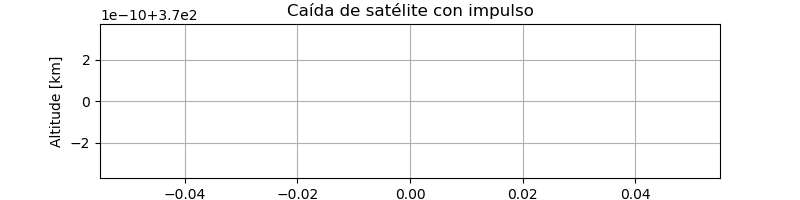

In [9]:
#PLOTTING
%matplotlib notebook
mpl.rcParams['toolbar'] = 'None'

plt.figure(figsize=(8,2))
plt.plot(tTrace[:-2:1000]/60/60/24,(apogees[:-2:1000]-Re)/1e3);
plt.plot(tTrace[:-2:1000]/60/60/24,(perigees[:-2:1000]-Re)/1e3);
plt.grid();
plt.title("Caída de satélite con impulso")
plt.ylabel("Altitude [km]")
plt.xlabel("time [days]")
mplcursors.cursor(hover=True);

In [6]:
a = (350e3+Re+370e3+Re)/2
T = 2*np.pi*(a**3/mu)**0.5
print(T/60/60)
A = np.array([1, 2, 3])
B = np.array([3, 2, 1])
C = A*B
print(C)

1.5297617407237356
[3 4 3]
